In [45]:
import json
import pandas as pd
import numpy as np
import os
from gensim.models import Word2Vec, Doc2Vec
from sklearn import decomposition
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'

In [20]:
#os.listdir()

In [46]:
json_files = [pos_json for pos_json in os.listdir() if pos_json.endswith('.json')]
#print(json_files)

In [47]:
json_files

['Austin Pate - 38173194084.mp3.json',
 'Austin Pate - 38173172467.mp3.json',
 'Austin Pate - 38173167851.mp3.json',
 'Austin Pate - 38173201891.mp3.json',
 'Austin Pate - 38173151946.mp3.json',
 'Austin Pate - 38173164955.mp3.json',
 'Austin Pate - 38173183660.mp3.json',
 'Austin Pate - 38173161371.mp3.json',
 'Austin Pate - 38173185607.mp3.json',
 'Austin Pate - 38173192426.mp3.json',
 'Austin Pate - 38173182845.mp3.json',
 'Austin Pate - 38173183596.mp3.json',
 'Austin Pate - 38173189780.mp3.json',
 'Austin Pate - 38173171352.mp3.json',
 'Austin Pate - 38173204212.mp3.json',
 'Austin Pate - 38173178541.mp3.json',
 'Austin Pate - 38173192308.mp3.json',
 'Austin Pate - 38173178123.mp3.json',
 'Austin Pate - 38173206340.mp3.json',
 'Austin Pate - 38173203172.mp3.json',
 'Austin Pate - 38173182070.mp3.json',
 'Austin Pate - 38173157085.mp3.json',
 'Austin Pate - 38173184305.mp3.json',
 'Austin Pate - 38173182254.mp3.json',
 'Austin Pate - 38173175678.mp3.json',
 'Austin Pate - 381731415

In [48]:
len(json_files)
json_files[0]

101

'Austin Pate - 38173194084.mp3.json'

In [49]:
with open(json_files[0], 'r') as f:
    data = json.load(f)
    #print(data)
    for dicts in data['results']:
            print(dicts['alternatives'][0]['transcript'])

or call has been forwarded to an automated voice messaging system 
three one five three seven four zero six nine four is not available 
have an account please record you know I think when you finished recording you may hang out or press one for more options 
Schroeder photos of cool new about your driver %HESITATION the 
he was broke down currently and %HESITATION all in real 
unit number seven eight one eight one zero route while I have the home run a shop you Syracuse Novell beats of a jogger churches with a grin and within our 
the case number is three zero any to anyone thinking 


In [50]:
for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        for dicts in data['results']:
            print(dicts['alternatives'][0]['transcript'])

or call has been forwarded to an automated voice messaging system 
three one five three seven four zero six nine four is not available 
have an account please record you know I think when you finished recording you may hang out or press one for more options 
Schroeder photos of cool new about your driver %HESITATION the 
he was broke down currently and %HESITATION all in real 
unit number seven eight one eight one zero route while I have the home run a shop you Syracuse Novell beats of a jogger churches with a grin and within our 
the case number is three zero any to anyone thinking 
or integrate 
one 
to check the status of an on going great county bank press kit from the underground 
all representatives are currently attending to other calls we will answer your call as soon as possible 
who %HESITATION %HESITATION 
he will be missed if you see not only do you 
procrit me no money in the bank today on clone was %HESITATION later in the 
and I had a free delay unit then he told 
who ca

KeyError: 'results'

In [78]:
# for i in range(0,len(json_files)):
#     print(i)

In [51]:
json_files[100]

'Austin Pate - 38173181268.mp3.json'

In [52]:
dict1 = {}


for i in range(0,len(json_files)):
    with open(json_files[i], 'r') as f:
        data = json.load(f)
        
        try:
            x = data['results'][0]['alternatives'][0]
            #print(i,x['confidence'],x['transcript'])
            
            for dicts in data['results']:
                #print(dicts)
                #print(i,dicts['alternatives'][0]['confidence'],dicts['alternatives'][0]['transcript'])
                
                if json_files[i] in dict1.keys():  
                    old = dict1[json_files[i]]
                    new = dicts['alternatives'][0]['transcript']
                    together = [old,new]
                    dict1[json_files[i]] = ','.join(together)
                else:
                    dict1[json_files[i]] = dicts['alternatives'][0]['transcript']

                    
        except:
            pass
            #print(data,i)

In [53]:
dict1

{'Austin Pate - 38173141507.mp3.json': "their second ,so ,sorry I thought of them according to J. Mumbai how ,so are democratic and from a response and now I'm giving you guard because he'd you're able to tell a tractor over to our branch of Cucamonga Latisha ,yeah upon you just asking ,and I think here ,her college appreciated and is being processed quickly as possible please remain on the line will be right with you ,and ,and ,thank you ,the other ,getting ,we appreciate your call and your time thank you for your patience while holding will be rich you momentarily ,but ,and ,your call is important on it we're doing our best to assist you please continue to hold will be rich you into our campaign what final McKinney ,prominent Wanda ,Iranian immigrant editors a contact number ,how correct number it's a great day ,four seven seven ,zero four ,three eight ,and there were hundreds ,I it is from ,and then ,tractor ,and then pretend impact so I don't know if rationing that commitment Freig

In [104]:
# string1 = dict1[0]
# string2 = 'yo'
# together = [string1,string2]
# ''.join(together)

{
'result_index': 0, 
 'warnings': ['Unknown arguments: continuous.'], 
 'results': 
 
              [
              
              
             {'final': True, 'alternatives': 
                [{'confidence': 0.845, 'transcript': 'or call has been forwarded to an automated voice messaging system '}]}, 
             {'final': True, 'alternatives': 
                [{'confidence': 0.99, 'transcript': 'three one five three seven four zero six nine four is not available '}]}, 
             {'final': True, 'alternatives': 
                [{'confidence': 0.687, 'transcript': 'have an account please record you know I think when you finished recording you may hang out or press one for more options '}]}, 
             {'final': True, 'alternatives': 
                [{'confidence': 0.336, 'transcript': 'Schroeder photos of cool new about your driver %HESITATION the 
                '}]}, 
             {'final': True, 'alternatives': 
                [{'confidence': 0.669, 'transcript': 'he was broke down currently and %HESITATION all in real '}]}, 
             {'final': True, 'alternatives': 
                [{'confidence': 0.582, 'transcript': 'unit number seven eight one eight one zero route while I have the home run a shop you Syracuse Novell beats of a jogger churches with a grin and within our '}]}, 
             {'final': True, 'alternatives': 
                [{'confidence': 0.44, 'transcript': 'the case number is three zero any to anyone thinking '}]}
                
                
                ]
                
                }



In [12]:
examples = []

for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        try:
            example = data['results']
            print(example)
            examples.extend(example)
        except:
            pass

[{'alternatives': [{'confidence': 0.845, 'transcript': 'or call has been forwarded to an automated voice messaging system '}], 'final': True}, {'alternatives': [{'confidence': 0.99, 'transcript': 'three one five three seven four zero six nine four is not available '}], 'final': True}, {'alternatives': [{'confidence': 0.687, 'transcript': 'have an account please record you know I think when you finished recording you may hang out or press one for more options '}], 'final': True}, {'alternatives': [{'confidence': 0.336, 'transcript': 'Schroeder photos of cool new about your driver %HESITATION the '}], 'final': True}, {'alternatives': [{'confidence': 0.669, 'transcript': 'he was broke down currently and %HESITATION all in real '}], 'final': True}, {'alternatives': [{'confidence': 0.582, 'transcript': 'unit number seven eight one eight one zero route while I have the home run a shop you Syracuse Novell beats of a jogger churches with a grin and within our '}], 'final': True}, {'alternative

In [55]:
examples

[{'alternatives': [{'confidence': 0.845,
    'transcript': 'or call has been forwarded to an automated voice messaging system '}],
  'final': True},
 {'alternatives': [{'confidence': 0.99,
    'transcript': 'three one five three seven four zero six nine four is not available '}],
  'final': True},
 {'alternatives': [{'confidence': 0.687,
    'transcript': 'have an account please record you know I think when you finished recording you may hang out or press one for more options '}],
  'final': True},
 {'alternatives': [{'confidence': 0.336,
    'transcript': 'Schroeder photos of cool new about your driver %HESITATION the '}],
  'final': True},
 {'alternatives': [{'confidence': 0.669,
    'transcript': 'he was broke down currently and %HESITATION all in real '}],
  'final': True},
 {'alternatives': [{'confidence': 0.582,
    'transcript': 'unit number seven eight one eight one zero route while I have the home run a shop you Syracuse Novell beats of a jogger churches with a grin and within

In [14]:
len(examples)

3498

In [15]:
examples[0]
examples[1]
examples[2]

{'alternatives': [{'confidence': 0.845,
   'transcript': 'or call has been forwarded to an automated voice messaging system '}],
 'final': True}

{'alternatives': [{'confidence': 0.99,
   'transcript': 'three one five three seven four zero six nine four is not available '}],
 'final': True}

{'alternatives': [{'confidence': 0.687,
   'transcript': 'have an account please record you know I think when you finished recording you may hang out or press one for more options '}],
 'final': True}

In [16]:
transcripts = []

for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        #print(data)
        try:
            for i in range(len(data['results'])):
                result = data['results'][i]['alternatives'][0]['transcript']
                print(result)
                transcripts.append(result)
        except:
            pass
        

or call has been forwarded to an automated voice messaging system 
three one five three seven four zero six nine four is not available 
have an account please record you know I think when you finished recording you may hang out or press one for more options 
Schroeder photos of cool new about your driver %HESITATION the 
he was broke down currently and %HESITATION all in real 
unit number seven eight one eight one zero route while I have the home run a shop you Syracuse Novell beats of a jogger churches with a grin and within our 
the case number is three zero any to anyone thinking 
or integrate 
one 
to check the status of an on going great county bank press kit from the underground 
all representatives are currently attending to other calls we will answer your call as soon as possible 
who %HESITATION %HESITATION 
he will be missed if you see not only do you 
procrit me no money in the bank today on clone was %HESITATION later in the 
and I had a free delay unit then he told 
who ca

okay what decade member there 
%HESITATION reference number 
yes 
%HESITATION three oh eight two five zero 
right in the one moment and %HESITATION while I'm well in that case that are your driver military equipment providers 
service provider 
how can I get me one moment here 
Harry it's very and I would you name 
Liam L. I am am 
how can I know what it takes I think you would 
okay good truck is fixed 
okay he didn't have a 
%HESITATION break issue actually was a coolant line that was making 
run it down on the brake the front brake to him 
how can 
how do I do not think to call it lying 
how great if your hair they're lying 
yeah 
I think 
I like it was some of that are completed 
knowing just 
three minutes ago 
hi Larry and I would and if you live in the breakdown location and %HESITATION jumped off shore 
where an approximate time 
proselytized maybe %HESITATION 
one forty five to two o'clock today 
okay 
I went I'll go ahead and put that in the notes here 
and though he here so 

he already called in to give you the case 
and give you the 
so there you know 
George 
seven 
dance 
you will find 
zero one 
she several wind cash zero five zero one half 
after the family yet 
about 
sorry indicates little for this is going to be who for nine 
not one for 
okay so you don't have a lot in employment 
no new novel writer number so estimate will have to be creative to sell the service 
okay 
alright 
fact that none of the air under the correct parity in Narnia 
okay now do not know because they hear what the trial court and the appellate Sanatan when unloading one it means only one thing takes a muscle problem when you come back I want you to look at 
apparently yeah I 
that I know of are getting wanted Pakistani data Marshall or if they're gonna hang with it or not 
are now 
not any repairs that we find on it and there needs to be repaired 
%HESITATION today are they gonna want to work with or no 
yeah we got a few 
if it had been hit %HESITATION well we've not buildi

In [17]:
transcripts

['or call has been forwarded to an automated voice messaging system ',
 'three one five three seven four zero six nine four is not available ',
 'have an account please record you know I think when you finished recording you may hang out or press one for more options ',
 'Schroeder photos of cool new about your driver %HESITATION the ',
 'he was broke down currently and %HESITATION all in real ',
 'unit number seven eight one eight one zero route while I have the home run a shop you Syracuse Novell beats of a jogger churches with a grin and within our ',
 'the case number is three zero any to anyone thinking ',
 'or integrate ',
 'one ',
 'to check the status of an on going great county bank press kit from the underground ',
 'all representatives are currently attending to other calls we will answer your call as soon as possible ',
 'who %HESITATION %HESITATION ',
 'he will be missed if you see not only do you ',
 'procrit me no money in the bank today on clone was %HESITATION later in

In [18]:
text_file = open("Output.txt", "w")

for string in transcripts:
    text_file.write(string)

text_file.close()

66

68

122

63

56

156

53

13

4

84

104

28

45

76

41

72

5

22

5

5

64

20

32

32

20

15

19

84

18

21

21

17

11

45

29

19

19

39

42

73

69

13

88

38

19

10

6

45

83

7

91

26

45

35

53

265

4

7

48

96

24

46

20

48

28

26

16

65

12

39

68

64

36

5

33

20

11

129

5

6

5

9

6

3

35

33

12

34

12

5

50

32

48

46

26

5

103

68

48

19

5

68

11

8

5

84

104

3

90

5

7

90

4

4

4

13

90

14

90

4

90

9

104

90

14

6

90

90

20

5

90

17

12

6

6

22

3

5

34

5

86

54

16

18

5

84

4

104

14

14

90

90

14

3

7

90

90

9

12

90

4

8

4

90

11

90

3

10

90

4

4

3

14

14

11

95

7

90

41

50

31

60

15

5

84

3

11

5

213

61

4

106

45

21

15

91

8

54

84

97

35

30

22

38

25

27

61

13

53

21

86

3

22

10

14

140

3

17

14

154

45

24

21

21

12

21

21

12

15

83

40

18

3

23

24

8

12

17

39

27

5

21

8

16

100

66

69

88

118

15

15

77

44

19

11

18

17

50

39

117

89

55

8

78

90

4

112

44

29

29

5

26

13

18

11

27

12

3

12

19

19

84

64

34

116

11

11

47

12

28

32

7

45

12

12

45

11

6

27

48

62

45

59

18

62

64

13

40

20

29

31

4

23

51

62

22

25

44

42

21

3

18

16

28

71

13

49

37

9

3

18

24

15

6

28

79

33

45

29

7

88

19

24

31

36

30

25

5

98

96

34

27

39

60

16

32

13

73

74

9

54

13

35

44

15

26

7

4

23

12

32

12

55

44

38

18

36

41

83

4

75

12

3

44

5

61

5

56

21

66

34

23

47

6

80

57

55

155

47

8

20

29

6

11

6

66

3

31

24

10

5

32

32

30

32

48

67

35

14

5

39

7

41

55

13

25

24

15

47

34

16

28

33

4

17

11

31

11

136

57

7

52

3

103

82

33

31

12

7

18

28

72

12

26

21

55

12

23

116

22

23

39

45

6

32

6

59

26

3

34

6

20

48

9

10

7

10

17

15

65

27

145

31

4

57

67

55

66

75

17

58

19

22

12

4

163

68

15

72

50

6

34

21

23

84

41

16

18

24

5

8

22

12

15

19

38

7

26

26

18

17

15

11

5

10

12

30

29

22

32

25

52

7

11

11

4

41

7

17

23

9

18

5

15

20

22

62

15

30

30

39

30

13

58

21

40

57

48

12

25

54

13

66

15

11

26

50

10

35

8

22

33

106

104

23

10

32

91

46

3

5

40

9

140

15

10

20

9

20

26

26

17

8

12

88

29

48

6

12

17

21

14

38

23

11

30

37

19

19

6

3

23

5

34

98

26

18

53

4

64

42

45

21

28

69

82

58

6

3

48

101

7

12

6

7

4

21

119

17

27

61

26

11

25

11

21

13

355

87

4

61

162

70

70

30

85

3

41

87

13

49

22

82

160

29

14

41

25

39

18

23

60

32

5

110

46

98

66

10

95

53

32

37

66

105

6

29

28

60

58

62

7

30

13

5

60

27

13

5

146

103

57

16

10

55

35

15

22

121

46

42

27

18

183

37

90

75

4

41

57

123

5

71

22

26

89

51

5

127

149

97

20

24

17

5

37

25

46

26

18

5

8

158

109

61

39

5

75

15

10

7

5

8

331

23

79

139

8

54

15

24

91

132

105

82

147

48

17

15

21

100

52

11

59

53

30

29

4

41

118

17

33

37

16

47

25

22

68

48

8

39

37

5

8

41

13

18

96

26

31

36

5

52

40

62

40

8

31

5

81

56

32

15

17

10

11

5

71

59

12

29

18

10

31

27

25

27

23

90

28

63

8

13

190

38

15

17

31

26

38

39

117

34

6

25

193

102

4

5

25

104

15

4

28

22

10

23

5

16

5

38

62

8

5

55

68

10

2

105

124

26

10

7

4

11

21

8

32

12

22

13

14

10

10

4

51

17

58

7

86

11

5

67

27

42

29

27

11

10

7

22

15

30

14

31

31

26

20

16

5

27

25

67

9

64

102

33

36

34

92

36

26

18

11

11

40

67

39

8

26

12

13

24

39

17

89

57

10

72

103

90

24

10

49

45

5

84

61

10

20

21

24

73

39

72

31

94

6

53

5

5

12

33

163

24

10

43

36

46

3

160

5

29

13

63

19

24

143

33

81

4

53

63

47

49

48

5

5

4

5

5

3

5

5

163

78

82

66

13

3

51

150

26

17

116

4

4

10

10

8

109

4

4

143

16

43

36

17

10

12

24

13

9

8

92

24

19

7

53

17

40

85

36

130

41

17

13

50

9

15

82

44

47

33

4

19

18

50

44

2

89

51

23

21

5

9

80

57

103

138

22

49

57

17

50

29

28

11

26

5

36

17

18

49

62

39

20

44

54

44

28

42

52

13

69

72

54

6

33

11

119

73

33

19

13

7

21

39

12

85

32

35

6

90

58

41

27

13

121

39

24

26

35

43

89

32

47

79

3

33

6

5

10

6

5

7

3

11

11

87

19

27

10

54

29

30

21

49

28

39

34

25

8

13

8

11

4

5

15

8

18

12

49

8

36

4

53

12

6

12

102

5

39

90

5

41

29

40

46

57

58

10

18

17

21

36

8

63

59

94

45

14

20

8

36

39

32

4

23

7

31

5

70

23

58

5

136

41

19

8

12

58

4

8

36

7

24

4

94

7

50

12

48

47

23

50

38

44

5

4

16

8

5

5

74

122

54

74

55

15

37

8

123

19

40

23

10

16

9

19

48

5

29

113

35

16

39

9

5

72

47

17

130

26

63

71

15

27

5

20

67

145

59

13

34

113

106

12

16

25

15

137

98

56

84

42

122

103

27

78

106

106

66

10

34

84

25

10

46

8

8

48

42

9

51

58

25

16

25

5

32

5

47

65

12

72

15

79

4

185

16

128

8

12

33

22

25

14

5

29

8

16

13

9

8

26

7

33

8

9

14

7

8

18

33

16

17

13

4

20

6

27

36

50

87

66

31

99

8

46

13

13

11

12

14

11

5

20

15

17

18

46

10

87

5

40

5

84

89

10

34

14

15

34

4

4

37

28

58

5

55

59

3

39

25

34

14

25

12

13

42

20

17

48

32

8

12

50

61

44

82

11

52

12

34

17

19

5

44

43

20

39

69

34

45

54

45

30

32

21

54

54

166

68

29

24

62

20

25

34

6

46

5

10

62

13

12

16

7

4

38

19

56

97

109

14

33

36

6

3

45

70

5

60

48

16

57

25

47

5

4

5

36

35

4

16

22

4

11

13

27

5

45

9

24

12

5

22

31

86

111

56

28

61

23

38

31

14

62

46

18

25

5

7

25

12

25

39

33

30

77

27

42

42

6

42

6

13

5

43

5

12

12

36

136

32

5

57

10

30

56

32

5

65

24

183

25

29

6

18

48

63

113

151

126

46

67

4

69

5

11

32

5

41

19

5

59

34

24

44

9

25

58

90

5

36

7

18

5

5

36

15

39

25

13

28

9

63

24

28

28

20

26

29

13

22

45

59

51

5

27

30

15

61

9

5

21

31

36

16

56

31

5

95

5

7

11

20

14

5

6

62

5

10

9

75

40

88

20

6

19

12

42

32

45

105

11

141

40

158

15

25

56

5

30

203

5

37

35

16

52

71

109

46

60

8

68

5

17

33

9

50

19

5

54

35

24

50

10

26

59

86

5

36

8

25

11

28

15

46

26

13

30

17

53

26

28

29

20

26

29

13

24

46

62

56

6

18

52

19

30

18

5

23

31

36

25

62

25

8

92

5

5

13

20

14

19

53

4

5

27

9

12

31

157

11

34

30

55

15

5

24

45

40

126

62

34

10

31

31

18

5

11

11

11

34

40

44

19

98

34

17

26

58

14

147

147

324

104

133

75

50

8

90

30

33

82

117

42

37

71

6

34

3

29

53

15

40

31

3

110

208

25

86

8

29

31

21

68

33

28

18

24

26

12

12

12

6

27

4

9

4

12

15

5

38

4

24

22

7

59

67

61

96

8

40

12

4

60

10

52

19

15

42

23

22

25

55

26

33

16

50

5

28

37

124

89

132

36

51

22

144

42

3

70

75

32

28

46

12

70

52

113

8

2

19

5

5

62

34

26

70

100

8

65

72

20

304

107

131

132

8

16

56

19

13

76

315

14

5

16

5

111

288

119

74

69

41

17

93

49

57

22

17

13

12

8

26

5

14

68

63

32

114

49

120

63

42

112

36

38

85

41

35

105

52

49

6

127

91

4

77

8

28

73

106

7

37

121

9

52

74

14

66

148

16

16

36

10

56

39

105

88

158

67

37

70

5

118

16

54

17

59

140

233

40

137

93

98

32

108

27

56

110

21

37

76

129

55

40

71

79

93

60

40

5

141

4

62

61

33

5

94

35

16

67

54

17

91

39

81

32

111

83

5

52

44

52

55

20

12

26

25

75

16

30

134

86

9

117

114

87

50

108

34

51

32

3

89

65

22

57

64

60

51

5

3

3

169

60

18

63

21

173

40

28

135

240

35

17

222

32

64

8

12

7

7

6

12

4

114

6

8

11

14

4

12

36

38

17

15

29

29

37

79

40

45

6

54

33

10

29

26

66

31

34

27

24

69

51

43

28

68

28

79

63

42

26

40

57

36

79

30

65

43

14

64

8

37

8

78

107

20

49

44

56

38

20

35

7

27

42

14

4

30

75

39

10

43

144

49

25

29

22

40

22

72

99

23

19

8

34

14

3

30

23

42

17

18

7

6

6

14

9

46

21

6

60

12

43

84

5

8

61

193

18

98

8

66

57

18

95

104

78

34

8

8

97

30

8

71

8

13

10

5

62

17

87

66

41

26

21

74

6

10

68

27

23

15

6

32

12

6

53

57

49

45

77

14

5

5

5

4

5

5

11

3

3

258

81

66

50

52

88

118

42

48

82

24

73

39

12

45

3

10

81

44

31

4

12

23

43

62

11

53

77

51

79

105

49

44

33

4

9

146

61

41

111

20

10

38

47

75

43

12

8

34

84

7

33

28

16

5

70

96

88

18

4

9

18

50

49

38

41

72

10

25

29

13

16

40

94

34

37

59

3

70

65

59

37

3

5

20

39

24

57

77

77

5

12

106

32

22

36

48

61

12

68

18

9

57

81

21

32

25

13

110

22

4

5

15

9

9

3

53

34

9

36

60

44

20

96

58

35

212

57

63

62

76

36

146

101

19

13

46

12

138

7

60

3

56

6

4

170

43

60

44

59

57

88

95

11

49

8

20

20

13

69

10

37

51

42

16

45

12

43

99

17

32

32

7

3

18

22

3

22

5

15

27

34

3

9

19

32

5

16

11

28

20

16

69

40

24

5

6

24

9

4

27

16

16

7

14

23

44

8

4

5

9

18

46

5

13

20

30

3

12

31

13

16

40

7

3

34

8

5

3

20

5

3

3

8

16

15

19

29

5

28

22

56

73

10

9

6

9

9

7

16

9

8

12

27

3

10

27

71

9

23

8

13

77

29

13

54

51

4

4

5

35

6

8

3

21

4

12

20

26

9

43

70

10

5

132

61

105

63

165

9

39

252

65

63

28

69

94

69

40

91

97

67

56

19

15

8

25

54

19

13

6

16

4

3

11

5

79

57

27

15

18

41

24

11

3

124

5

125

9

114

127

6

52

43

149

23

28

19

20

41

109

56

7

48

18

29

22

14

5

5

8

8

14

6

90

11

33

5

63

39

26

5

13

93

43

54

38

5

43

5

10

10

101

25

4

69

55

81

4

16

10

34

44

65

13

55

60

12

49

12

21

47

29

29

8

37

23

43

52

48

86

23

67

24

94

68

73

23

69

11

10

5

180

58

49

11

42

82

22

14

34

5

11

10

313

28

24

18

37

2

5

6

30

28

104

45

39

8

129

98

39

8

117

62

12

246

8

103

2

11

15

5

101

4

116

5

93

11

70

15

69

10

8

23

5

6

55

70

16

88

8

69

137

71

72

108

43

72

41

32

34

21

11

32

9

30

10

129

181

5

123

101

95

127

122

8

191

9

3

24

38

25

6

18

64

14

194

5

5

50

38

24

18

193

28

75

79

4

37

55

126

62

56

5

18

65

46

5

130

113

28

96

13

31

29

34

25

42

5

16

23

5

8

159

108

67

28

5

77

19

10

6

6

24

14

58

118

40

126

117

54

6

107

66

65

10

9

15

5

9

7

5

11

87

83

48

5

52

22

3

10

16

9

22

8

17

5

8

16

7

18

15

9

10

21

8

44

54

12

12

16

24

41

35

68

19

27

60

104

98

106

126

37

67

8

11

8

65

20

19

71

103

130

39

71

20

49

4

3

26

21

13

5

28

22

15

93

39

14

22

8

10

25

11

5

5

33

39

9

7

20

27

15

8

8

25

12

16

21

14

3

15

4

172

54

19

5

125

27

5

5

21

32

14

34

14

55

4

44

4

44

4

83

12

11

23

26

53

7

24

17

9

5

54

51

50

15

21

23

18

35

138

40

20

45

18

17

16

21

5

47

103

4

46

175

25

40

17

102

56

110

74

5

27

44

11

9

16

50

81

25

4

16

5

34

105

206

204

26

109

25

5

317

122

12

8

54

206

58

26

82

20

89

107

9

93

47

75

5

72

154

25

97

49

14

49

5

79

15

128

95

42

12

34

5

25

57

43

208

64

32

7

35

89

14

117

31

177

74

26

17

8

15

63

28

53

65

59

32

35

7

4

5

5

5

5

32

39

10

204

12

10

24

18

20

22

12

24

4

36

10

35

8

36

55

12

55

46

12

112

34

26

60

23

23

28

12

22

87

68

7

11

37

6

51

18

21

11

140

100

63

52

10

7

29

9

10

46

15

118

80

79

5

2

36

26

32

16

31

26

33

22

57

5

46

8

6

9

22

20

11

18

73

21

12

71

19

88

5

26

13

46

31

42

174

79

37

67

57

3

5

19

44

26

162

40

102

35

63

35

53

29

24

90

5

3

17

109

62

49

26

5

71

4

39

12

96

4

43

21

5

17

30

51

83

62

13

14

5

8

7

3

5

25

22

26

5

4

13

3

7

26

38

15

67

29

50

107

32

5

7

3

19

3

36

27

31

34

10

5

25

12

15

12

12

29

39

17

31

3

40

34

48

74

58

18

45

17

21

31

14

6

3

35

5

48

13

49

3

17

17

59

4

11

6

17

21

15

8

38

5

15

5

17

33

23

21

37

59

25

39

5

14

5

46

13

15

62

5

63

12

128

30

5

57

28

8

13

15

12

29

12

20

8

31

12

12

14

43

15

23

85

39

43

7

47

40

25

63

34

6

3

78

97

29

11

17

13

56

14

143

10

55

6

113

8

5

12

46

60

13

28

13

6

236

7

4

4

31

20

27

8

24

29

4

6

51

28

3

8

174

7

53

7

6

150

38

11

57

5

47

48

17

12

5

26

38

8

25

4

27

28

15

95

105

39

3

3

3

3

5

5

3

5

5

25

95

22

13

11

4

15

10

11

29

79

8

80

3

65

11

6

3

120

6

18

28

62

33

30

24

7

6

68

30

23

27

15

4

49

16

29

7

12

25

36

11

10

11

51

23

50

77

37

130

72

12

11

27

29

53

7

87

25

16

29

29

38

33

50

28

11

46

6

47

10

21

9

31

35

70

24

41

22

25

73

51

42

30

69

29

72

70

46

27

41

53

36

58

22

36

71

30

15

48

13

67

79

116

18

39

91

33

21

28

14

16

5

44

3

3

89

4

14

88

14

88

6

89

14

88

88

55

3

28

49

189

5

31

19

16

21

4

31

187

42

110

23

17

23

7

18

27

83

105

22

18

47

13

19

5

18

96

40

55

52

91

30

44

19

88

12

45

56

115

38

5

12

4

11

In [19]:
## Transform transcripts into list of lowercase tokens
new_transcripts = [word_tokenize(sentence.lower()) for sentence in transcripts]


# tokens = []
# for item in new_transcripts:
#     for i in item:
#         #print(i)
#         tokens.append(i)

In [20]:
new_transcripts[:2]

[['or',
  'call',
  'has',
  'been',
  'forwarded',
  'to',
  'an',
  'automated',
  'voice',
  'messaging',
  'system'],
 ['three',
  'one',
  'five',
  'three',
  'seven',
  'four',
  'zero',
  'six',
  'nine',
  'four',
  'is',
  'not',
  'available']]

In [21]:
len(new_transcripts)

3498

In [22]:
stopWords = set(stopwords.words('english'))
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 'should',
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'the',
 'their',
 'theirs',
 'them',
 

In [23]:
wordsFiltered = []

for lists in new_transcripts:
    newlist = []
    for word in lists:
        #print(word)
        if word not in stopWords:
            newlist.append(word)
    wordsFiltered.append(newlist)

In [24]:
wordsFiltered

[['call', 'forwarded', 'automated', 'voice', 'messaging', 'system'],
 ['three',
  'one',
  'five',
  'three',
  'seven',
  'four',
  'zero',
  'six',
  'nine',
  'four',
  'available'],
 ['account',
  'please',
  'record',
  'know',
  'think',
  'finished',
  'recording',
  'may',
  'hang',
  'press',
  'one',
  'options'],
 ['schroeder', 'photos', 'cool', 'new', 'driver', '%', 'hesitation'],
 ['broke', 'currently', '%', 'hesitation', 'real'],
 ['unit',
  'number',
  'seven',
  'eight',
  'one',
  'eight',
  'one',
  'zero',
  'route',
  'home',
  'run',
  'shop',
  'syracuse',
  'novell',
  'beats',
  'jogger',
  'churches',
  'grin',
  'within'],
 ['case', 'number', 'three', 'zero', 'anyone', 'thinking'],
 ['integrate'],
 ['one'],
 ['check',
  'status',
  'going',
  'great',
  'county',
  'bank',
  'press',
  'kit',
  'underground'],
 ['representatives',
  'currently',
  'attending',
  'calls',
  'answer',
  'call',
  'soon',
  'possible'],
 ['%', 'hesitation', '%', 'hesitation'],
 [

In [25]:
model = Word2Vec(wordsFiltered, min_count=1)
print (model)  #summarize the trained model

Word2Vec(vocab=3128, size=100, alpha=0.025)


In [26]:
model.min_count

1

In [27]:
## Look at the vocabulary for the model

for word in model.wv.vocab.keys():
    print(word)

dell
fill
contact
vendor
regarded
gravel
star
repairing
hints
junior
locate
sell
anywhere
choose
administrative
contractor
lunch
pretty
plans
gal
finished
landis
merge
recruitment
martyred
kiara
full
chance
wan
lost
nightmare
shrunk
jordan
cancel
fiction
practically
bernard
extremity
nick
russia
lawrence
cleaning
ago
colonel
eugene
released
threaten
rodeos
written
website
three
taken
either
see
rhonda
donovan
manchester
communist
team
grant
receiving
harold
california
artwork
ironic
george
carrier
precio
packed
charity
positive
la
nothing
passion
harbor
nixon
missed
florida
madonna
career
verify
connected
governor
looked
sure
compiled
cruel
social
illusion
business
coated
precaution
welding
clearing
sirens
eighteen
mommy
logistics
home
guestbook
cresskill
liberated
colleagues
harbored
nutrition
drops
therefore
reacting
group
brokenshire
grazers
music
highland
questions
virtually
prominent
christine
turnout
make
preferred
detachment
funds
hanging
earning
delta
study
lay
network
minor
do

tractor
position
sally
visible
know
additional
gerald
validate
heaters
instincts
pm
pennies
year
limits
lag
one
sound
throughout
hard
pound
longitude
flexibility
apartments
ahead
patents
jabbour
reflect
strut
benefits
arching
reply
villain
windows
opry
people
meyer
latter
injured
cruciatus
opposite
feet
otherwise
sovereign
economic
giddy
indicate
eastern
james
patrolling
van
path
competitors
fly
selection
cop
apple
morning
listed
drove
pick
usai
song
luggage
talent
firing
learning
tail
proselytized
nickel
interest
cartesian
threatening
snarl
pagan
larry
remainder
sooner
tomorrow
alternative
pa
alone
lifts
hear
daily
reduction
definitely
intimacy
month
region
report
college
exit
precluding
compile
thinkpad
priests
machine
awhile
vic
requested
q.
refer
dispatcher
completed
citizens
information
hardening
destiny
com
chances
iran
covering
wage
chart
concert
sanatan
immensely
a.
prepared
mara
defier
universe
evening
street
orders
dispatch
improvement
means
honesty
rededicated
stress
arnold


In [28]:
model.wv['voice'] # numpy vector of a word

array([ -5.06135775e-03,  -1.91722705e-03,   3.12711461e-03,
         2.82550417e-03,  -1.77772704e-03,  -1.15453999e-03,
        -3.88828386e-03,  -1.78563257e-03,  -3.91130336e-03,
         1.42668490e-03,   2.64048041e-03,  -6.28934184e-04,
         4.89954744e-03,  -3.12203448e-03,   5.41397091e-03,
        -3.85265076e-03,  -3.37632350e-03,  -3.05011962e-03,
         3.54332710e-03,   4.04458400e-03,  -3.09120165e-03,
         2.00938503e-03,   5.19381650e-03,   2.15002755e-03,
         3.29787680e-03,   2.63293856e-03,   1.67884771e-03,
        -2.00134236e-03,   2.23863870e-03,   3.58763803e-03,
        -2.31497665e-03,   6.24542648e-04,  -4.41620871e-03,
        -5.23221958e-03,   3.78598459e-03,  -3.28298588e-03,
         3.22234957e-03,   1.20544317e-03,   1.72555447e-03,
         2.74155359e-03,  -6.53446070e-04,  -9.12847754e-04,
         3.30043305e-03,   1.97477080e-03,   8.54690268e-04,
        -6.13461772e-04,   3.46041890e-03,   3.03339353e-03,
        -8.25729803e-04,

In [29]:
model.wv.similarity('matter', 'college')

0.25657052549224296

In [30]:
model.wv.similarity('call', 'rider')

0.59419586359052667

In [31]:
def plotWords(model):
    #get model, we use w2v only
    w2v = model
    
    words_np = []
    #a list of labels (words)
    words_label = []
    for word in w2v.wv.vocab.keys():
        words_np.append(w2v[word])
        words_label.append(word)
    print('Added %s words. Shape %s'%(len(words_np),np.shape(words_np)))
 
    pca = decomposition.PCA(n_components=2)
    pca.fit(words_np)
    reduced= pca.transform(words_np)
 
    # plt.plot(pca.explained_variance_ratio_)
    for index,vec in enumerate(reduced):
        # print ('%s %s'%(words_label[index],vec))
        if index <100:
            x,y=vec[0],vec[1]
            plt.scatter(x,y)
            plt.annotate(words_label[index],xy=(x,y))
    plt.show()

Added 3128 words. Shape (3128, 100)


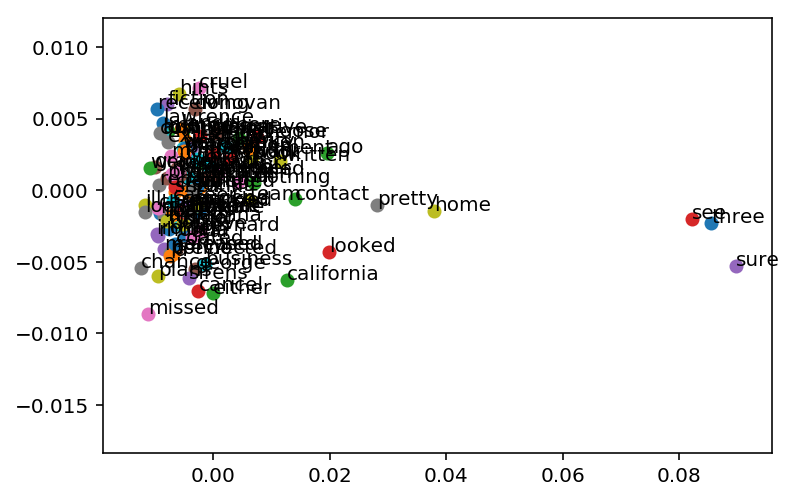

In [32]:
plotWords(model)

In [33]:
word_vectors = model.wv.syn0

In [34]:
word_vectors

array([[-0.02170741, -0.03366588,  0.02869185, ...,  0.02089972,
         0.01610256, -0.01400265],
       [-0.02587835, -0.02275572,  0.02442689, ...,  0.02227506,
         0.01770815, -0.00973688],
       [-0.01761769, -0.02126856,  0.02765605, ...,  0.01872608,
         0.01819906, -0.0143613 ],
       ..., 
       [-0.00483705,  0.0035173 , -0.00016207, ..., -0.00106553,
         0.00210042, -0.00010364],
       [-0.00217268, -0.00212565, -0.00235306, ...,  0.00278384,
         0.00214016, -0.00345463],
       [ 0.00445983, -0.00299841, -0.00367873, ...,  0.0011137 ,
        -0.00154197,  0.00362707]], dtype=float32)

In [35]:
w2v = model
    
words_np = []
#a list of labels (words)
words_label = []
for word in w2v.wv.vocab.keys():
    words_np.append(w2v[word])
    words_label.append(word)

In [36]:
words_label

['dell',
 'fill',
 'contact',
 'vendor',
 'regarded',
 'gravel',
 'star',
 'repairing',
 'hints',
 'junior',
 'locate',
 'sell',
 'anywhere',
 'choose',
 'administrative',
 'contractor',
 'lunch',
 'pretty',
 'plans',
 'gal',
 'finished',
 'landis',
 'merge',
 'recruitment',
 'martyred',
 'kiara',
 'full',
 'chance',
 'wan',
 'lost',
 'nightmare',
 'shrunk',
 'jordan',
 'cancel',
 'fiction',
 'practically',
 'bernard',
 'extremity',
 'nick',
 'russia',
 'lawrence',
 'cleaning',
 'ago',
 'colonel',
 'eugene',
 'released',
 'threaten',
 'rodeos',
 'written',
 'website',
 'three',
 'taken',
 'either',
 'see',
 'rhonda',
 'donovan',
 'manchester',
 'communist',
 'team',
 'grant',
 'receiving',
 'harold',
 'california',
 'artwork',
 'ironic',
 'george',
 'carrier',
 'precio',
 'packed',
 'charity',
 'positive',
 'la',
 'nothing',
 'passion',
 'harbor',
 'nixon',
 'missed',
 'florida',
 'madonna',
 'career',
 'verify',
 'connected',
 'governor',
 'looked',
 'sure',
 'compiled',
 'cruel',
 's

https://www.datascience.com/resources/notebooks/word-embeddings-in-python

In [37]:
X = model[model.wv.vocab]

In [38]:
X

array([[ -9.31776885e-05,  -1.56431482e-03,   4.70272079e-03, ...,
         -3.97147285e-03,   3.75376572e-03,  -3.73605918e-03],
       [  3.44077009e-03,   1.10581389e-03,  -1.26666448e-03, ...,
          8.57120729e-04,  -3.06066405e-03,  -4.92736651e-03],
       [ -3.24897119e-03,  -2.87598511e-03,   1.43898593e-03, ...,
          2.96897278e-03,   5.43691870e-03,  -6.89772377e-03],
       ..., 
       [ -2.17267661e-03,  -2.12565460e-03,  -2.35306402e-03, ...,
          2.78383936e-03,   2.14016321e-03,  -3.45463003e-03],
       [  4.45983373e-03,  -2.99841468e-03,  -3.67873418e-03, ...,
          1.11369882e-03,  -1.54197053e-03,   3.62706720e-03],
       [ -2.10362393e-03,   1.24685338e-03,  -6.02430548e-04, ...,
         -3.88837396e-03,   3.60283084e-05,   1.91100151e-03]], dtype=float32)

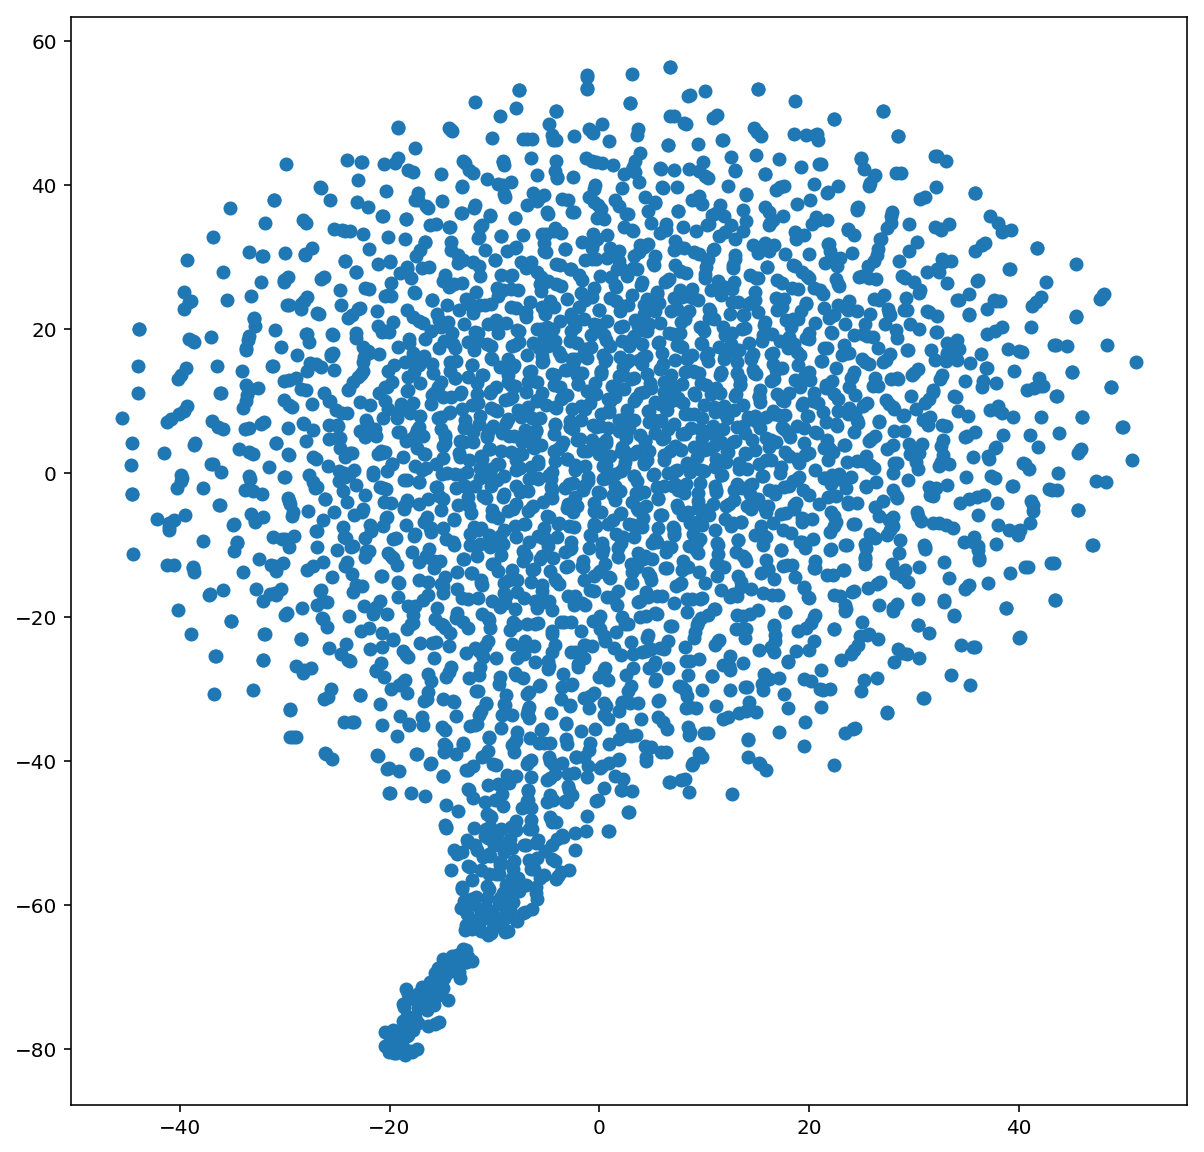

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

## Machine learning mastery
https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Text(-0.122143,0.00123086,'dell')

Text(-0.239641,-0.00241171,'fill')

Text(-0.0673662,0.000701138,'somewhere')

Text(-0.136189,-0.00267093,'vendor')

Text(-0.190956,-0.00206891,'landis')

Text(-0.133556,-0.00368306,'gravel')

Text(-0.117995,-0.00128517,'star')

Text(-0.270396,-0.00350661,'repairing')

Text(-0.162299,-0.00383982,'hints')

Text(-0.148216,-0.00112311,'junior')

Text(-0.13588,0.000490424,'locate')

Text(-0.215752,-0.00267845,'sell')

Text(0.0195141,0.000309298,'anywhere')

Text(0.0442322,-0.00393638,'choose')

Text(-0.239979,0.000111483,'administrative')

Text(-0.139827,0.000981829,'continued')

Text(-0.154868,0.00563688,'lunch')

Text(0.673003,0.00116163,'pretty')

Text(-0.255438,-0.000247801,'plans')

Text(-0.162503,-0.000760696,'gal')

Text(-0.114364,-0.00258035,'finished')

Text(-0.203663,1.35086e-05,'regarded')

Text(-0.22393,-0.00129877,'merge')

Text(1.33377,-0.00683177,'which')

Text(-0.180104,0.00358522,'recruitment')

Text(-0.160938,-0.000382854,'martyred')

Text(-0.228105,0.00165191,'kiara')

Text(0.0426334,-0.0066658,'full')

Text(-0.277027,0.000907629,'chance')

Text(-0.0841399,0.00487759,'wan')

Text(-0.188557,-0.00360219,'lost')

Text(-0.150384,-0.00515702,'nightmare')

Text(-0.17886,0.000816755,'shrunk')

Text(-0.172197,-0.00613495,'jordan')

Text(-0.175841,0.00196004,'cancel')

Text(-0.21419,0.000548739,'fiction')

Text(-0.277142,0.00311763,'practically')

Text(-0.203258,0.000160673,'bernard')

Text(-0.202807,-0.000827427,'extremity')

Text(-0.0981563,-0.00192985,'nick')

Text(-0.165919,0.00363529,'russia')

Text(-0.190381,0.00469218,'lawrence')

Text(-0.203015,-0.0023514,'cleaning')

Text(0.209131,0.00494358,'ago')

Text(-0.147566,0.00311368,'colonel')

Text(-0.151312,0.00412602,'eugene')

Text(-0.201596,0.000350117,'released')

Text(-0.219174,-0.0021826,'threaten')

Text(-0.148933,0.00570475,'rodeos')

Text(0.165217,-0.00263574,'written')

Text(-0.171461,-0.00423588,'website')

Text(1.98892,0.0948138,'three')

Text(0.0847353,-0.00515853,'taken')

Text(0.449729,0.00258157,'does')

Text(0.0318263,-0.00240234,'either')

Text(1.14089,-0.00700709,'see')

Text(-0.19185,-0.00108673,'rhonda')

Text(-0.160396,-0.00149501,'donovan')

Text(-0.192315,-0.00190392,'manchester')

Text(-0.20605,-0.00272023,'communist')

Text(0.0861898,0.00030881,'team')

Text(-0.0814927,-0.00462714,'grant')

Text(0.358202,-0.00157015,'reference')

Text(-0.226718,-0.00416376,'harold')

Text(0.160772,0.00273276,'california')

Text(-0.190721,-0.00158493,'artwork')

Text(-0.231158,0.0025054,'ironic')

Text(-0.232052,0.00293699,'george')

Text(-0.260322,0.00413467,'carrier')

Text(-0.203643,-0.00365701,'precio')

Text(-0.255261,0.000488729,'packed')

Text(-0.030339,0.00288429,'charity')

Text(-0.185793,0.000589621,'positive')

Text(-0.156068,-0.00268697,'la')

Text(0.0270453,-0.000337932,'nothing')

Text(-0.0919762,-0.0054143,'passion')

Text(-0.151114,-0.00334922,'smoking')

Text(-0.0859182,-0.00181829,'harbor')

Text(-0.156219,-0.00211115,'nixon')

Text(0.5642,-0.00580207,'looking')

Text(-0.0381526,0.00132715,'florida')

Text(-0.202888,0.00293632,'madonna')

Text(-0.239185,0.000390057,'career')

Text(-0.219935,-0.00180701,'kerry')

Text(-0.235241,-0.00229741,'connected')

Text(2.47889,-0.00703366,'but')

Text(-0.0355655,0.00232272,'governor')

Text(0.42448,0.00189646,'looked')

Text(1.78788,-0.0062958,'sure')

Text(-0.10508,0.00119141,'compiled')

Text(-0.261141,-0.00337687,'cruel')

Text(-0.1057,0.000881401,'social')

Text(-0.278889,-0.000778247,'illusion')

Text(-0.189269,-0.0042375,'business')

Text(-0.219473,-0.00225684,'coated')

Text(-0.161767,0.00458596,'precaution')

Text(-0.19074,0.000995196,'welding')

Text(-0.250419,0.00105269,'clearing')

Text(-0.204149,0.00562909,'sirens')

Text(-0.00498267,-0.00385982,'eighteen')

Text(-0.200855,0.000804915,'mommy')

Text(-0.127312,0.00279776,'logistics')

Text(0.967824,-0.00215948,'home')

Text(-0.211557,-0.00274265,'guestbook')

Text(-0.127637,-0.00173495,'cresskill')

Text(-0.147194,0.00232818,'liberated')

Text(-0.216554,-0.00114858,'colleagues')

Text(-0.238966,-0.000245289,'harbored')

Text(1.84928,0.00138697,'had')

Text(-0.147091,-0.00116993,'nutrition')

Text(-0.257801,-0.00256056,'drops')

Text(-0.242215,0.00154497,'therefore')

Text(-0.151022,-0.00132231,'reacting')

Text(0.0450397,-0.00430148,'group')

Text(-0.158046,-0.00185432,'brokenshire')

Text(-0.151955,0.00345195,'grazers')

Text(1.39977,-0.00448901,'through')

Text(-0.183596,0.00314874,'contractor')

Text(-0.198498,-0.000308758,'cortland')

Text(-0.0775857,0.000855662,'questions')

Text(-0.177797,0.00248298,'wrecker')

Text(-0.251008,-0.00193581,'virtually')

Text(-0.241415,-0.0024011,'prominent')

Text(0.0414055,-0.000959786,'christine')

Text(-0.210297,-0.00107154,'turnout')

Text(1.35761,-0.00666676,'make')

Text(-0.246537,0.000145011,'preferred')

Text(1.72277,-0.00537061,'some')

Text(-0.096849,0.00203333,'detachment')

Text(-0.140715,0.00616138,'funds')

Text(-0.107719,0.00673125,'hanging')

Text(-0.272934,0.000602226,'earning')

Text(-0.205083,-0.00192263,'delta')

Text(-0.221212,-0.00081166,'study')

Text(-0.238031,0.00503415,'lay')

Text(-0.203835,-0.00195625,'network')

Text(-0.270678,-0.000313533,'ll')

Text(-0.197687,-5.6943e-05,'documents')

Text(2.73877,0.00294445,'at')

Text(-0.163265,-0.00392481,'arms')

Text(-0.114758,-0.0009336,'armory')

Text(-0.268554,-0.00513525,'shrine')

Text(-0.183737,-0.000409647,'scared')

Text(-0.129571,0.000691033,'feel')

Text(-0.251727,-0.00476522,'guilty')

Text(-0.0859998,-0.000729074,'u.')

Text(-0.0387774,0.00136683,'needs')

Text(0.00465661,-0.0031676,'circle')

Text(-0.231113,-0.0038533,'bellmer')

Text(0.75494,0.00141534,'first')

Text(-0.211512,0.00163227,'combat')

Text(-0.153184,0.00534602,'graphics')

Text(-0.164594,0.00182788,'rachel')

Text(-0.134336,-0.00131299,'cloning')

Text(-0.125439,-0.00364098,'fell')

Text(-0.223699,0.00594655,'approximate')

Text(-0.25185,-0.00193708,'cable')

Text(0.625574,0.0029729,'sorry')

Text(-0.270641,9.2685e-05,'congress')

Text(-0.260323,0.0050389,'rise')

Text(1.21551,-0.00910331,'driver')

Text(-0.2044,-0.00332301,'trialing')

Text(0.483874,-0.00280235,'half')

Text(-0.0371555,-0.00153936,'maximum')

Text(-0.260511,0.00121014,'pursue')

Text(-0.0434716,-0.00289225,'fine')

Text(-0.176538,-0.000281252,'hillary')

Text(0.905517,-0.00546262,'anything')

Text(-0.140475,-0.00467648,'playing')

Text(-0.188922,0.00147817,"o'hara")

Text(-0.167944,-0.00264955,'open')

Text(0.0935561,-0.00139561,'likely')

Text(0.0277317,0.000415989,'past')

Text(-0.0332794,0.00684699,'speak')

Text(0.0848955,-0.00059293,'green')

Text(-0.226496,-0.00186996,'benefit')

Text(-0.300139,-0.000128761,'chain')

Text(-0.188947,0.00128179,'undergrad')

Text(-0.0238352,0.00062402,'crank')

Text(0.136135,0.00310028,'exactly')

Text(-0.269108,0.000901898,'eh')

Text(-0.118479,0.00154482,'provided')

Text(1.22326,-0.00267412,'take')

Text(-0.209195,0.00197034,'parapan')

Text(0.162813,0.000612413,'wo')

Text(-0.0625432,-0.000547979,'bit')

Text(-0.211402,0.00241248,'vendors')

Text(-0.18956,0.00653229,'motor')

Text(-0.193074,0.00603902,'pouring')

Text(-0.140715,0.00397557,'temporary')

Text(-0.196105,-0.000590117,'global')

Text(-0.136179,-0.00160527,'cup')

Text(-0.054798,0.00888755,'vehicles')

Text(-0.251408,-0.00256161,'packing')

Text(-0.128551,0.00243051,'war')

Text(-0.155145,-0.00240349,'story')

Text(-0.186827,-0.00248852,'goal')

Text(0.0750986,-0.00257627,'accept')

Text(-0.206658,-0.0005856,'spoke')

Text(-0.148716,0.00048509,'lark')

Text(-0.273234,-0.00166133,'hadwiger')

Text(-0.228415,0.00377933,'hangar')

Text(-0.243593,-0.00177957,'stream')

Text(0.269319,-0.00280156,'both')

Text(-0.0053174,0.00132139,'plan')

Text(2.08,-0.00238944,'any')

Text(-0.143914,0.00356311,'atrocious')

Text(-0.238705,-0.00258355,'trust')

Text(-0.196574,0.00285628,'sires')

Text(0.254009,0.000190934,'non')

Text(-0.193761,-0.0025176,'alarming')

Text(-0.22744,0.001131,'hunting')

Text(-0.137006,0.00121778,'beats')

Text(-0.233051,0.00348982,'closest')

Text(-0.227899,0.000362844,'closer')

Text(-0.23417,0.00200508,'underground')

Text(-0.148476,-0.00503049,'onsager')

Text(-0.15425,0.000320962,'youravon')

Text(-0.177009,0.00413084,'hopeful')

Text(-0.203554,0.00035112,'fir')

Text(-0.0578432,0.00480457,'dinner')

Text(1.75621,-0.00956258,'think')

Text(-0.164385,0.00712954,'restaurant')

Text(0.00743533,-0.00404697,'opened')

Text(-0.233668,0.000133237,'reportedly')

Text(-0.221456,0.00203827,'staff')

Text(-0.182885,-0.00259904,'invoices')

Text(-0.227682,0.000162777,'objectionable')

Text(-0.118093,-0.0063764,'unfortunately')

Text(-0.137308,-0.00194786,'ram')

Text(-0.273737,-0.00661416,'checking')

Text(-0.170277,-0.00213368,'rotor')

Text(-0.132756,-0.000232553,'pragati')

Text(-0.273794,0.00800143,'timeline')

Text(-0.135197,-0.00575652,'appreciated')

Text(-0.0965053,0.00290182,'sarah')

Text(-0.146298,0.0011065,'opposing')

Text(-0.175469,0.00600282,'kilo')

Text(-0.217985,-0.0021694,'wow')

Text(-0.127819,-0.00387932,'wear')

Text(-0.0599006,-0.000750759,'weather')

Text(-0.134524,0.00218862,'killed')

Text(-0.235091,0.00235029,'talmud')

Text(-0.23057,0.00493006,'structural')

Text(-0.065653,-0.00316289,'host')

Text(-0.268559,0.00642864,'jersey')

Text(-0.202083,0.00318909,'partnership')

Text(-0.228359,-0.00272016,'forced')

Text(-0.173226,0.00185178,'camper')

Text(-0.22666,0.00493575,'latisha')

Text(-0.191631,0.00418294,'shot')

Text(-0.254859,0.00389551,'demanding')

Text(-0.191463,-0.000814233,'computer')

Text(-0.242171,0.00198946,'indicates')

Text(0.245562,-0.00164355,'went')

Text(-0.134842,0.00132199,'dozen')

Text(-0.212244,0.00541174,'streamed')

Text(-0.185654,-0.000513956,'comprise')

Text(-0.191438,-0.00410706,'play')

Text(-0.215135,-0.00455511,'renew')

Text(-0.225721,0.000901123,'compartmentalize')

Text(-0.192472,0.00274671,'crisis')

Text(0.0798174,-0.00199649,'too')

Text(-0.140869,-0.00178717,'view')

Text(0.318278,-0.00482287,'remember')

Text(0.075583,-0.00442668,'ask')

Text(-0.174592,-0.00101839,'rethinking')

Text(-0.200562,0.00446867,'border')

Text(-0.183219,0.000208415,'assists')

Text(-0.255134,0.00493197,'explain')

Text(-0.165614,-0.00118131,'buyer')

Text(-0.233957,0.000403108,'terrorist')

Text(-0.228679,-0.000361196,'amused')

Text(-0.2278,-0.000196373,'rick')

Text(2.32875,-0.000212245,'who')

Text(-0.0281833,0.000233028,'park')

Text(-0.23131,-0.00402156,'himitsu')

Text(-0.187204,0.00384322,'yankel')

Text(-0.107096,-0.000225986,'returned')

Text(0.0558607,-0.000927161,'worked')

Text(0.0792728,-3.33525e-05,'once')

Text(0.00426612,-0.00378607,'drivers')

Text(-0.237922,0.00196368,'miles')

Text(-0.127484,0.00116234,'colorado')

Text(0.546585,0.00280993,'drive')

Text(-0.13216,0.00202348,'access')

Text(-0.235309,-0.00480594,'liable')

Text(0.018866,-0.00040175,'senator')

Text(-0.179978,0.000657192,'exits')

Text(-0.213472,-0.00187917,'pto')

Text(-0.150393,0.00263478,'hiring')

Text(0.0415768,0.00257157,'job')

Text(-0.222763,0.00168191,'anacs')

Text(-0.178463,9.00365e-05,'project')

Text(0.0206997,0.00103558,'asking')

Text(-0.263839,-0.00293065,'bubble')

Text(-0.260383,-0.0037371,'rq')

Text(-0.0452575,-0.00201553,'wearing')

Text(-0.208066,-0.00374669,'hong')

Text(-0.259858,0.00321296,'quaint')

Text(-0.183437,0.00406227,'litigation')

Text(-0.267429,0.000317683,'ability')

Text(-0.203657,0.000585434,'inconvenience')

Text(-0.109378,0.00254779,'referral')

Text(-0.14056,0.00117804,'structure')

Text(-0.182101,-0.000307332,'worldwide')

Text(-0.246797,0.00648636,'depart')

Text(-0.184733,-0.0047545,'manisha')

Text(-0.0858411,-0.00203951,'tartikoff')

Text(-0.268626,-0.0030698,'gosh')

Text(0.11949,0.0055388,'head')

Text(-0.0715225,-0.00107738,'sounding')

Text(-0.235877,0.00116371,'copyright')

Text(-0.128829,0.00135067,'dragon')

Text(-0.223587,0.00230715,'rolled')

Text(-0.183332,-0.00183355,'aging')

Text(-0.131179,-0.00102186,'confirmation')

Text(-0.218647,0.00351946,'parallel')

Text(-0.15757,0.00140966,'assimilate')

Text(-0.238827,-0.0012951,'natural')

Text(-0.2228,0.000315254,'visor')

Text(0.971786,0.00308921,'than')

Text(0.189385,-0.00363457,'acting')

Text(-0.210966,0.00246761,'images')

Text(2.70728,-0.0103791,"'re")

Text(-0.181993,-0.00523828,'owner')

Text(-0.206009,-0.000414671,'keller')

Text(-0.161877,0.00163779,'purposes')

Text(-0.168728,0.00166429,'entirely')

Text(0.207766,0.00162362,'legal')

Text(0.096651,0.00351948,'recalling')

Text(-0.265822,-0.000859527,'gordon')

Text(-0.16777,-0.000979344,'index')

Text(-0.16038,0.00230868,'communications')

Text(-0.218211,-0.00154787,'search')

Text(-0.27402,0.00504825,'dance')

Text(-0.127358,-0.00553403,'participation')

Text(-0.181364,0.000798167,'joe')

Text(-0.188742,-0.000692391,'casinos')

Text(-0.260813,0.000696971,'terribly')

Text(0.0678531,-0.00414,'government')

Text(-0.232621,-0.00245885,'creative')

Text(-0.287297,0.000699121,'aware')

Text(0.336812,0.00936587,'forty')

Text(0.210434,0.00162942,'whole')

Text(-0.155759,0.00307481,'san')

Text(-0.160636,-0.00299326,'relocation')

Text(0.2551,-0.00138419,'possible')

Text(0.137814,-4.5898e-05,'before')

Text(-0.204005,0.00273898,'muffler')

Text(-0.196771,0.000294167,'ralph')

Text(-0.186691,0.00209159,'phil')

Text(-0.146226,-0.00394521,'popular')

Text(-0.229604,0.000734423,'wanda')

Text(-0.225984,-0.0018246,'crashed')

Text(-0.131399,-0.0009673,'rethink')

Text(-0.242875,0.00457871,'unions')

Text(-0.192919,0.00391856,'dungarees')

Text(-0.160198,-0.00204862,'committee')

Text(-0.0434989,-0.000674986,'sitting')

Text(-0.216022,-0.00127203,'recliner')

Text(-0.260396,0.0016625,'supposed')

Text(1.9098,-0.00396074,'going')

Text(0.246755,0.00449035,'center')

Text(-0.172579,0.00389328,'picnic')

Text(-0.226522,0.00173373,'judy')

Text(-0.266066,-0.00562451,'villanelle')

Text(-0.182663,0.000634693,'largely')

Text(-0.0483082,-0.00150303,'side')

Text(0.0290539,-0.00340647,'chris')

Text(-0.227158,-0.0012961,'honey')

Text(0.110473,0.00127769,'collect')

Text(0.129,-0.00194124,'guard')

Text(-0.24351,0.00237213,'sought')

Text(-0.16604,0.00395826,'begin')

Text(-0.193237,0.00114464,'raven')

Text(-0.240527,-0.00235158,'admired')

Text(0.00887116,0.0029609,'hundreds')

Text(-0.231434,0.00048643,'sea')

Text(2.0001,-0.00384786,'other')

Text(-0.211522,0.00637823,'nation')

Text(-0.27152,-0.00250014,'references')

Text(-0.257622,0.00215721,'pasar')

Text(0.343818,0.00059918,'writing')

Text(-0.158895,-0.0037571,'alice')

Text(-0.119154,2.75942e-05,'dedicated')

Text(-0.168472,0.00365137,'underestimate')

Text(-0.28191,-0.00231758,'marketer')

Text(-0.196028,-0.00260356,'morneau')

Text(-0.178369,0.00116701,'interfaces')

Text(-0.176375,0.0043057,'oversee')

Text(-0.0970873,0.00176744,'ticker')

Text(-0.248382,-0.00137081,'colonial')

Text(-0.243532,-0.00332044,'versus')

Text(-0.264639,2.35452e-06,'companies')

Text(-0.18617,0.00184964,'election')

Text(-0.276102,0.00272907,'jeffrey')

Text(0.907126,-0.00122144,'another')

Text(-0.102818,-9.16345e-05,'notes')

Text(-0.0269008,0.000831269,'chicago')

Text(-0.180203,-0.00286954,'abandon')

Text(-0.176869,-0.00171958,'winner')

Text(0.262836,0.00257421,'wind')

Text(-0.125772,-0.00612447,'professional')

Text(-0.25547,-0.00502932,'critics')

Text(-0.225686,0.00204681,'pulled')

Text(0.0924965,0.00322221,'following')

Text(-0.223441,-0.00240549,'americans')

Text(-0.144186,-2.35358e-05,'slim')

Text(-0.141453,0.00391118,'voice')

Text(0.0223669,-0.00164512,'carolina')

Text(-0.0981474,0.00210611,'slowly')

Text(-0.219675,0.00360056,'freightliner')

Text(0.262405,-0.000588508,'industry')

Text(-0.274359,0.00196414,'crew')

Text(-0.226794,-0.00118474,'ronnie')

Text(-0.203452,0.00176334,'amendments')

Text(-0.191276,0.00398498,'school')

Text(-0.0755246,0.00206159,'southern')

Text(-0.242324,-0.00114589,'graphically')

Text(0.363504,-0.00230921,'light')

Text(-0.194704,-0.00226407,'laurie')

Text(-0.174535,0.000402933,'approach')

Text(-0.176255,0.000160843,'seemed')

Text(-0.247801,-0.00381244,'unlocked')

Text(0.295168,-0.000665281,'com')

Text(-0.27283,0.000759615,'chuckle')

Text(-0.0845227,0.000573324,'expect')

Text(-0.119188,0.00488431,'dog')

Text(-0.212632,0.00122689,'ryerson')

Text(0.122092,0.00103138,'done')

Text(-0.0550108,-0.00212294,'young')

Text(0.113173,0.000482239,'children')

Text(-0.187167,-0.00190701,'didactic')

Text(0.0274557,-0.00413307,'larger')

Text(2.59839,-0.0108443,'all')

Text(-0.206314,-0.0012928,'worst')

Text(-0.226675,0.000496099,'homeownership')

Text(-0.249546,-0.00676841,'ursula')

Text(-0.227381,0.00197836,'acne')

Text(-0.0922688,0.00282885,'recall')

Text(-0.239595,0.00280826,'meeting')

Text(-0.129712,0.000347655,'novell')

Text(2.17518,-0.00931115,'how')

Text(-0.178636,-0.00393522,'akron')

Text(-0.0281705,-0.00467571,'interstate')

Text(-0.0467223,-0.00578601,'love')

Text(-0.132783,0.00180779,'loads')

Text(3.10827,-0.0109828,'will')

Text(-0.171994,-0.00446085,'quarter')

Text(-0.150016,0.00276339,'acted')

Text(-0.226423,0.00270844,'irish')

Text(-0.185683,0.000677627,'lives')

Text(-0.144157,-0.00352486,'corner')

Text(-0.187318,0.0043951,'became')

Text(-0.248169,-0.000509384,'picture')

Text(-0.232075,-0.00182674,'inherently')

Text(-0.255268,-0.00605261,'parachute')

Text(1.95449,-0.00312049,'service')

Text(-0.203534,-0.000550045,'limit')

Text(0.0660344,-0.00618326,'pain')

Text(-0.151358,-3.09079e-05,'counsel')

Text(-0.0132213,-0.00066475,'nobody')

Text(-0.188947,0.000184153,'destroy')

Text(-0.200462,-0.00456087,'predominant')

Text(-0.163205,-0.000137299,'note')

Text(-0.11033,0.00354329,'intense')

Text(0.856992,0.00363031,'coming')

Text(-0.0967134,-0.00232567,'land')

Text(-0.239991,0.00159833,'characters')

Text(0.180992,-0.000881999,'human')

Text(-0.106289,-0.000996883,'operator')

Text(-0.00937474,-0.00445842,'left')

Text(-0.145049,-0.00320824,'timeout')

Text(2.40168,-0.0132905,'no')

Text(-0.194357,-0.00412952,'significant')

Text(-0.12887,0.000775979,'accounted')

Text(-0.1588,-0.00299716,'legend')

Text(-0.187104,0.00228344,'works')

Text(1.66467,-0.0284705,'do')

Text(0.998631,-0.000517054,'probably')

Text(-0.275728,-6.22674e-05,'purple')

Text(-0.220533,-0.00401586,'marcia')

Text(-0.154683,-0.00058735,'actions')

Text(-0.147126,-0.0027472,'watch')

Text(-0.125294,-0.00222253,'problems')

Text(-0.0144754,-0.00130556,'federal')

Text(-0.245839,-0.00169611,'baba')

Text(-0.20935,-0.00291465,'due')

Text(-0.233487,-0.00508016,'longing')

Text(-0.0487869,-0.000126667,'culture')

Text(-0.0436231,0.00163761,'opponent')

Text(0.0297618,0.00224669,'world')

Text(-0.0926418,0.00212143,'fired')

Text(-0.0829662,-0.00200274,'doubt')

Text(-0.223499,-0.00417191,'carry')

Text(-0.101942,0.00253355,'arrow')

Text(0.0952,-0.00712723,'comment')

Text(-0.0506772,0.000756947,'public')

Text(0.451008,-0.00442137,'soon')

Text(-0.222746,-0.000237346,'liking')

Text(0.323959,-0.0010371,'including')

Text(-0.122598,-0.00113217,'represent')

Text(-0.194748,-0.000233134,'eric')

Text(2.02932,-0.00750181,'yeah')

Text(-0.235436,0.00105938,'arlette')

Text(-0.153033,0.00345351,'rag')

Text(-0.0763769,0.00165032,'parental')

Text(-0.187852,-0.000368078,'precious')

Text(-0.228783,0.00274727,'lance')

Text(-0.164257,-0.000961921,'police')

Text(0.378665,0.00455001,'car')

Text(-0.293709,-0.000724637,'receiving')

Text(2.40807,-0.00692616,'her')

Text(0.0126945,-0.000264329,'fun')

Text(-0.0783385,0.00207597,'whether')

Text(2.27475,-0.00535958,'call')

Text(-0.0884228,0.00429826,'japan')

Text(-0.156806,0.00182108,'talked')

Text(-0.101571,-0.00338067,'radish')

Text(0.140897,-0.00106221,'lie')

Text(-0.203096,0.00153281,'marked')

Text(-0.0856974,-0.00217029,'normal')

Text(0.124813,0.00133005,'road')

Text(-0.260728,0.00239075,'seeking')

Text(-0.0425594,-0.00224344,'punk')

Text(-0.232646,0.00177116,'killer')

Text(-0.167378,0.00127568,'enter')

Text(-0.223455,0.00112174,'hungrily')

Text(-0.0590533,-0.00307227,'context')

Text(-0.0680335,-0.00508903,'epa')

Text(-0.221829,-0.00320572,'paid')

Text(-0.233217,-0.00325132,'morgan')

Text(-0.187658,0.00262505,'else')

Text(-0.274579,0.000978144,'wallace')

Text(-0.0224494,-0.000997126,'practice')

Text(-0.212799,-0.00170561,'catherine')

Text(-0.187637,-0.000929884,'mumbai')

Text(0.744209,0.00570763,'twenty')

Text(0.0613229,0.00252554,'complete')

Text(-0.234131,-0.000550937,'highland')

Text(0.976972,-0.00238886,'rental')

Text(0.0415679,0.00269297,'reservation')

Text(-0.184236,0.00437051,'mail')

Text(0.422246,-0.0030657,"'ve")

Text(0.0323328,-0.00215278,'character')

Text(-0.218449,0.000154223,'mmhm')

Text(-0.105981,0.00136565,'whores')

Text(-0.180579,0.000799961,'sign')

Text(-0.109084,0.00106982,'interweave')

Text(-0.16259,0.00444464,'don')

Text(-0.227002,0.00235877,'karshi')

Text(-0.225178,-0.00112694,'ended')

Text(-0.105864,0.00146748,'struggle')

Text(0.859933,0.00330241,'never')

Text(1.51879,0.0230406,'thirty')

Text(-0.00177291,0.00367233,'hot')

Text(-0.0703604,0.00440994,'always')

Text(2.77968,-0.0253523,'have')

Text(-0.140736,-0.000384894,'putting')

Text(-0.114806,-0.0016365,'file')

Text(-0.237686,-0.00115992,'therapy')

Text(-0.199541,0.000358073,'jerry')

Text(0.0463692,-0.00165944,'put')

Text(-0.295241,0.00166171,'mortar')

Text(0.0219385,0.00313334,'warning')

Text(-0.244166,-0.00107953,'ramakrishna')

Text(-0.272484,-0.00491005,'nevada')

Text(0.0523529,-0.000984321,'trouble')

Text(2.13129,-0.00337703,'were')

Text(-0.136364,-0.00527952,'cargo')

Text(-0.177231,0.00143515,'airport')

Text(-0.0846556,-0.00443067,'heart')

Text(-0.0909064,0.000299432,'approved')

Text(0.275941,0.003585,'clean')

Text(-0.116565,0.000894259,'union')

Text(-0.214809,0.00324927,'cleanness')

Text(-0.0463691,-0.00133153,'montana')

Text(0.125353,0.000222937,'city')

Text(-0.156973,-0.00132286,'same')

Text(-0.220882,0.00342644,'ethiopia')

Text(-0.226464,-0.00436792,'decade')

Text(-0.0540957,-0.00153142,'quality')

Text(-0.262028,0.00339999,'attach')

Text(-0.0904263,-0.00334248,'fox')

Text(-0.273478,-0.0002453,'denise')

Text(2.72289,-0.00151946,'very')

Text(-0.0575811,0.000979804,'willing')

Text(-0.262639,-0.00433669,'word')

Text(-0.0250389,0.0016962,'hall')

Text(4.03482,-0.0129227,'and')

Text(-0.189627,-0.00435244,'respect')

Text(-0.201438,-0.0028818,'tardy')

Text(-0.183373,-0.0027538,'nouns')

Text(-0.113593,0.00106385,'predicting')

Text(-0.193722,-0.000106132,'palm')

Text(-0.167011,-0.00135897,'tuning')

Text(-0.240007,-0.00435106,'deterrent')

Text(-0.196552,-0.0027005,'commander')

Text(-0.19541,-0.00521978,'charges')

Text(-0.221174,-0.00263069,'artists')

Text(-0.241214,0.00102221,'varicose')

Text(0.0295789,-0.0019228,'hit')

Text(-0.128639,-0.00316631,'congregate')

Text(-0.168573,0.00883142,'hypothetical')

Text(-0.22003,0.00179891,'mister')

Text(-0.210719,-0.000348391,'charities')

Text(-0.0631747,-0.000275208,'income')

Text(0.0899086,0.00164165,'mark')

Text(-0.104921,0.00299326,'heavy')

Text(-0.25988,0.000652866,'grip')

Text(0.021948,-0.00186696,'hero')

Text(-0.12774,-0.000309711,'applauding')

Text(-0.216721,0.00104034,'liam')

Text(-0.168629,-0.00163686,'amber')

Text(-0.182085,-0.000456612,'appiah')

Text(-0.101992,-0.000599861,'s')

Text(-0.134786,-0.0026393,'fuel')

Text(-0.199083,-0.00276257,'glass')

Text(-0.190934,0.0020129,'truckloads')

Text(-0.0824515,0.00150143,'happening')

Text(-0.223455,0.0010007,'nodded')

Text(-0.153339,0.00379069,'biography')

Text(-0.198235,0.00330872,'charts')

Text(-0.198639,-0.00601933,'supporting')

Text(-0.205258,0.00252223,'shore')

Text(-0.140968,0.000579566,'muscle')

Text(2.46921,-0.0146985,'calling')

Text(-0.209276,-9.57756e-05,'courtesy')

Text(-0.244563,-0.0021859,'marijuana')

Text(-0.174863,-0.00505316,'receivers')

Text(-0.250143,0.00291636,'lyrics')

Text(-0.243675,0.00176149,'clobber')

Text(-0.182786,0.00558673,'occurring')

Text(-0.0970362,0.00258283,'locked')

Text(-0.202692,-0.00199266,'link')

Text(-0.0282971,-0.00106252,'speaking')

Text(-0.160881,-0.00192735,'jonesborough')

Text(-0.214593,-0.000931778,'hearing')

Text(0.0077417,0.00153614,'agree')

Text(-0.0978533,0.00387514,'british')

Text(1.74123,-0.00515362,'as')

Text(-0.249184,-0.00318332,'pertinent')

Text(-0.186353,-0.00428686,'julius')

Text(-0.246983,0.00165473,'professor')

Text(-0.0968775,-0.00166925,'progress')

Text(-0.180475,0.00771094,'crawling')

Text(-0.205738,-0.00180714,'errors')

Text(-0.19874,-0.000536118,'greenhouse')

Text(0.335645,-0.000868944,'contact')

Text(-0.212482,-0.00123145,'indian')

Text(-0.203511,-0.000367603,'radical')

Text(-0.142276,-0.00167865,'i.')

Text(-0.0215778,-0.00300356,'music')

Text(-0.21068,-0.00181072,'lc')

Text(-0.261458,-0.000795454,'sensible')

Text(-0.215968,0.000147629,'yelling')

Text(-0.126599,0.00289666,'remeber')

Text(0.0654429,-6.94418e-05,'bank')

Text(-0.105341,-0.00499425,'previous')

Text(-0.229133,0.00157978,'pf')

Text(-0.222523,0.000787689,'process')

Text(-0.182173,0.00487098,'letitia')

Text(-0.175547,-0.00759675,'radio')

Text(0.132278,-0.00142354,'actor')

Text(-0.0532631,-0.00148259,'bush')

Text(-0.134651,8.04834e-05,'farm')

Text(-0.141596,-0.0043921,'rotary')

Text(-0.134467,0.00227703,'tracker')

Text(-0.184089,-0.00421801,'identical')

Text(-0.207657,0.00377941,'info')

Text(-0.260056,0.00193183,'film')

Text(-0.160245,0.00147943,'held')

Text(-0.265738,0.0011269,'arrives')

Text(-0.244164,0.0021363,'hashimoto')

Text(-0.213074,-0.000737948,'patriot')

Text(-0.26678,1.46238e-05,'pinnacle')

Text(0.0849659,-0.000584757,'upon')

Text(0.467814,0.00479734,'while')

Text(-0.146246,0.000687907,'function')

Text(-0.111851,0.000952866,'nominet')

Text(-0.235928,0.00189311,'player')

Text(1.08421,0.00407651,'into')

Text(-0.21335,0.00254456,'melatonin')

Text(0.880253,-0.00716269,'mean')

Text(-0.244953,-0.00277857,'cynthia')

Text(-0.230527,-0.00452064,'profound')

Text(-0.174492,-0.000190528,'print')

Text(-0.176162,0.000244786,'dropping')

Text(-0.117617,-0.00394044,'vaginal')

Text(-0.0519044,0.00465821,'pregnant')

Text(-0.228574,-0.00608199,'melanie')

Text(0.205604,0.000942859,'breakdown')

Text(0.486977,-0.000257216,'north')

Text(-0.279763,-0.0040303,'unlike')

Text(-0.173278,-0.000817801,'virus')

Text(0.335631,-0.00156632,'within')

Text(0.241572,-0.000601672,'idea')

Text(-0.198882,-0.00727331,'fake')

Text(0.100514,0.00503357,'driving')

Text(-0.137063,0.00487804,'ukridge')

Text(0.0253832,0.00627475,'clear')

Text(-0.0775717,-0.00802512,'appellate')

Text(0.0629201,-0.00290892,'picking')

Text(-0.240866,-0.000132994,'fever')

Text(-0.14364,-0.00391296,'funhouse')

Text(-0.235694,-0.000727316,'motion')

Text(-0.256433,0.000445079,'personnel')

Text(-0.242251,0.000522858,'unable')

Text(-0.191606,0.0027634,'page')

Text(-0.16478,-0.00582608,'lesser')

Text(-0.236329,0.00444417,'depositing')

Text(-0.117768,0.0023097,'economy')

Text(-0.123949,-0.00155365,'newly')

Text(-0.149207,0.00349256,'angering')

Text(-0.0295625,0.00253261,'art')

Text(-0.207494,0.00149943,'philip')

Text(-0.158097,0.00207875,'catalog')

Text(-0.236793,-0.00368533,'treatment')

Text(-0.161682,0.0014446,'workers')

Text(-0.192477,-0.00352407,'marking')

Text(-0.237966,0.00390887,'greatness')

Text(-0.207854,-0.00396208,'papers')

Text(-0.109274,0.00455892,'dry')

Text(-0.08383,-0.00198787,'rate')

Text(-0.030527,-0.002208,'jackson')

Text(-0.212612,0.00131024,'turning')

Text(-0.203541,-0.000700492,'tenor')

Text(3.17503,-0.00426799,'up')

Text(-0.124618,-0.00670706,'death')

Text(-0.151523,0.0015344,'eclipse')

Text(0.0615242,0.00337476,'room')

Text(-0.117708,0.00302163,'experiencing')

Text(-0.160603,-0.00418023,'reception')

Text(-0.218957,0.0018898,'jury')

Text(-0.186326,-0.00147556,'wonderfully')

Text(-0.223549,0.00232284,'irwin')

Text(-0.229912,0.000682679,'boldly')

Text(-0.172421,0.00597741,'windowsills')

Text(-0.190866,0.00328046,'hedger')

Text(-0.155346,0.00296282,'petty')

Text(-0.273135,-0.00156434,'hunter')

Text(-0.195151,-0.00682795,'ranchers')

Text(-0.217269,-2.53648e-05,'theater')

Text(-0.153417,0.0065839,'whom')

Text(-0.255172,0.00193745,'penderecki')

Text(-0.222464,0.000147138,'newsroom')

Text(-0.170903,0.00164794,'initiatives')

Text(-0.210016,0.00348453,'wheelchairs')

Text(-0.197711,0.00461206,'recurrent')

Text(1.00858,0.000279064,'representative')

Text(-0.1914,0.00197646,'user')

Text(-0.213907,0.00550178,'november')

Text(0.0322101,-0.00311617,'arab')

Text(0.08098,-0.000410135,'india')

Text(-0.237271,0.00214877,'dealing')

Text(-0.177765,-0.00332599,'notices')

Text(0.576194,-0.00414351,'today')

Text(0.114702,9.47814e-06,'someone')

Text(-0.0300548,0.000115497,'thirteen')

Text(0.831722,0.00373558,'those')

Text(-0.0984374,0.00575535,'ten')

Text(-0.0866724,0.00574805,'footage')

Text(-0.194887,0.00319881,'paris')

Text(1.54418,-0.00615673,"'ll")

Text(-0.177337,-0.00439257,'grown')

Text(-0.151191,0.000297559,'ultimately')

Text(-0.0543523,0.00473721,'ready')

Text(-0.194758,-0.00181625,'engines')

Text(0.611118,-5.69728e-05,'second')

Text(-0.0886663,0.00184684,'paddlers')

Text(-0.13413,-0.000291715,'reynolds')

Text(-0.195164,0.00269652,'gunman')

Text(-0.128972,-0.00181167,'coordinator')

Text(-0.267056,0.000340439,'sympathy')

Text(0.095717,0.00146521,'saturday')

Text(0.447277,0.00310263,'engine')

Text(-0.198089,-0.000637107,'clara')

Text(-0.158807,-9.09107e-05,'third')

Text(-0.212727,-0.000517817,'krassner')

Text(-0.249073,0.00327217,'harris')

Text(0.297669,0.00084437,'minor')

Text(-0.225984,0.00212089,'hurry')

Text(-0.273634,0.00224935,'vincent')

Text(-0.250129,-0.0011433,'nfp')

Text(-0.215973,-0.00475435,'pataki')

Text(-0.26969,0.00286008,'exxon')

Text(-0.182603,-0.00071327,'careful')

Text(0.51488,0.00395644,'live')

Text(-0.265287,0.00170935,'barreling')

Text(-0.226173,0.000422587,'editorial')

Text(-0.184026,-0.00152461,'easy')

Text(1.93102,-0.0152102,'na')

Text(-0.223831,0.000120507,'trainer')

Text(0.0272762,-0.00406422,'south')

Text(-0.271663,0.00400298,'recent')

Text(0.049837,-0.00393886,'happy')

Text(0.0211871,-0.000333643,'usually')

Text(0.0607817,0.00259267,'honor')

Text(-0.239308,-0.000637568,'frito')

Text(0.47834,0.00276815,'until')

Text(-0.258207,-3.91958e-05,'recognition')

Text(-0.231388,-0.0016248,'prabhakaran')

Text(0.654579,-0.00537379,'calls')

Text(-0.15006,-0.001433,'atlantic')

Text(-0.158176,-0.00535351,'beer')

Text(-0.142484,-0.000758109,'goals')

Text(-0.0237116,-0.00294195,'company')

Text(-0.243343,0.00379286,'rainy')

Text(-0.0991418,0.00245303,'incarnate')

Text(-0.122726,-0.000280689,'franken')

Text(-0.181036,0.00267509,'accounting')

Text(-0.203396,0.000826704,'suffered')

Text(-0.172271,-0.0007513,'palace')

Text(-0.248112,0.000771239,'distraction')

Text(-0.180757,0.000591698,'created')

Text(-0.172283,-0.000488408,'joined')

Text(1.82399,-0.0060677,'would')

Text(-0.23264,0.000447756,'warming')

Text(-0.149724,-0.0007018,'throw')

Text(-0.0702363,0.000223394,'follows')

Text(-0.105268,0.00111911,'hopes')

Text(-0.17849,-0.00155816,'unitard')

Text(-0.164766,-0.000588794,'create')

Text(0.186554,-0.00218547,'repair')

Text(-0.212104,-0.00312816,'populi')

Text(-0.247387,-0.00163629,'moved')

Text(-0.168008,-0.00191491,'jewish')

Text(-0.199933,-0.00218944,'foreigner')

Text(0.0657036,0.00114376,'eleven')

Text(-0.250527,-0.00500737,'harkin')

Text(-0.24515,-0.00311847,'daria')

Text(-0.0408144,0.00142044,'language')

Text(-0.118093,0.00163325,'mailbox')

Text(-0.257091,-0.00170852,'inside')

Text(-0.119387,-0.000655809,'steel')

Text(-0.156626,0.00335278,'comprehension')

Text(2.85163,0.00668448,'be')

Text(0.572556,0.00102595,'dot')

Text(2.87747,0.00032272,'like')

Text(-0.185098,0.00144999,'grumbling')

Text(-0.20719,-0.000598131,'cracker')

Text(-0.17679,0.00313388,'rose')

Text(0.00850974,0.00167088,'ticket')

Text(-0.102796,0.00389925,'regain')

Text(-0.179928,0.00270508,'wine')

Text(0.168909,-0.00726203,'act')

Text(1.86199,0.0833296,'six')

Text(-0.243691,-0.000644859,'missed')

Text(-0.203497,-0.00190724,'bigger')

Text(-0.223114,-0.000944331,'review')

Text(-0.0410999,0.000511637,'pressure')

Text(-0.0539217,-0.000686025,'games')

Text(-0.220085,-0.00355329,'ivete')

Text(-0.265076,-0.00432548,'grew')

Text(-0.158191,-0.00338368,'clone')

Text(-0.23635,0.00312791,'uniforms')

Text(-0.160202,0.00279395,'ngp')

Text(-0.0221016,-0.00239927,'thanks')

Text(-0.194816,0.00190358,'travelers')

Text(-0.224407,0.00275551,'lectures')

Text(-0.188921,0.00571758,'realistic')

Text(-0.176689,-0.00200889,'killing')

Text(0.398344,-0.00300625,'help')

Text(0.0655245,-0.000874605,'manager')

Text(-0.256153,-0.000499427,'hyphen')

Text(-0.2717,-0.00330009,'jane')

Text(-0.240699,-0.00741512,'shocked')

Text(-0.00325329,-0.00409197,'regular')

Text(0.0509269,0.00116841,'r.')

Text(0.00727266,0.0059872,'might')

Text(-0.202676,-0.00252416,'dating')

Text(-0.24168,-0.00195892,'registering')

Text(-0.105374,-0.00370373,'charging')

Text(-0.135524,-0.00289609,'tara')

Text(-0.15196,0.00682282,'affectionate')

Text(0.155936,0.000539829,'trucks')

Text(-0.221358,-0.00237915,'guns')

Text(0.528537,-0.00108483,'day')

Text(-0.0480264,0.00142136,'seen')

Text(-0.245641,-0.00103148,'opening')

Text(-0.281625,-0.00498007,'scale')

Text(-0.162944,-0.00394629,'isnt')

Text(1.142,-0.00331615,'available')

Text(-0.195922,0.0018981,'graff')

Text(-0.215916,0.00346278,'cuban')

Text(-0.0795966,-0.00293692,'reason')

Text(0.101128,0.00183142,'garland')

Text(-0.136857,0.000856723,'flexible')

Text(-0.235652,0.000528974,'learned')

Text(-0.20806,0.00148276,'statement')

Text(-0.038897,0.00306311,'owe')

Text(0.339969,0.00465581,'american')

Text(-0.205096,-0.00350594,'arid')

Text(-0.181227,0.00566446,'medical')

Text(0.0181273,-0.00185853,'source')

Text(-0.0537573,0.00185692,'baldwinsville')

Text(0.74923,-0.00142077,'vehicle')

Text(-0.222657,-0.00319441,'hp')

Text(0.161319,-0.00131887,'personal')

Text(2.56178,-0.00614212,'my')

Text(0.0194107,0.000235367,'indeed')

Text(-0.0393237,-0.00165451,'county')

Text(-0.22826,-0.00183316,'fireworks')

Text(0.0254313,-0.000962217,'parts')

Text(-0.224815,-0.00128581,'ours')

Text(-0.161002,0.00152845,'vary')

Text(-0.218754,-0.000897748,'perfect')

Text(-0.254086,0.000184823,'govern')

Text(0.343679,-0.000315318,'regarding')

Text(0.177805,0.00199676,'without')

Text(0.00326247,0.0039064,'eating')

Text(0.428779,-0.00108665,'turn')

Text(-0.177991,-0.00234554,'retention')

Text(0.31621,-0.00290667,'most')

Text(0.0091557,-0.000425826,'afternoon')

Text(-0.137979,-0.000617499,'double')

Text(-0.220919,0.0086843,'monica')

Text(-0.174085,-0.00783379,'eye')

Text(-0.20788,-3.77887e-07,'pr')

Text(2.02146,0.000791455,'when')

Text(-0.265285,0.000188412,'column')

Text(-0.172536,0.00195144,'wall')

Text(1.0837,0.00389117,'am')

Text(-0.265677,0.000803294,'murphy')

Text(-0.142883,0.00376629,'click')

Text(-0.166489,-0.000246107,'integrate')

Text(-0.227672,-0.00697763,'expression')

Text(0.516007,-0.00237518,'us')

Text(-0.112217,0.00337681,'magazine')

Text(-0.0173261,0.00237388,'almost')

Text(-0.199918,-0.00093504,'regard')

Text(-0.185596,-0.00589428,'befriended')

Text(-0.153157,-0.00652439,'carl')

Text(-0.235271,0.000382766,'harken')

Text(-0.244174,-0.00077485,'earns')

Text(0.127269,0.00499688,'highway')

Text(0.0995283,-0.000871433,'listen')

Text(-0.147847,0.00166467,'managing')

Text(-0.165956,0.00119471,'expert')

Text(-0.104662,-0.00366379,'units')

Text(-0.205114,0.00242156,'paving')

Text(0.892523,0.00371435,'come')

Text(0.50158,0.00363941,'options')

Text(-0.207571,0.00233585,'mention')

Text(0.436973,-0.00029358,'money')

Text(-0.0402381,-0.0015711,'weight')

Text(-0.213104,-0.00218968,'nag')

Text(-0.177917,0.00271644,'edwards')

Text(-0.194086,0.00064831,'days')

Text(0.73481,-0.00229382,'being')

Text(-0.105832,-0.00251867,'nature')

Text(-0.132475,0.00403869,'perot')

Text(2.59553,-0.000746847,'hesitation')

Text(-0.282152,-0.000305076,'danube')

Text(-0.127574,0.00254672,'sick')

Text(-0.142096,0.00266994,'garments')

Text(-0.237043,-0.000446231,'jackie')

Text(-0.281158,0.00366727,'hro')

Text(-0.225276,-0.00056216,'warm')

Text(2.03606,-0.0103618,'them')

Text(-0.118907,0.0068688,'rawlings')

Text(-0.153943,0.000647084,'rl')

Text(0.596419,-0.00251796,'transportation')

Text(0.158617,-0.00073551,'handle')

Text(-0.14554,-0.00465364,'denver')

Text(-0.154002,-0.00106544,'jana')

Text(0.0596232,0.000334528,'break')

Text(2.84714,-0.00739801,'are')

Text(0.152149,-0.00595968,'already')

Text(-0.215841,-0.000749021,'memorable')

Text(-0.0894719,-0.00388551,'giving')

Text(-0.163456,0.0034209,'protected')

Text(-0.212674,0.000210118,'facing')

Text(-0.139216,0.0034405,'needing')

Text(0.105981,-0.00305938,'guess')

Text(1.52908,-0.00619196,'need')

Text(-0.039414,0.000300314,'certainly')

Text(-0.224703,-0.00122719,'hood')

Text(0.596397,-0.00444108,'time')

Text(-0.205089,0.00233458,'fire')

Text(-0.180448,-0.00221061,'colder')

Text(0.0679953,0.001081,'stay')

Text(0.093393,0.000463669,'texas')

Text(0.0803015,0.0027262,'large')

Text(-0.155119,0.00257127,'homeless')

Text(-0.209161,-0.00176411,'move')

Text(-0.187275,0.00464774,'pi')

Text(-0.235813,-0.0010345,'dahmer')

Text(-0.206353,5.04781e-06,'verified')

Text(1.22872,0.000285499,'really')

Text(-0.152976,-0.00337215,'forwarded')

Text(0.290218,0.00534598,'early')

Text(-0.164487,0.000179519,'appear')

Text(-0.030302,-0.00471797,'week')

Text(-0.129797,-0.00360415,'argue')

Text(-0.228953,-0.00277943,'yarn')

Text(-0.114341,-0.00114494,'broken')

Text(-0.171194,-0.00173551,'gun')

Text(-0.172452,0.000780015,'zach')

Text(-0.234021,-0.0023099,'nor')

Text(-0.245441,-0.00306723,'arizona')

Text(-0.109385,-0.000407667,'breaks')

Text(-0.248052,-0.00717873,'cloned')

Text(-0.160221,0.00119766,'instead')

Text(-0.268576,0.00246535,'joxer')

Text(-0.223147,-0.00449236,'listing')

Text(0.0648228,-0.000852723,'solutions')

Text(-0.279067,-0.00159249,'contract')

Text(-0.267342,-0.0030445,'tracking')

Text(0.204084,-0.00104267,'turned')

Text(-0.147156,-0.00635536,'kinda')

Text(2.67206,-0.00727798,'here')

Text(-0.189662,0.00142524,'provider')

Text(-0.240212,0.00158781,'allocated')

Text(-0.247621,-0.000801073,'born')

Text(-0.259685,0.00113664,'shorten')

Text(0.638033,0.00106597,'hi')

Text(-0.173671,-0.00143658,'marshall')

Text(-0.163796,0.00497319,'turkish')

Text(-0.136191,0.00148607,'involved')

Text(-0.100648,-0.00518721,'nightclub')

Text(-0.0576562,0.00317384,'air')

Text(-0.214274,-0.00295362,'results')

Text(-0.265101,0.00083344,'worried')

Text(-0.195728,-0.00173524,'pretend')

Text(-0.148378,-0.00441431,'uterus')

Text(3.60565,-0.0279522,'you')

Text(-0.113559,-0.00261473,'runs')

Text(-0.21469,-0.00543911,'para')

Text(-0.036134,-0.00127049,'anger')

Text(-0.151017,-0.00279496,'inventory')

Text(0.173521,0.000301083,'saying')

Text(0.0543589,-0.00014592,'harm')

Text(-0.227413,-0.000712018,'pet')

Text(-0.200696,-0.0010215,'wake')

Text(-0.176892,0.000834194,'fully')

Text(-0.214637,0.00266296,'fifteenth')

Text(-0.203968,-0.00269156,'shut')

Text(-0.229015,0.000197054,'shit')

Text(-0.185309,-0.0018947,'relativement')

Text(-0.225142,-0.00319333,'nourishing')

Text(-0.0420175,0.000723225,'country')

Text(-0.180058,-0.00381799,'implement')

Text(-0.130926,-0.00149051,'failure')

Text(-0.154509,-0.00306527,'pissing')

Text(-0.126141,0.000446802,'trade')

Text(-0.189699,-0.00351318,'rhythmically')

Text(-0.169917,-0.00188958,'paint')

Text(0.026475,0.00106589,"o'clock")

Text(-0.211465,0.000681804,'knocking')

Text(-0.218744,-0.000197846,'secret')

Text(-0.235974,-0.00050843,'literally')

Text(-0.182772,-0.00188722,'predicts')

Text(-0.102019,-0.000547866,'cried')

Text(1.79916,-0.00495265,'got')

Text(-0.193708,0.000445499,'graduating')

Text(-0.207666,0.00132395,'reasonable')

Text(-0.176635,-0.00499785,'singers')

Text(0.00606782,0.00166692,'anyway')

Text(-0.136914,0.00128544,'yarder')

Text(0.0454362,0.0038628,'offer')

Text(0.929924,0.00278804,'part')

Text(-0.230865,0.00332125,'string')

Text(-0.189606,-0.00266412,'inventors')

Text(-0.222263,0.000600773,'billion')

Text(-0.196471,0.00365885,'sudden')

Text(-0.195954,6.48903e-05,'cartridges')

Text(-0.139092,-0.00104537,'request')

Text(0.695504,-0.00251724,'care')

Text(-0.245047,0.00390539,'instance')

Text(0.222328,0.00185434,'pay')

Text(3.90519,0.00118926,'of')

Text(-0.00425413,-0.00166124,'harbors')

Text(-0.163197,0.00357874,'mad')

Text(0.416575,-0.000481871,'direction')

Text(-0.0353177,-0.00101633,'court')

Text(-0.266679,0.00175506,'cramp')

Text(-0.0526345,-0.00283154,'show')

Text(-0.198708,0.00516603,'suite')

Text(0.102309,0.00227717,'m')

Text(-0.179559,0.00293732,'whose')

Text(-0.196402,-0.00489516,'sharon')

Text(-0.163965,0.00187738,'puts')

Text(-0.270285,0.00278462,'nourishment')

Text(-0.23527,0.00511523,'armored')

Text(-0.113649,-0.0018371,'alternator')

Text(0.638309,-0.00142966,'maybe')

Text(-0.153017,-0.00176082,'lori')

Text(-0.266424,0.000472505,'momir')

Text(-0.199129,0.00237186,'ways')

Text(-0.232623,0.00627832,'supervising')

Text(-0.135848,-0.00378992,'confirm')

Text(-0.144216,0.00304021,'sometimes')

Text(-0.222798,-0.00201662,'yeti')

Text(-0.165198,-0.00175486,'mania')

Text(0.03761,-0.00381853,'breakout')

Text(-0.242631,0.00426385,'town')

Text(-0.181569,0.000923465,'instrument')

Text(-0.148393,0.00283543,'peel')

Text(-0.0268311,0.000946231,'repaired')

Text(-0.164599,0.00152848,'victoria')

Text(-0.164651,0.00186099,'minako')

Text(-0.258704,-0.00276103,'inaccurately')

Text(-0.173709,-0.000185106,'objecting')

Text(-0.211993,0.000258856,'mckinney')

Text(-0.219384,0.00222316,'hamstring')

Text(0.410779,-0.00442334,'close')

Text(-0.0949077,-0.0021616,'gets')

Text(-0.171751,-0.00156223,'wages')

Text(-0.192004,0.00118962,'whatnot')

Text(0.527596,-0.00101938,'under')

Text(-0.112701,0.00404072,'march')

Text(0.0902025,0.000498448,'track')

Text(0.728499,0.0122221,'ninety')

Text(0.29698,0.0052843,'sent')

Text(-0.0713383,0.00347882,'app')

Text(-0.179807,-0.000924546,'ideologies')

Text(0.566109,-0.00148282,'should')

Text(-0.19074,-0.00521102,'grab')

Text(-0.236743,-0.00250497,'gfc')

Text(-0.176523,-0.00356818,'whitley')

Text(-0.249755,-0.00355367,'ga')

Text(-0.0911887,0.0042331,'totally')

Text(-0.151226,-0.000244551,'generally')

Text(-0.282626,-0.00122643,'schooling')

Text(3.03025,0.00470571,'about')

Text(-0.217478,0.00102261,'arabs')

Text(-0.142184,0.0014567,'cry')

Text(0.0158725,0.00234981,'term')

Text(-0.204043,-0.00309735,'calm')

Text(0.0202304,-0.00122958,'political')

Text(-0.131378,0.00211391,'polluting')

Text(-0.0594594,-0.00269748,'nineteen')

Text(-0.183124,0.00220467,'pressed')

Text(-0.126997,0.00159358,'empanel')

Text(-0.176013,-0.00581249,'kennedy')

Text(-0.214199,0.00101228,'lionel')

Text(-0.166752,0.00216253,'heck')

Text(-0.227538,-0.0041866,'probable')

Text(-0.149063,-0.00435447,'tree')

Text(-0.239275,-0.00546066,'eventually')

Text(-0.238915,-0.00161179,'discovery')

Text(-0.211527,0.00228411,'hopalong')

Text(-0.309356,-0.00604469,'unlikely')

Text(-0.172839,0.00201338,'rush')

Text(-0.133971,-0.0039304,'shocking')

Text(-0.180613,0.003845,'populated')

Text(-0.0450058,0.00426776,'server')

Text(-0.259589,-0.00299856,'secretary')

Text(-0.0886912,-0.000282667,'finally')

Text(-0.218701,0.000330379,'rodriguez')

Text(-0.250593,-0.000358962,'beautiful')

Text(-0.204045,-0.00154601,'fisher')

Text(0.577048,-0.00419482,'still')

Text(-0.13913,0.00184979,'cock')

Text(-0.125673,-0.000389648,'mood')

Text(-0.215836,-0.00368624,'fall')

Text(-0.11057,-0.00270504,'houses')

Text(-0.114614,0.000523424,'agreed')

Text(-0.213685,-0.00102661,'venturing')

Text(-0.254899,0.00217267,'marilyn')

Text(-0.0530059,-0.000226017,'although')

Text(-0.212429,-0.00248653,'merely')

Text(0.0761913,-0.00332486,'holding')

Text(-0.164005,-0.00502384,'hehe')

Text(0.00559287,-0.0015583,'crime')

Text(-0.146646,-0.00244988,'slowing')

Text(-0.19655,-0.00237758,'roger')

Text(-0.239126,0.00346297,'ultraconnect')

Text(-0.0909318,-0.00166628,'permanent')

Text(-0.195508,-0.00332242,'board')

Text(0.151081,0.00115926,'apartment')

Text(-0.150387,0.00192619,'fresh')

Text(-0.10477,-0.00388115,'john')

Text(-0.132801,0.00453192,'letter')

Text(-0.0994542,0.00686646,'exchange')

Text(-0.0987786,0.00485315,'africans')

Text(-0.17426,0.00280118,'pull')

Text(0.671949,0.0036799,'l.')

Text(-0.217456,0.00274696,'helicopters')

Text(-0.128778,0.00197004,'cardinal')

Text(-0.173654,0.00323824,'depends')

Text(-0.0918775,0.00718499,'regardless')

Text(-0.191005,0.0012181,'overfitting')

Text(-0.238528,0.00440364,'lockout')

Text(-0.223466,-0.00188093,'handcart')

Text(1.07649,-0.00407221,'has')

Text(-0.1403,-0.00198822,'maloney')

Text(-0.167768,-0.00342762,'total')

Text(-0.0130573,-0.0024996,'alternate')

Text(2.08721,-0.00660935,'where')

Text(-0.187014,0.00210203,'nearby')

Text(-0.177153,-0.00363198,'form')

Text(-0.217368,-0.00426873,'hospital')

Text(-0.0329354,-0.00352025,'family')

Text(-0.252969,-0.00480533,'yeager')

Text(0.528932,0.00208676,'minute')

Text(-0.161097,0.00124278,'carlito')

Text(-0.20711,0.00592297,'mass')

Text(-0.140484,-0.00416465,'michelle')

Text(-0.251496,0.00339117,'friend')

Text(-0.178654,0.00137324,'scheduled')

Text(-0.168384,0.00245552,'immigrant')

Text(-0.156902,0.00361614,'determined')

Text(4.04116,-0.00347271,'your')

Text(-0.233078,-0.00148909,'salinas')

Text(-0.215331,0.000295043,'lindsey')

Text(0.147241,-0.00399662,'national')

Text(0.140485,0.00194659,'rider')

Text(-0.203213,0.00313458,'manner')

Text(-0.227988,0.000675756,'nicotinic')

Text(-0.201246,-0.00294094,'felt')

Text(-0.24819,0.00391644,'knighted')

Text(-0.205223,-0.00693562,'international')

Text(0.0187709,0.00201807,'black')

Text(-0.0278841,0.00459519,'model')

Text(-0.0084015,0.00150123,'date')

Text(-0.175597,0.00253333,'santa')

Text(-0.235862,0.00097211,'apartheid')

Text(-0.175498,0.000438737,'salang')

Text(-0.179469,-0.00342419,'free')

Text(0.0481141,0.00155097,'reading')

Text(-0.0381169,-0.000704748,'lenny')

Text(-0.119258,-0.0046371,'cotney')

Text(-0.156964,0.000474629,'theaters')

Text(0.0428659,-0.000668,'cucamonga')

Text(-0.0936268,-0.00329946,'jack')

Text(-0.193754,0.00288979,'isolating')

Text(-0.134084,-0.00155556,'renting')

Text(-0.123654,-0.00208348,'lutein')

Text(-0.150882,-0.000617899,'permit')

Text(-0.232265,0.00205487,'prop')

Text(-0.133605,0.00192044,'cite')

Text(-0.121569,0.00508161,'purchase')

Text(-0.251281,-0.00229631,'keynes')

Text(2.78471,0.0039847,'is')

Text(0.0432191,-0.00098222,'building')

Text(-0.116286,0.00224277,'liner')

Text(-0.255969,0.000916114,'shops')

Text(-0.246908,-0.00160264,'karen')

Text(-0.22555,0.00236141,'late')

Text(-0.182799,-0.00468498,'similar')

Text(0.854816,0.00137038,'customers')

Text(-0.140215,0.00615134,'unless')

Text(-0.273953,-0.00489454,'alas')

Text(-0.159248,-0.00219871,'lately')

Text(0.975782,-0.00392311,'give')

Text(-0.111447,-0.00020128,'old')

Text(-0.212615,0.000892649,'visit')

Text(0.123754,0.00336583,'centre')

Text(-0.189419,0.00218357,'sheldon')

Text(-0.272063,-0.00389188,'alcorn')

Text(-0.0868037,-0.00097475,'news')

Text(-0.181995,0.00351556,'camara')

Text(-0.248627,0.00184842,'mary')

Text(-0.142983,0.0012776,'sylvia')

Text(-0.230103,-0.00423096,'janet')

Text(-0.128027,-0.00300038,'heat')

Text(-0.242099,-0.00043182,'discussion')

Text(-0.133538,-0.00109687,'letters')

Text(-0.139875,-0.00350941,'yahoo')

Text(-0.196447,-0.00547897,'since')

Text(-0.0262721,0.000256192,'estimate')

Text(-0.258377,-0.00506344,'iowa')

Text(-0.254726,0.00432884,'plug')

Text(-0.181577,-9.72166e-06,'delaying')

Text(-0.195203,0.00137963,'procrit')

Text(-0.2367,-0.00194942,'targeting')

Text(-0.18172,0.00152372,'reviving')

Text(-0.204682,-0.0026625,'immediate')

Text(-0.229749,0.0046828,'computers')

Text(-0.183811,-0.00208022,'distance')

Text(-0.222794,0.00413739,'height')

Text(-0.17399,-0.00357389,'arsonist')

Text(-0.240468,-0.0024575,'stt')

Text(0.378788,-0.000789491,'better')

Text(-0.21697,3.90229e-05,'enormous')

Text(-0.148408,-0.00411904,'living')

Text(-0.228221,0.00164351,'unity')

Text(-0.146597,-0.00343762,'invite')

Text(-0.203447,-0.00602232,'vocal')

Text(0.34712,-0.00684812,'parties')

Text(0.190648,-0.000550489,'though')

Text(-0.197076,0.00672044,'spotted')

Text(-0.261065,-0.00245906,'wayne')

Text(-0.159024,-0.00457325,'pow')

Text(-0.27319,0.00130019,'virtual')

Text(-0.218713,-0.00661335,'protecting')

Text(-0.182797,0.00252243,'elmo')

Text(-0.212198,0.00450623,'wartime')

Text(-0.258984,-0.000553869,'battles')

Text(-0.0180973,0.00314084,'maintenance')

Text(-0.202271,-0.000172986,'rejected')

Text(-0.172235,0.00475978,'flow')

Text(-0.17879,-0.00185529,'test')

Text(-0.152628,-0.00147313,'sharing')

Text(-0.189993,-1.27913e-05,'holiday')

Text(-0.131898,0.000812666,'forum')

Text(-0.152204,0.00286681,'certain')

Text(0.618715,-0.00258444,'water')

Text(-0.0849068,-0.00371464,'men')

Text(0.638223,0.00186103,'department')

Text(-0.230817,0.00164526,'regularly')

Text(-0.245195,0.00132002,'honestly')

Text(-0.160316,-0.00108712,'withdrew')

Text(-0.175416,-0.00221566,'servers')

Text(-0.176077,0.00395168,'pack')

Text(-0.211706,0.00164327,'microsecond')

Text(-0.0635255,0.00181531,'eddie')

Text(-0.193593,-0.00238877,'motivation')

Text(-0.185293,-0.00222511,'affiliate')

Text(-0.183936,0.000558824,'hunt')

Text(0.216179,-9.18265e-05,'find')

Text(-0.138385,0.00428452,'respond')

Text(0.164547,-0.000135338,"'d")

Text(-0.190345,0.00198977,'laughter')

Text(-0.172624,-0.00172738,'pryor')

Text(-0.0534039,0.00474406,'comments')

Text(0.0508227,-0.002598,'office')

Text(-0.0224932,-0.00220451,'perhaps')

Text(-0.201813,0.00313094,'force')

Text(-0.185946,-0.0033262,'wash')

Text(-0.284744,-0.00267058,'internal')

Text(0.186957,0.00533041,'general')

Text(-0.21478,-0.000944208,'momentarily')

Text(1.03435,0.0033243,'by')

Text(-0.236258,0.000501664,'valpak')

Text(-0.230254,0.00222035,'status')

Text(-0.219094,0.00278164,'possession')

Text(-0.224197,0.0065648,'preparing')

Text(3.23401,-0.00857717,'out')

Text(-0.2011,-0.00133601,'acknowledged')

Text(-0.151595,0.00157696,'horrible')

Text(-0.104018,-0.00566501,'dates')

Text(1.88355,0.111868,'eight')

Text(-0.0279896,0.00148193,'shoes')

Text(0.122738,0.00344917,'yellow')

Text(-0.201407,0.0016873,'carried')

Text(-0.202645,-0.00404097,'depicting')

Text(-0.0617622,0.000177895,'clarksville')

Text(0.25807,-0.00505603,'shortly')

Text(-0.221696,0.000689485,'burned')

Text(0.0427736,-0.00289029,'crash')

Text(-0.203972,0.00260122,'ppl')

Text(-0.205193,-0.00546884,'margrethe')

Text(-0.213215,-0.000640021,'meantime')

Text(0.00339075,-0.00273976,'abuse')

Text(-0.230689,-0.000834456,'seat')

Text(-0.179,0.00183464,'summer')

Text(-0.0838377,-0.000687991,'missing')

Text(-0.218452,-0.00358463,'victory')

Text(-0.0556725,0.000964924,'ta')

Text(0.0628391,-0.00216999,'try')

Text(-0.197422,0.00122479,'rire')

Text(-0.196187,-0.00116027,'jarvis')

Text(-0.135698,0.00441195,'silk')

Text(-0.145652,-0.000307204,'cold')

Text(-0.17451,-0.00178384,'pakistani')

Text(0.0476477,-0.00321712,'something')

Text(-0.244076,1.27717e-05,'interfere')

Text(-0.186704,-0.00120542,'saturdays')

Text(-0.194004,-0.0021395,'telling')

Text(2.2316,-0.00690891,'back')

Text(-0.163379,-0.00230189,'tears')

Text(-0.112511,0.00293922,'regards')

Text(-0.142918,0.00315666,'emerged')

Text(-0.221392,-0.000383502,'boss')

Text(-0.236622,0.000299962,'shopping')

Text(-0.226374,-0.00145123,'vera')

Text(-0.248637,-0.002222,'son')

Text(-0.235532,-0.00149604,'figure')

Text(0.0557038,-0.00061938,'found')

Text(-0.188155,-0.000694601,'sun')

Text(-0.171121,-0.00176424,'technocratic')

Text(2.08339,-0.00712815,'then')

Text(-0.205937,0.00107981,'settled')

Text(-0.198144,-0.00137656,'churches')

Text(-0.222355,-0.000710807,'version')

Text(-0.0347522,-0.00139795,'towing')

Text(-0.269467,0.00395909,'pointing')

Text(-0.232358,0.00624412,'cuts')

Text(-0.226247,0.000525536,'filming')

Text(-0.159679,0.00177014,'photograph')

Text(-0.263904,-0.000585321,'photoshop')

Text(1.53361,-0.00207514,'gon')

Text(-0.199031,-0.000282769,'nigeria')

Text(0.108803,-0.00269009,'offers')

Text(-0.247661,-0.00152258,'kinds')

Text(-0.231891,0.000686678,'incorrect')

Text(-0.17957,0.00184094,'generating')

Text(-0.182808,0.00776285,'namely')

Text(-0.182275,0.00193567,'woman')

Text(0.617914,0.00424007,'may')

Text(0.655663,-0.00115553,'damage')

Text(-0.175225,0.00117197,'craters')

Text(-0.161082,-0.000624585,'freeze')

Text(-0.020748,0.00237568,'fifty')

Text(-0.181208,0.0041433,'clinic')

Text(-0.126951,-1.02107e-05,'littler')

Text(-0.230464,0.00186568,'weighing')

Text(0.100469,-0.0020293,'skill')

Text(2.74272,-0.0176475,'was')

Text(-0.00795665,0.0060252,'title')

Text(-0.135693,-0.00334163,'growing')

Text(0.594473,-0.00325781,'phone')

Text(-0.123156,-0.00593843,'further')

Text(-0.200259,-8.52064e-05,'seriously')

Text(-0.175645,-0.00338732,'underwriting')

Text(0.644907,-0.00578359,'guys')

Text(-0.0803478,0.00374165,'loading')

Text(-0.200531,-0.00062975,'rippling')

Text(-0.218025,0.00445223,'leak')

Text(-0.267278,-0.00489408,'tory')

Text(-0.0733387,0.00865781,'earth')

Text(-0.184391,0.00302611,'lane')

Text(0.826552,-0.00424961,'recorded')

Text(-0.167701,0.00101958,'audio')

Text(-0.170804,-0.00205748,'shaft')

Text(-0.117674,0.00318764,'recovery')

Text(-0.184726,-0.00187803,'intensity')

Text(-0.225064,-0.00206309,'rural')

Text(-0.046981,0.00269584,'apparent')

Text(-0.262493,-0.000379533,'lindrum')

Text(-0.286669,-0.00136621,'postal')

Text(-0.239602,0.00246117,'routinely')

Text(-0.06219,-0.00144089,'steer')

Text(-0.208434,-0.00038969,'surprised')

Text(-0.215764,-0.00817659,'lighter')

Text(-0.266295,0.00149205,'laid')

Text(-0.0184123,0.00220291,'west')

Text(-0.222963,-0.00830981,'approve')

Text(-0.10236,0.000585625,'dental')

Text(-0.218413,0.00258744,'omega')

Text(-0.279395,0.000223458,'posted')

Text(0.000854389,-0.00328739,'repairs')

Text(1.33601,-0.0100217,'thank')

Text(-0.183107,-0.00843987,'un')

Text(-0.0452516,-0.00470457,'retain')

Text(-0.211384,0.00433704,'numbers')

Text(-0.111309,0.00368408,'worry')

Text(-0.208667,-0.00354135,'rest')

Text(-0.216572,0.00722687,'huge')

Text(-0.192307,-0.00251473,'pleasure')

Text(-0.26448,-0.000572499,'headway')

Text(-0.0569733,-0.00323396,'secondary')

Text(-0.157154,-0.00336517,'extensions')

Text(-0.186197,-0.000280419,'slumber')

Text(-0.246291,-0.00683523,'heidi')

Text(-0.285224,0.00566969,'drifting')

Text(-0.219361,0.00416667,'wham')

Text(-0.155737,0.00100062,'macaroni')

Text(1.8216,0.119136,'zero')

Text(-0.171317,0.00280698,'spectrum')

Text(-0.162016,0.00169585,'prefer')

Text(-0.118777,0.0021101,'sometime')

Text(2.45325,-0.0103021,'now')

Text(-0.148105,-0.00489964,'haro')

Text(-0.181939,0.00124027,'cordelia')

Text(0.121837,-0.00193443,'guy')

Text(-0.213822,0.00182369,'compliment')

Text(-0.155149,-0.000760528,'ed')

Text(-0.16453,0.00388909,'peinado')

Text(-0.189235,-0.00250549,'colleges')

Text(-0.175908,0.00112335,'riding')

Text(-0.174968,-0.00143001,'mr')

Text(-0.236291,-0.000415183,'must')

Text(0.173746,0.00130281,'few')

Text(-0.175969,-0.00369443,'primerica')

Text(-0.176374,-0.00238591,'mental')

Text(-0.212663,0.00217593,'ethnic')

Text(-0.255219,0.00179178,'settle')

Text(-0.220064,0.00138501,'rights')

Text(-0.179139,0.00510476,'insecure')

Text(0.046782,0.00458937,'opinion')

Text(-0.202847,-0.00366078,'decline')

Text(-0.222356,0.00137477,'oxfords')

Text(-0.222355,-0.00120438,'dumping')

Text(0.323287,-0.00315104,'issue')

Text(2.56514,-0.021614,'what')

Text(-0.229561,-0.000153168,'envoys')

Text(1.89747,-0.0202751,'get')

Text(-0.201572,-0.000960843,'lauren')

Text(0.453545,-0.00197864,'after')

Text(-0.177082,0.0015777,'daddy')

Text(-0.0776684,0.00284431,'start')

Text(-0.223955,-0.00820337,'bridgewater')

Text(-0.239973,4.86636e-05,'baltimore')

Text(-0.137752,0.000122587,'jacksonville')

Text(0.56049,-0.00464931,'welcome')

Text(-0.215847,0.000843867,'meg')

Text(-0.0368378,-0.00368575,'upgrading')

Text(0.984838,-0.0031117,'truck')

Text(-0.187755,0.00192343,'intake')

Text(-0.241746,-0.00810675,'russell')

Text(-0.199921,0.00134955,'psychic')

Text(-0.207852,0.000838142,'best')

Text(-0.231945,0.000799368,'bar')

Text(-0.17874,0.00364262,'christian')

Text(-0.169961,-0.00118663,'patrick')

Text(-0.242108,-0.00175174,'tolerant')

Text(-0.234834,-0.00214268,'instantly')

Text(-0.11968,0.000210042,'animal')

Text(-0.0153221,0.00542033,'po')

Text(-0.0608206,0.00438248,'johnson')

Text(-0.110041,0.00214405,'house')

Text(-0.270199,-0.000959045,'sky')

Text(-0.190604,0.00333353,'electricity')

Text(-0.224777,-0.00748278,'trash')

Text(3.89954,-0.00685379,'for')

Text(-0.233709,0.00303006,'bulldog')

Text(-0.193955,-0.00635644,'derail')

Text(-0.168393,0.00797813,'exciting')

Text(-0.193016,-0.00408822,'ship')

Text(-0.0934971,0.0015626,'connection')

Text(-0.16006,-0.0022742,'television')

Text(-0.195537,-0.000747654,'hopefully')

Text(-0.251275,0.0033245,'pyrmont')

Text(-0.27369,-0.000961252,'columbiana')

Text(-0.12581,0.00398323,'squarely')

Text(-0.247848,-0.0034569,'believer')

Text(-0.216866,-0.00175928,'undergo')

Text(-0.146047,0.00170134,'ego')

Text(-0.0923385,-0.00164824,'data')

Text(-0.225938,0.00127435,'barbell')

Text(3.37907,0.00172154,'or')

Text(-0.162379,0.00495345,'drums')

Text(-0.0769375,-0.00287372,'ran')

Text(-0.204638,-0.00294872,'mac')

Text(0.120949,-0.00406897,'president')

Text(-0.157886,-0.000140961,'meter')

Text(0.683748,0.000164711,'tell')

Text(-0.237751,0.00101416,'forest')

Text(-0.114807,-0.00112794,'secondly')

Text(-0.00448892,0.0063958,'course')

Text(-0.183175,-0.00302068,'lana')

Text(0.63246,-0.00101628,'e.')

Text(-0.242227,0.00181643,'uses')

Text(0.282244,-0.00123,'wanted')

Text(-0.24194,-0.00550277,'offering')

Text(-0.0899788,0.00349873,'elected')

Text(-0.153071,-0.00179488,'difficulty')

Text(-0.215985,0.000393664,'creamy')

Text(-0.213066,0.000115315,'fashion')

Text(-0.161527,-0.0049221,'payout')

Text(0.574616,0.000441072,'answer')

Text(1.30011,-0.00264761,'only')

Text(-0.184463,0.00460074,'marcella')

Text(-0.19421,0.00790618,'attorney')

Text(0.0220971,-0.00269385,'richard')

Text(-0.0993255,-0.00123073,'unconscious')

Text(0.503767,-0.00114428,'reach')

Text(-0.231961,0.00128109,'urban')

Text(-0.205962,-0.00331924,'judges')

Text(-0.231932,-0.00218774,'sherry')

Text(3.00598,-0.0346682,'i')

Text(-0.0985866,-0.00121063,'justin')

Text(-0.0682845,-0.00982158,'ordered')

Text(-0.193016,0.0050407,'cow')

Text(0.166507,-0.00370757,'talk')

Text(-0.0639309,-0.000631173,'whatever')

Text(-0.201112,0.00121776,'previously')

Text(-0.140573,-0.00343988,'military')

Text(-0.223371,0.00304791,'tank')

Text(-0.191013,0.00286077,'recreational')

Text(-0.128793,0.00274847,'pale')

Text(-0.182272,-9.3078e-05,'mystery')

Text(-0.184401,-0.00742995,'lecturing')

Text(-0.211929,-0.00113931,'event')

Text(0.959932,-0.00258529,'work')

Text(0.0741065,-0.00135058,'hurt')

Text(-0.217457,-0.00494526,'control')

Text(-0.195514,0.000697067,'alma')

Text(-0.0426131,0.00520357,'several')

Text(-0.0652349,0.00472296,'policy')

Text(-0.139917,-0.00214206,'updated')

Text(-0.0644811,-0.000777798,'marie')

Text(-0.198906,-0.003804,'supervisor')

Text(-0.209988,-0.000292924,'charm')

Text(-0.215259,-0.000221492,'eckersley')

Text(-0.272763,-0.00266253,'january')

Text(-0.203775,0.00456714,'fat')

Text(-0.154171,-0.00277755,'entire')

Text(-0.150799,0.00124901,'korean')

Text(-0.15367,-0.000345778,'transfer')

Text(-0.118099,0.00317617,'passed')

Text(-0.0621173,-0.000801961,'wrapped')

Text(-0.129365,-0.00296085,'civil')

Text(-0.123406,0.00236063,'proportion')

Text(0.715278,-0.00407415,'everything')

Text(1.97632,0.103337,'two')

Text(-0.189256,0.00159103,'eminent')

Text(-0.173231,-0.000920828,'advocate')

Text(-0.0219101,0.000520955,'showing')

Text(-0.212245,-0.00045499,'zip')

Text(-0.103137,0.00277639,'shopper')

Text(0.181432,0.00661917,'trip')

Text(-0.164078,-0.00313122,'usual')

Text(-0.225625,0.00108553,'rigid')

Text(-0.03622,-0.000302933,'scoring')

Text(-0.212422,-0.00193384,'principle')

Text(-0.193334,-0.000173642,'messaging')

Text(0.0352451,0.00416441,'attending')

Text(-0.223103,-0.00679901,'capturing')

Text(-0.184026,-0.00433081,'scratch')

Text(3.07445,-0.000350818,'he')

Text(0.248109,0.00033572,'waiting')

Text(-0.278463,-0.00274419,'serb')

Text(-0.216271,0.00505575,'together')

Text(-0.070495,0.00402574,'senior')

Text(-0.000784942,0.00369277,'received')

Text(-0.176305,0.0035539,'lightning')

Text(-0.193351,-0.00133523,'confident')

Text(-0.177627,-0.00443054,'finish')

Text(-0.207922,-0.00400461,'proposed')

Text(3.16031,-0.00439422,'it')

Text(-0.0268596,-0.00253459,'product')

Text(-0.119929,0.00183271,'rat')

Text(0.0184786,-0.00128883,'box')

Text(-0.106314,0.00182635,'yells')

Text(-0.0765619,-0.0021336,'wait')

Text(-0.205712,0.000890857,'drummer')

Text(-0.221089,-0.000317943,'official')

Text(-0.116304,0.00235046,'cost')

Text(-0.218078,0.00216942,'spot')

Text(-0.233989,0.00177221,'arguments')

Text(-0.147232,-0.00282141,'blaming')

Text(-0.160093,0.001835,'delay')

Text(-0.230781,-0.00152106,'detaining')

Text(-0.262257,0.0011171,'professionally')

Text(-0.14327,-0.00531962,'white')

Text(-0.0544722,0.00118058,'gave')

Text(-0.143503,-0.00335606,'fls')

Text(-0.0885567,-0.00211201,'crushed')

Text(-0.219529,0.000463979,'stopped')

Text(-0.119064,-0.000708158,'impression')

Text(-0.197321,-0.00160926,'recently')

Text(-0.227013,-0.00324509,'exchanges')

Text(-0.170252,0.00188463,'king')

Text(-0.138937,-0.00127534,'italy')

Text(-0.217364,0.00289039,'tarantino')

Text(-0.204016,-0.0036002,'martyrdom')

Text(-0.129367,0.000189715,'insulated')

Text(0.155896,0.000325656,'message')

Text(-0.272268,-0.0010186,'lester')

Text(-0.181646,0.000631642,'dull')

Text(-0.162706,0.000728081,'upset')

Text(0.0716714,-0.00490999,'working')

Text(-0.195744,0.00416259,'urinary')

Text(-0.222187,0.00153487,'rpm')

Text(-0.187966,0.00403083,'detective')

Text(-0.142304,-0.00543365,'voicemail')

Text(-0.180584,-0.00133409,'assigned')

Text(-0.22753,-0.000163658,'hitting')

Text(-0.15251,0.00147346,'example')

Text(2.08271,-0.00281728,'okay')

Text(-0.244874,0.00145712,'albany')

Text(-0.247107,-0.0010515,'assign')

Text(0.0545427,-6.51977e-05,'question')

Text(1.29079,0.00184141,'customer')

Text(-0.118905,0.00565221,'leaders')

Text(0.217001,-0.00421778,'running')

Text(-0.244258,0.00212408,'farmer')

Text(-0.166645,4.13293e-05,'adequate')

Text(-0.211995,0.00154295,'questionnaire')

Text(-0.10411,-0.00124348,'revised')

Text(-0.207714,0.0031828,'lockup')

Text(-0.13507,-0.00444034,'withdrawn')

Text(-0.235245,0.00152559,'preventing')

Text(-0.225642,-0.00230439,'disc')

Text(-0.00861265,0.0025541,'field')

Text(-0.292699,0.00197815,'repeat')

Text(-0.212844,-0.000892558,'cult')

Text(-0.114823,-4.39271e-05,'hat')

Text(-0.203504,-0.00105215,'senate')

Text(-0.167789,0.00219883,'modify')

Text(-0.211771,-0.00126023,'planted')

Text(-0.110314,0.00192268,'watterson')

Text(-0.20822,-0.00572011,'perry')

Text(-0.225752,0.00112214,'dismount')

Text(-0.17386,0.000889043,'effort')

Text(-0.171387,-0.001822,'demeyer')

Text(-0.0824244,-0.00288849,'funny')

Text(-0.166124,0.00049169,'proportional')

Text(-0.239188,-0.00333286,'feels')

Text(-0.187567,0.0015738,'sepia')

Text(-0.164934,0.000792996,'fiasco')

Text(0.211249,0.00101275,'came')

Text(-0.209608,-0.00370359,'role')

Text(-0.198783,-0.000402965,'effect')

Text(-0.161728,-0.00215501,'anita')

Text(-0.135244,-0.000178111,'brake')

Text(-0.178665,-0.00349785,'encarta')

Text(-0.185158,-0.00120414,'traced')

Text(-0.217272,0.00124388,'paranoid')

Text(-0.137344,0.00242286,'closely')

Text(-0.055579,0.00323838,'thomas')

Text(0.199813,0.00262902,'agent')

Text(-0.127839,-0.00353681,'red')

Text(-0.0263759,0.00415225,'forget')

Text(-0.250691,-0.00378031,'lovely')

Text(-0.176501,-0.00253736,'filling')

Text(0.011324,0.00265923,'set')

Text(-0.202122,-0.000109346,'polymer')

Text(-0.124204,0.000513527,'santorum')

Text(-0.258996,-0.00393195,'perversely')

Text(-0.237126,-0.00303215,'nancy')

Text(0.206395,-0.00144909,'battery')

Text(-0.0677226,-0.000769614,'nearly')

Text(-0.213184,-0.00146285,'unlimited')

Text(-0.164183,-0.00206367,'branch')

Text(-0.21373,-0.00184589,'waking')

Text(0.23746,0.00171976,'local')

Text(0.0890938,-0.000523358,'send')

Text(-0.292359,-0.00315092,'departure')

Text(-0.119704,0.00117973,'manage')

Text(2.4986,-0.00706678,'there')

Text(2.44621,-0.00590197,'right')

Text(-0.155567,-0.00341487,'performance')

Text(-0.17921,-0.00234058,'contrary')

Text(-0.231248,0.00240975,'arguing')

Text(-0.150904,0.00266954,'added')

Text(-0.201701,0.00185786,'modified')

Text(-0.259675,0.00401163,'prompt')

Text(-0.158818,-0.00238031,'martinez')

Text(-0.129742,-0.00188793,'writers')

Text(-0.139733,-0.000762557,'decide')

Text(-0.196021,-0.00557865,'lower')

Text(0.209683,-0.00509273,'however')

Text(-0.161189,-0.00329433,'issues')

Text(-0.0236136,-0.00504812,'panel')

Text(0.0107596,0.000437103,'life')

Text(-0.170821,-0.00274708,'bore')

Text(-0.141587,0.00388083,'amount')

Text(-0.235531,0.00488677,'nice')

Text(-0.196872,-0.00369558,'cleaner')

Text(0.015785,0.00134134,'small')

Text(-0.264275,0.00247022,'retired')

Text(-0.144213,0.000394848,'ginni')

Text(-0.245246,-0.000429143,'underlying')

Text(-0.240507,-0.00343911,'armonk')

Text(-0.209901,-0.00233556,'majority')

Text(-0.205722,0.00551735,'season')

Text(-0.152055,-0.00349377,'parity')

Text(-0.221901,-0.00178652,'dora')

Text(-0.129199,-0.00462551,'charter')

Text(2.06878,0.015568,'unit')

Text(-0.0797819,0.000564503,'pivotal')

Text(0.0274566,0.00150848,'heard')

Text(1.08856,-0.0064046,'great')

Text(-0.266113,-0.00366722,'fingertips')

Text(-0.163732,-0.00190883,'pictures')

Text(-0.188059,0.00395427,'captain')

Text(-0.225544,-0.00305362,'jet')

Text(-0.189164,-0.00724771,'focus')

Text(-0.21819,-0.00168853,'exploded')

Text(-0.19925,-0.000267344,'kilometers')

Text(-0.16207,-0.00363217,'kroc')

Text(-0.0800593,0.0021157,'select')

Text(-0.269584,-0.000695093,'henry')

Text(-0.199321,0.005736,'scripture')

Text(-0.182647,0.00649914,'portrait')

Text(-0.124126,-0.000492151,'herbal')

Text(-0.15209,0.00398975,'buy')

Text(0.720051,-0.00625576,'real')

Text(-0.0856833,0.00203416,'its')

Text(-0.251834,0.00179513,'stock')

Text(-0.0607866,0.0020389,'stop')

Text(-0.312615,-1.34607e-05,'funeral')

Text(-0.263553,-0.000899534,'artistry')

Text(-0.230544,0.0045997,'dylan')

Text(0.943821,0.00413809,'his')

Text(-0.164252,0.00251989,'cuddle')

Text(-0.136947,-0.00575332,'require')

Text(0.103274,0.00025593,'man')

Text(-0.132062,0.00246604,'comic')

Text(-0.164945,0.00147108,'penance')

Text(-0.273761,-0.00324826,'de')

Text(0.626528,-0.00141487,'hours')

Text(-0.15357,0.00305424,'fax')

Text(-0.228706,-0.00147237,'graduated')

Text(-0.145774,-0.000259213,'carved')

Text(-0.030923,5.97274e-05,'blinking')

Text(-0.17504,0.00169542,'christmas')

Text(-0.15392,0.000756267,'purpose')

Text(-0.166571,0.001468,'missions')

Text(-0.228085,0.00482769,'creatively')

Text(-0.274499,-0.00349135,'nmo')

Text(-0.179985,0.00589082,'arterial')

Text(-0.150592,-0.00162444,'longer')

Text(-0.112983,-0.00142894,'representing')

Text(0.28828,-0.0020134,'happen')

Text(-0.0478644,-0.00403689,'funding')

Text(-0.0766266,-0.00353055,'consider')

Text(0.779856,-0.00204358,'could')

Text(-0.24635,0.00339878,'victor')

Text(-0.0536524,-0.00152575,'mike')

Text(-0.186409,-0.00173289,'roderick')

Text(-0.219844,0.000743708,'architecture')

Text(-0.154766,-0.000857124,'paquin')

Text(0.997637,-0.00300339,'much')

Text(-0.229091,0.00106402,'grin')

Text(-0.212167,0.00415416,'chickens')

Text(-0.183545,-0.00175119,'er')

Text(-0.175637,0.00940468,'finance')

Text(-0.139213,-0.00138949,'honors')

Text(-0.212662,-0.000443839,'ito')

Text(0.61338,0.00169295,'each')

Text(-0.00431801,0.0018424,'plaza')

Text(-0.109813,-0.00294556,'rented')

Text(0.536155,-0.00279259,'apart')

Text(-0.142348,0.00121838,'iraqi')

Text(-0.178646,5.98809e-05,'river')

Text(-0.122106,0.00307672,'goes')

Text(0.686867,0.00313616,'response')

Text(-0.243691,-0.00288455,'fair')

Text(1.25466,-0.000429795,'current')

Text(1.9293,-0.0127967,'well')

Text(-0.257787,-0.0016459,'sex')

Text(-0.252978,-0.000723394,'se')

Text(-0.153777,-0.000977537,'enforce')

Text(-0.196493,-0.000380384,'w.')

Text(0.158617,-0.00149492,'document')

Text(-0.181938,-0.00118075,'committed')

Text(-0.179843,0.00366249,'predominantly')

Text(0.0291379,-0.000125877,'given')

Text(-0.0864609,0.000224922,'win')

Text(0.238119,-0.000333468,'physical')

Text(-0.156797,-0.0057786,'join')

Text(0.111786,0.00052354,'started')

Text(-0.0236145,-0.00137086,'front')

Text(-0.202719,-0.00167451,'hiding')

Text(-0.222051,-0.00424807,'nurture')

Text(-0.269278,-0.00151319,'crossfire')

Text(-0.20652,0.00433306,'alibi')

Text(0.21778,0.00432451,'address')

Text(-0.207113,0.00201974,'outrigger')

Text(-0.239465,0.000167202,'quiet')

Text(-0.0996941,0.00530749,'flat')

Text(2.48327,0.101466,'five')

Text(-0.114498,-0.000646858,'processed')

Text(0.608732,0.000663269,'taking')

Text(-0.16824,0.0046095,'gang')

Text(-0.203707,-0.000175753,'jobs')

Text(-0.0826968,0.00216589,'bradley')

Text(-0.0613367,0.00169598,'village')

Text(-0.246445,0.000967441,'sweat')

Text(-0.223419,0.000397177,'mart')

Text(0.881712,-0.00423762,'actually')

Text(-0.272746,-0.00511844,'metropolitan')

Text(-0.254426,0.00330343,'hug')

Text(-0.179964,-0.000903674,'flight')

Text(-0.245658,-0.00235685,'pass')

Text(0.29518,-0.00425423,'sales')

Text(-0.206921,0.00216744,'ustr')

Text(2.30679,0.102051,'seven')

Text(-0.083854,0.00459235,'emergency')

Text(-0.171916,0.00160014,'stuff')

Text(-0.156328,0.00293766,'crichton')

Text(-0.109819,0.00147801,'heading')

Text(-0.187113,0.000703221,'lived')

Text(-0.17661,0.000127606,'pages')

Text(-0.251565,-0.00057628,'syrian')

Text(-0.218719,0.00383765,'affordable')

Text(-0.187962,-0.00336339,'prefiguring')

Text(-0.151012,0.00239293,'pad')

Text(-0.210354,0.000556581,'leisure')

Text(0.154033,-0.00281747,'features')

Text(-0.238446,-0.00356747,'terms')

Text(-0.22036,0.0033637,'receptionist')

Text(-0.178794,7.84482e-05,'dentistry')

Text(-0.166117,-0.000344812,'inequitable')

Text(-0.0904104,-0.00170384,'rule')

Text(3.0483,-0.00186156,'our')

Text(-0.248227,-0.00184041,'etcetera')

Text(-0.190566,0.00244739,'completion')

Text(-0.0755032,-0.00217963,'state')

Text(-0.225884,-0.00385808,'rinat')

Text(0.0477079,-0.00142107,'program')

Text(-0.202499,-4.0034e-05,'concerned')

Text(-0.222461,0.00316785,'arithmetic')

Text(-0.127042,0.00111971,'mp')

Text(-0.157004,0.00212108,'occur')

Text(0.169948,-0.00617274,'located')

Text(0.0572676,0.000123898,'told')

Text(-0.192396,0.000705022,'environment')

Text(-0.274595,0.0011755,'idioms')

Text(0.0958236,0.00363009,'understand')

Text(-0.207105,-0.000471459,'post')

Text(-0.0609525,0.00777678,'dial')

Text(-0.167748,0.00376551,'market')

Text(-0.246373,-0.000995751,'pennsylvania')

Text(-0.216219,-0.00507262,'suppose')

Text(-0.106327,-0.00210821,'potency')

Text(-0.187824,0.00100242,'harden')

Text(0.0605932,0.00371066,'appointment')

Text(-0.161484,-0.0028674,'alarm')

Text(-0.219983,0.00223439,'uk')

Text(0.822495,0.000237689,'shop')

Text(-0.235271,0.000321636,'cursing')

Text(-0.204676,-0.00177321,'imax')

Text(-0.178655,-0.000948942,'chapter')

Text(-0.183364,0.00374325,'immediately')

Text(-0.184121,-0.00100379,'wish')

Text(-0.18747,-0.00192366,'indiana')

Text(-0.197716,0.00210907,'plant')

Text(-0.242533,-0.000705569,'tactic')

Text(-0.129194,0.00116187,'grandma')

Text(0.0105192,-0.00154771,'clinton')

Text(-0.179418,0.0010359,'fixed')

Text(-0.157814,0.00248148,'selected')

Text(-0.239196,-0.000457942,'seems')

Text(-0.198211,0.00353777,'languidly')

Text(-0.00364081,0.000959305,'took')

Text(-0.251137,0.00131205,'fishing')

Text(-0.0723469,0.00169467,'strangely')

Text(-0.0869211,0.00335662,'pension')

Text(-0.200094,0.00340089,'batteries')

Text(-0.246301,0.00124095,'blogging')

Text(-0.253605,0.000551962,'directions')

Text(-0.0241418,-0.0004875,'required')

Text(-0.193477,-0.00511046,'elsewhere')

Text(-0.19634,0.00423416,'sharply')

Text(-0.0810186,-0.00177717,'unitary')

Text(0.387595,0.00161457,'person')

Text(-0.110324,0.000465965,'december')

Text(-0.255132,0.00263888,'pardon')

Text(-0.177175,0.000954761,'belonging')

Text(-0.165906,-0.000128207,'defending')

Text(0.0508023,-0.00317829,'trailers')

Text(-0.219505,-0.00307355,'dark')

Text(3.64773,-0.0139936,'that')

Text(0.871734,-0.00113371,'currently')

Text(-0.178949,-0.00258615,'pool')

Text(-0.162427,0.000294577,'dc')

Text(1.2457,-0.00288313,'been')

Text(-0.178866,-0.00222139,'bartender')

Text(-0.203648,0.00292014,'cultures')

Text(-0.0304516,-0.00133136,'needed')

Text(-0.152841,-0.00153784,'iron')

Text(-0.139439,0.000584562,'appalling')

Text(-0.199575,0.00218616,'simply')

Text(1.21535,0.00146426,'him')

Text(-0.252404,0.00206024,'skylar')

Text(-0.124623,-0.00120368,'witness')

Text(-0.205771,-0.00135608,'delighted')

Text(-0.264853,-0.00243019,'buying')

Text(-0.181098,-0.00173776,'sterling')

Text(-0.148963,0.00542511,'action')

Text(-0.170604,-0.000781912,'alex')

Text(-0.273477,0.00183664,'believing')

Text(-0.271068,-0.00666492,'type')

Text(-0.196534,0.003288,'transferring')

Text(0.238727,-0.00240357,'trailer')

Text(-0.130293,0.0038624,'lows')

Text(-0.196688,0.00465506,'inundate')

Text(-0.153637,-0.00226538,'believe')

Text(-0.160289,0.00148057,'kevin')

Text(-0.228877,0.0050267,'worker')

Text(-0.243847,0.00229924,'williams')

Text(0.200042,0.000278156,'run')

Text(-0.215716,-0.000228065,'proventil')

Text(-0.135345,-0.00205366,'god')

Text(-0.166665,0.00480576,'internet')

Text(-0.19053,0.000815203,'promoting')

Text(-0.221984,-0.00149265,'interrupting')

Text(-0.188527,-8.49009e-05,'overnighted')

Text(-0.11317,-0.0013219,'apologize')

Text(-0.0619123,-0.0029706,'cover')

Text(-0.191369,0.000381056,'fifteen')

Text(-0.143401,-0.000335251,'sit')

Text(0.292663,0.00327361,'monday')

Text(-0.197353,0.00125057,'vietnam')

Text(-0.237839,-0.00054849,'brave')

Text(0.211384,-0.0035534,'hope')

Text(-0.256226,-0.00123857,'chili')

Text(-0.120589,0.00101695,'callback')

Text(0.0498177,-0.000101541,'grow')

Text(-0.132821,-0.000687144,'remind')

Text(-0.218236,0.000601489,'brought')

Text(-0.181009,-0.00454338,'crackling')

Text(-0.164326,0.00279239,'pants')

Text(0.129432,-0.00174835,'assistance')

Text(-0.2011,-0.00407821,'canard')

Text(-0.197259,0.00356253,'patrol')

Text(-0.130812,0.000904539,'neck')

Text(-0.211883,-0.00348909,'faa')

Text(-0.116323,0.00266555,'discovered')

Text(-0.253281,0.000642938,'conscience')

Text(-0.194521,-0.000528241,'paper')

Text(-0.0922599,0.00203001,'party')

Text(0.426475,0.000601719,'hand')

Text(-0.223248,0.00196189,'sunset')

Text(1.04455,0.0017737,'also')

Text(-0.24431,-0.00404917,'coal')

Text(-0.151897,0.00342908,'menu')

Text(0.264628,0.00232047,'route')

Text(0.0561119,-0.00559953,'ones')

Text(-0.218817,0.00200853,'artistic')

Text(-0.228586,-0.00190221,'training')

Text(0.101098,0.00251801,'welfare')

Text(0.116039,-0.000148657,'recording')

Text(-0.26118,0.00373455,'waving')

Text(-0.295172,0.00254997,'submit')

Text(-0.137722,-0.00358893,'quickly')

Text(-0.1167,0.00142496,'icon')

Text(-0.202286,-0.00330511,'remarks')

Text(-0.104354,-0.00240583,'earn')

Text(-0.127395,-0.00154718,'runner')

Text(-0.148083,0.00306667,'grenade')

Text(-0.140716,-0.0041606,'paddle')

Text(-0.257713,-0.00107176,'lover')

Text(-0.134756,0.000700072,'commitment')

Text(-0.209759,-0.00528728,'farrakhan')

Text(-0.227028,-0.000441471,'rebecca')

Text(-0.189264,-0.00248976,'goodell')

Text(-0.242761,-0.00243634,'wound')

Text(-0.0291652,-0.000465796,'energy')

Text(-0.214795,-0.00176717,'generated')

Text(-0.131663,0.00101987,'round')

Text(-0.186591,0.00214813,'cited')

Text(-0.217347,0.00178376,'ramp')

Text(0.095099,0.0065447,'mine')

Text(0.0714188,-0.00340245,'representatives')

Text(-0.0363492,0.00146302,'brief')

Text(-0.275667,-0.000865115,'texture')

Text(1.15653,0.000901871,'press')

Text(-0.0966898,0.0044613,'compare')

Text(4.17792,-0.0121405,'a')

Text(-0.177376,-0.00105199,'exterior')

Text(-0.203891,-0.000720171,'campaign')

Text(0.627962,-0.00225914,'own')

Text(-0.196378,-0.00907627,'dictate')

Text(0.352952,-0.00586373,'existing')

Text(-0.228113,6.59377e-05,'proud')

Text(-0.109582,0.00129458,'reckoner')

Text(0.0396444,0.00363003,'using')

Text(-0.209752,-0.00267886,'mobile')

Text(-0.163457,0.00143016,'leann')

Text(-0.26493,-0.00348025,'morris')

Text(-0.253345,0.00060969,'starters')

Text(-0.181876,0.00237384,'carbondale')

Text(-0.0885923,-0.00232129,'mile')

Text(0.506855,0.00086335,'across')

Text(-0.22217,0.00245233,'nora')

Text(-0.176241,0.00570076,'wilburn')

Text(-0.178832,-0.00158958,'mountain')

Text(-0.203069,0.005367,'final')

Text(-0.264073,-0.00577096,'sucker')

Text(-0.116292,0.00505325,'automated')

Text(-0.123452,0.00393985,'tire')

Text(-0.270878,0.00324682,'wned')

Text(-0.132397,0.000454525,'lining')

Text(-0.160007,-0.0053632,'glow')

Text(-0.242642,-0.00250893,'levinson')

Text(-0.19871,-0.00171217,'al-assad')

Text(-0.234625,-0.00242133,'paradigm')

Text(-0.227033,0.00193035,'card')

Text(0.0277592,0.00128298,'reservations')

Text(-0.103936,0.00614188,'ryder')

Text(0.885263,-0.000250261,'thought')

Text(-0.118918,1.31532e-05,'inter')

Text(-0.0200231,-0.00262245,'list')

Text(-0.240668,0.00401475,'pmr')

Text(-0.228507,0.00530177,'beyond')

Text(-0.243784,0.00220542,'democratic')

Text(-0.188345,0.00279515,'offered')

Text(-0.229498,0.00172008,'stranger')

Text(0.799222,0.026066,'hundred')

Text(-0.142794,-0.000996439,'ari')

Text(-0.156933,-0.001476,'trials')

Text(-0.135013,0.00234431,'negative')

Text(-0.186273,0.00108647,'entitlement')

Text(-0.215696,-0.00582446,'xfinity')

Text(-0.184613,0.000318194,'drag')

Text(-0.20186,0.00128418,'whereby')

Text(2.14097,0.0155389,'number')

Text(-0.235905,-0.00230881,'serving')

Text(-0.191738,0.000769459,'major')

Text(0.0453789,-0.00249286,'quit')

Text(-0.0971615,0.00169615,'recruiting')

Text(-0.222906,-0.00108966,'interesting')

Text(-0.192817,0.00399331,'october')

Text(0.0621952,-0.00213592,'content')

Text(-0.154639,0.00336346,'contacting')

Text(1.8965,-0.000992983,'their')

Text(-0.188578,0.00386905,'graph')

Text(0.777439,0.000188708,'last')

Text(1.72061,-0.00979327,'did')

Text(-0.167906,0.0018585,'whoever')

Text(0.121061,0.00285216,'jennifer')

Text(-0.131969,0.00345591,'portraits')

Text(0.0261286,0.000971276,'details')

Text(1.52162,-0.00269324,'hold')

Text(-0.109739,-0.00577227,'article')

Text(-0.259668,0.0031038,'grapefruit')

Text(-0.0240681,-0.00687181,'write')

Text(-0.239429,0.00212614,'listens')

Text(-0.215018,-0.000835879,'versatile')

Text(-0.163182,0.00483341,'obscene')

Text(-0.202784,-0.00621058,'coolant')

Text(-0.0357373,0.00152575,'attack')

Text(-0.205179,0.00284841,'decision')

Text(-0.0723717,0.000142103,'receive')

Text(0.372114,0.000261852,'wrong')

Text(-0.17594,-0.00257252,'jerusalem')

Text(-0.278517,0.00207985,'foot')

Text(-0.205639,-0.000236093,'marriage')

Text(-0.164958,-0.00197121,'jogger')

Text(1.4165,-0.000794415,'over')

Text(1.99458,0.1093,'nine')

Text(-0.175209,-0.00292662,'robbie')

Text(0.341668,0.000385534,'many')

Text(-0.220288,-0.00765377,'research')

Text(-0.160505,0.00433414,'gear')

Text(2.14356,0.00611869,'please')

Text(-0.168936,-0.00151221,'courtney')

Text(-0.0910631,0.00425336,'patients')

Text(-0.176054,0.00642386,'andreas')

Text(-0.182137,-0.0006843,'shoe')

Text(-0.234601,-0.00155423,'answered')

Text(-0.223232,-0.00113186,'aka')

Text(-0.188558,0.0042502,'grammar')

Text(-0.115238,0.00298,'mall')

Text(-0.160589,-0.00716656,'mechanic')

Text(-0.18964,-0.00224809,'laura')

Text(0.160729,0.00107234,'york')

Text(-0.159331,0.00162399,'none')

Text(-0.028562,-5.72224e-05,'management')

Text(-0.257606,0.000305762,'pharisees')

Text(-0.220642,-0.00171592,'herb')

Text(-0.205631,-0.00084479,'refer')

Text(-0.0793449,-0.00242677,'lack')

Text(0.200005,0.0030953,'dollars')

Text(-0.155689,0.00222647,'henderson')

Text(0.0301346,-0.00348272,'quite')

Text(-0.0181727,-0.00057697,'between')

Text(-0.236464,-0.00788117,'pharaoh')

Text(-0.198446,-0.00243325,'rolling')

Text(-0.263157,0.000258792,'hydro')

Text(-0.209632,0.00270011,'particularly')

Text(-0.253461,-0.000514056,'vertical')

Text(-0.21477,-0.0043186,'poll')

Text(-0.164385,-0.000688565,'automotive')

Text(-0.284528,-0.0040503,'participate')

Text(-0.165428,0.00302988,'rates')

Text(-0.148341,-0.000653401,'circular')

Text(-0.197505,-0.00645646,'republic')

Text(-0.182322,-0.0011061,'puck')

Text(-0.127195,-0.00266022,'mao')

Text(0.384806,0.00112013,'things')

Text(-0.24377,-0.00415608,'veteran')

Text(-0.213974,-0.00278723,'waited')

Text(4.31227,-0.0110152,'to')

Text(-0.168981,-0.000587134,'hagel')

Text(-0.201958,0.00346485,'luxury')

Text(-0.199385,-0.00394651,'arafat')

Text(0.646911,-0.00237725,'having')

Text(-0.270733,-0.00161321,'levine')

Text(-0.201727,-0.00239579,'hager')

Text(-0.1498,-0.00106164,'formation')

Text(-0.193835,0.000374441,'self')

Text(-0.218975,-0.00486682,'granite')

Text(-0.209158,0.000305348,'korea')

Text(-0.154063,0.00622317,'law')

Text(2.24523,-0.0139168,'so')

Text(-0.137134,0.00108887,'profit')

Text(-0.213452,-0.00201791,'jumped')

Text(0.0188189,0.00332569,'ha')

Text(-0.160074,-0.000281236,'drinking')

Text(-0.216795,0.000778133,'extra')

Text(-0.198449,0.00334373,'temper')

Text(-0.220941,0.00146583,'israel')

Text(-0.189075,0.00146892,'gillian')

Text(-0.173232,0.00068677,'jail')

Text(-0.131536,0.00235149,'rattled')

Text(-0.121713,0.00104798,'talking')

Text(0.0388594,-0.0010687,'duty')

Text(-0.130892,0.00344414,'ip')

Text(-0.152517,-0.00295888,'agreement')

Text(-0.10119,-0.00125864,'copy')

Text(-0.184418,0.000410335,'shout')

Text(-0.213522,0.00161375,'loose')

Text(-0.0135908,0.0014837,'marketing')

Text(-0.0341805,0.000291607,'j.')

Text(-0.19415,-0.00777393,'frank')

Text(-0.248597,-0.00349198,'fact')

Text(0.102946,-0.00606767,'monitor')

Text(-0.196826,-0.00118721,'won')

Text(-0.275535,-2.60193e-05,'whirlwind')

Text(0.0183475,-0.0016159,'marker')

Text(2.58768,-0.00788086,'can')

Text(-0.180191,0.00168386,'hurricane')

Text(0.0458853,-0.00282434,'yesterday')

Text(-0.211688,0.00226125,'onerous')

Text(-0.184503,-0.00405305,'paragraph')

Text(-0.191737,-0.000656575,'bought')

Text(0.0169925,-0.00181481,'guarantee')

Text(-0.11674,0.00454898,'loan')

Text(-0.200577,9.47706e-05,'grinning')

Text(-0.173526,-0.00201777,'book')

Text(-0.0984758,0.00231623,'lights')

Text(-0.233157,0.004078,'starting')

Text(-0.161506,0.00304273,'anymore')

Text(0.118015,0.00382988,'behind')

Text(-0.168323,-0.00103248,'ring')

Text(-0.0690087,0.00560327,'noting')

Text(-0.148922,-0.00231412,'violacea')

Text(0.415178,0.00115703,'rc')

Text(-0.103499,0.00322953,'healing')

Text(-0.24234,-0.00278042,'exact')

Text(2.09,-7.39172e-05,'more')

Text(-0.254093,-0.00191707,'logitech')

Text(-0.213929,-0.00170557,'sharp')

Text(-0.142525,0.00028376,'keys')

Text(-0.186407,-0.00304003,'idaho')

Text(-0.240071,-0.00282309,'ear')

Text(0.238201,-0.000385202,'actual')

Text(-0.175376,0.00023732,'kit')

Text(-0.249014,0.000219797,'fairly')

Text(0.882048,-0.00246734,'even')

Text(-0.149996,0.00280912,'verify')

Text(-0.154183,-0.00131811,'titles')

Text(-0.0550856,-0.000546568,'pattern')

Text(-0.257311,0.00092375,'kreider')

Text(0.0629254,-0.00215042,'takes')

Text(-0.0584946,-0.00252788,'flag')

Text(-0.155502,0.000150414,'starring')

Text(0.212396,0.000181253,'top')

Text(-0.169316,0.00334181,'studies')

Text(-0.209945,-0.000785093,'middle')

Text(-0.143883,0.000211651,'inform')

Text(1.13235,-0.000987597,'said')

Text(-0.0470634,-0.00254964,'consumer')

Text(-0.147563,0.00216627,'seated')

Text(-0.0342298,-0.00146103,'pre')

Text(-0.0304799,0.00148127,'anyone')

Text(0.35266,-0.000924527,'.')

Text(-0.211173,-0.00120683,'reduce')

Text(-0.234319,0.0016174,'cerussite')

Text(-0.202793,-0.00557083,'plugs')

Text(-0.125127,-0.00101907,'lesson')

Text(0.100152,-0.00472235,'quick')

Text(-0.228832,-0.00240992,'democrat')

Text(-0.236112,0.00343105,'stratus')

Text(-0.111144,0.00115642,'child')

Text(-0.180768,-0.00036451,'foreign')

Text(-0.194299,0.000207732,'remain')

Text(-0.19249,0.00267973,'novel')

Text(-0.189972,-0.00157121,'wrote')

Text(-0.205736,-0.00546856,'tenant')

Text(-0.16157,0.00451813,'oh')

Text(0.724425,-0.00159782,'services')

Text(-0.250768,0.00216634,'suresh')

Text(0.0126837,-0.00104374,'single')

Text(-0.11293,0.000177255,'pervert')

Text(-0.107127,0.00180367,'parker')

Text(-0.0684137,-0.00450512,'keep')

Text(-0.218249,0.000256181,'saw')

Text(-0.110649,-0.00293709,'unloading')

Text(2.61922,-0.00578654,'not')

Text(0.0387278,-0.00230644,'women')

Text(-0.0846115,-0.000864358,'shows')

Text(-0.166012,-0.00456802,'unique')

Text(-0.0377652,0.00262742,'arrive')

Text(-0.166995,0.00432088,'delivery')

Text(-0.131053,-0.00168521,'fighter')

Text(-0.0382154,0.00179025,'knows')

Text(-0.0994662,-0.000284711,'sample')

Text(0.160093,0.00278624,'rich')

Text(-0.178766,-0.000837367,'ultron')

Text(-0.164102,0.00101255,'clarity')

Text(-0.135718,-0.000112844,'robert')

Text(-0.142693,0.00497677,'gauge')

Text(-0.179826,0.00311787,'attention')

Text(-0.160064,-0.00185711,'reliable')

Text(-0.197625,-0.00260725,'grimace')

Text(0.0913871,-0.00118663,'parking')

Text(-0.206704,-0.00118118,'heed')

Text(-0.265175,-0.0012197,'necessary')

Text(-0.0456676,-0.00122414,'michael')

Text(-0.250443,-0.00143011,'csi')

Text(-0.175966,-0.0016605,'dislocation')

Text(2.05797,-0.00219963,'because')

Text(-0.103771,0.00486785,'percent')

Text(-0.200796,-0.00151218,'connect')

Text(-0.248942,-9.65645e-05,'ef')

Text(-0.227471,-0.000422763,'seem')

Text(-0.180608,-0.00424067,'erotic')

Text(-0.169622,0.00455942,'earnings')

Text(-0.0640702,-0.00422446,'tennessee')

Text(-0.236853,0.00250593,'boy')

Text(-0.196256,-0.00445563,'naringenin')

Text(0.00849014,-0.0021903,'later')

Text(-0.207948,-0.00200288,'occurred')

Text(-0.246425,0.000382198,'montel')

Text(-0.243489,-0.00217479,'regrettably')

Text(-0.0773231,-0.00184601,'return')

Text(-0.119943,-0.00156602,'commitments')

Text(-0.168451,-0.00130989,'garment')

Text(-0.219186,-0.00303681,'cytisus')

Text(-0.237633,-0.000753925,'clinical')

Text(-0.273268,-0.00262772,'everest')

Text(-0.105395,0.000834268,'powerful')

Text(-0.215955,0.00318549,'fraternity')

Text(0.258319,-0.00242449,'near')

Text(-0.204004,0.00175992,'snowbound')

Text(2.59428,-0.0065778,"'s")

Text(-0.139184,0.00157264,'gridlock')

Text(-0.245924,-0.00264004,'seemingly')

Text(-0.122667,-0.00383999,'pipe')

Text(-0.131103,-0.0024732,'adequately')

Text(-0.191131,-0.000561497,'photos')

Text(-0.0722987,0.00202677,'shoot')

Text(-0.230971,-0.000536125,'stand')

Text(-0.246178,-0.00216313,'technological')

Text(-0.162019,0.0012024,'warehouses')

Text(-0.261513,0.00193533,'pin')

Text(-0.128867,-0.00546318,'cash')

Text(-0.181412,-0.00409224,'island')

Text(-0.192896,0.00312592,'gim')

Text(-0.236275,-0.00191466,'district')

Text(-0.223558,-0.000473584,'villain')

Text(-0.16961,0.00396308,'expected')

Text(0.468248,-0.00115847,'happened')

Text(-0.177591,0.00471895,'oil')

Text(2.67377,-0.00748541,'me')

Text(-0.0547322,-0.00292401,'walk')

Text(-0.067142,0.00467588,'tom')

Text(0.0266947,-0.00745388,'yard')

Text(-0.159737,-0.000985312,'economically')

Text(0.0022225,0.00464638,'riders')

Text(-0.156563,0.00251033,'rancho')

Text(-0.12433,-0.000172373,'crater')

Text(-0.108847,-0.00185887,'prayer')

Text(-0.0671784,0.00348668,'obviously')

Text(-0.087928,0.00296569,'urgent')

Text(-0.199407,0.00186529,'repentant')

Text(1.38789,-0.00145348,'name')

Text(0.443347,0.000144849,'hour')

Text(-0.256606,-0.00119403,'broke')

Text(-0.286142,0.000251576,'alarmed')

Text(0.073735,-0.00635494,'paul')

Text(-0.208548,-2.44616e-05,'regret')

Text(-0.212307,0.0044982,'avenue')

Text(-0.232794,0.007634,'comedy')

Text(-0.268685,0.00137897,'murray')

Text(-0.229667,-0.000469204,'invalid')

Text(-0.215077,0.0033636,'switch')

Text(-0.266148,-0.00187637,'accompanying')

Text(-0.186644,-0.0016313,'online')

Text(0.261304,-0.00198141,'long')

Text(-0.0689056,-0.000930842,'olympic')

Text(0.754908,0.0043875,'minutes')

Text(-0.204735,-0.00110102,'traffic')

Text(-0.239817,-0.00260256,'ironman')

Text(-0.19625,0.00100099,'terminator')

Text(-0.17649,-0.000321553,'recalibrate')

Text(-0.295343,0.00212453,'scales')

Text(-0.219293,0.00286379,'principally')

Text(0.143748,0.00127528,'agents')

Text(-0.197452,0.00178964,'club')

Text(-0.23126,0.000323139,'peter')

Text(-0.218951,0.00256412,'wheels')

Text(-0.127597,-0.000423942,'variant')

Text(-0.162052,0.00219113,'warren')

Text(-0.163494,-0.00484308,'strictly')

Text(-0.195946,-0.00308167,'cases')

Text(-0.193731,8.42327e-05,'disregard')

Text(-0.208825,-0.000595922,'wired')

Text(-0.0788365,0.00255124,'equipment')

Text(2.59812,-0.00774833,'writer')

Text(-0.244706,-0.00197552,'robbery')

Text(-0.00692204,-0.00116632,'solution')

Text(-0.113427,0.00288044,'comes')

Text(0.315971,0.00010311,'friday')

Text(-0.00709105,0.00188577,'known')

Text(-0.148004,0.00243191,'object')

Text(-0.242591,0.000711408,'sticking')

Text(-0.163782,-0.00323298,'damn')

Text(-0.238631,-0.000212494,'planned')

Text(-0.25315,-0.00266516,'reported')

Text(-0.0365726,-0.00104175,'loaded')

Text(-0.0713867,0.000929816,'cool')

Text(-0.268631,0.00114336,'spell')

Text(-0.162038,0.00273735,'encourage')

Text(-0.0250175,0.00271547,'advantage')

Text(0.356323,-0.00113133,'lying')

Text(-0.0638036,-0.00710395,'garden')

Text(-0.131422,0.00488439,'email')

Text(-0.192538,-0.000428935,'upgrade')

Text(-0.0773514,0.000373383,'sentiment')

Text(-0.0654645,-0.0020116,'changed')

Text(-0.114354,0.00195245,'hereunder')

Text(-0.156211,-0.00182878,'anybody')

Text(-0.0641299,-0.00233411,'tonight')

Text(-0.188263,-0.00387137,'originally')

Text(-0.198182,0.00260581,'assure')

Text(-0.168785,-0.000263279,'appealing')

Text(1.22008,0.00171494,'called')

Text(3.4306,-0.00482362,'from')

Text(-0.11501,0.000909516,'florence')

Text(0.117343,0.00341696,'years')

Text(-0.23707,0.00288904,'colors')

Text(-0.217125,-0.00592864,'entertaining')

Text(-0.156742,0.00280065,'fourteen')

Text(-0.0594809,0.000665588,'partly')

Text(-0.0720986,0.0078712,'roush')

Text(-0.269639,-0.00330194,'granted')

Text(-0.177694,0.00160073,'sounds')

Text(-0.101164,0.000312695,'leading')

Text(0.115368,-0.0023947,'able')

Text(-0.161114,0.00212406,'trigger')

Text(0.0157512,0.00441671,'syracuse')

Text(-0.243317,0.00529519,'dared')

Text(-0.166726,0.0035679,'virgin')

Text(-0.131973,0.000357217,'crazy')

Text(-0.206509,-0.000473849,'urge')

Text(-0.0650154,-0.00378547,'wants')

Text(-0.192551,-0.0018283,'hugest')

Text(-0.152428,0.00404676,'intact')

Text(-0.13681,0.000294763,'provide')

Text(-0.0735624,0.000630374,'leave')

Text(-0.206191,-0.00253332,'oo')

Text(-0.0876349,0.00318206,'history')

Text(-0.231299,-0.00415039,'providers')

Text(-0.272291,-0.00148142,'relate')

Text(-0.250125,-0.00220764,'springs')

Text(-0.234906,0.00301339,'deliveries')

Text(0.436051,0.00183733,'extension')

Text(-0.0706735,0.0026594,'signs')

Text(-0.0780118,-0.00302802,'reiner')

Text(1.59489,-0.00533034,'yes')

Text(-0.111573,0.00230746,'glad')

Text(-0.257787,-0.00255253,'interested')

Text(-0.239534,0.0020862,'kicking')

Text(-0.0805744,0.00141918,'lawn')

Text(-0.119938,0.00181498,'iraq')

Text(-0.18537,0.00150744,'coordinators')

Text(-0.134972,0.00226907,'outside')

Text(0.141576,-0.00254068,'weekend')

Text(-0.13917,0.00268834,'extractions')

Text(-0.273597,0.00420289,'participating')

Text(-0.225453,-0.00446899,'hollered')

Text(-0.15733,-0.000576091,'curling')

Text(-0.204687,-0.00323512,'helps')

Text(-0.136609,0.00230403,'alicia')

Text(0.457909,-0.00112562,'correct')

Text(0.0644552,0.00253248,'seeing')

Text(-0.212461,-0.00438015,'lawyer')

Text(-0.278057,0.00230468,'mama')

Text(-0.237574,0.000159357,'asked')

Text(-0.158355,0.00220459,'carefully')

Text(-0.212679,-0.00113127,'feedback')

Text(0.292316,-0.000611413,'follow')

Text(-0.13907,-0.00293173,'these')

Text(0.294746,0.0167906,'seventy')

Text(0.0445234,0.00498195,'modern')

Text(-0.166732,0.00447562,'register')

Text(-0.222978,0.00600202,'clowns')

Text(-0.175217,0.00100268,'relief')

Text(-0.228254,-0.00259486,'urbino')

Text(-0.200498,0.00244122,'outlook')

Text(-0.1602,-0.00237662,'owning')

Text(-0.178157,-0.000557743,'excitement')

Text(-0.156776,-0.00226381,'insurance')

Text(-0.135163,0.00371806,'p.')

Text(-0.245463,0.00354215,'awful')

Text(-0.235591,-4.21826e-06,'privacy')

Text(-0.211978,0.00105102,'remanence')

Text(-0.164086,-0.00407268,'tenancy')

Text(-0.0438503,-0.00284106,'morrow')

Text(0.110627,0.00500904,'****')

Text(-0.253325,-0.00265423,'sacking')

Text(-0.162981,0.000549277,'apollo')

Text(-0.184141,-0.00139779,'completing')

Text(0.974962,-0.00298452,'record')

Text(-0.0872397,0.00267631,'safe')

Text(-0.272804,0.00225752,'standing')

Text(-0.208729,-0.000673646,'pregnancy')

Text(-0.197582,0.00136178,'authentic')

Text(-0.133229,-0.00369702,'hutch')

Text(-0.204243,0.00341405,'eternity')

Text(-0.158322,0.00872272,'autonomy')

Text(-0.257007,0.000659016,'moving')

Text(0.326709,-0.00438945,'why')

Text(0.335465,-0.00437391,'army')

Text(-0.187354,-0.000735333,'target')

Text(-0.271225,-0.0006561,'directory')

Text(-0.0315789,-0.00604736,'everyone')

Text(-0.252779,0.00222083,'accident')

Text(-0.187411,0.00104818,'code')

Text(0.26986,0.00668812,'thousand')

Text(0.0205354,-0.000690692,'makes')

Text(-0.20333,-0.00112325,'opposes')

Text(-0.0342459,0.00441746,'knowing')

Text(-0.160772,0.0013229,'seau')

Text(0.152282,-0.00442768,'kind')

Text(0.599459,0.000884633,'hello')

Text(-0.241804,-0.00295034,'pillar')

Text(-0.0110449,0.00347115,'choice')

Text(0.156595,0.00148643,'low')

Text(-0.128122,6.75702e-05,'areas')

Text(0.286833,-0.00267681,'tractor')

Text(-0.253263,-0.00810258,'re')

Text(-0.27083,-0.0011848,'sally')

Text(-0.225127,0.000799771,'visible')

Text(2.00836,-0.0291746,'know')

Text(-0.176626,0.000865167,'additional')

Text(-0.105297,0.00206783,'gerald')

Text(-0.126748,-0.00123338,'validate')

Text(-0.208789,-0.0027291,'heaters')

Text(-0.179498,0.00217089,'instincts')

Text(0.370051,0.00145294,'pm')

Text(-0.207708,-0.00130711,'pennies')

Text(0.827688,0.00448006,'year')

Text(-0.131306,0.00213025,'limits')

Text(-0.201289,-0.00096264,'lag')

Text(-0.138406,-0.00513139,'position')

Text(2.42025,-0.0215882,'just')

Text(2.85232,0.0628259,'one')

Text(0.0306571,-0.00229606,'sound')

Text(-0.216396,0.00383461,'throughout')

Text(-0.0457908,0.0032702,'hard')

Text(-0.176398,0.000844424,'pound')

Text(-0.127676,0.00509485,'longitude')

Text(-0.105175,0.00397454,'flexibility')

Text(-0.160022,-0.000495732,'apartments')

Text(0.142066,0.00338819,'ahead')

Text(-0.138006,0.000715887,'patents')

Text(-0.244619,-0.00346298,'jabbour')

Text(-0.149925,-0.000669726,'reflect')

Text(-0.130076,-0.00113678,'strut')

Text(-0.102048,0.000215107,'benefits')

Text(-0.188284,-0.00449886,'arching')

Text(-0.0485945,-0.00200068,'reply')

Text(0.806745,-0.000828767,'off')

Text(-0.159367,-0.000463596,'itself')

Text(-0.188331,-0.000515735,'windows')

Text(-0.0995841,0.00393083,'opry')

Text(0.704453,-0.00335661,'people')

Text(-0.274129,-0.00167498,'meyer')

Text(-0.130743,0.000495515,'latter')

Text(-0.0651996,-0.00504779,'injured')

Text(-0.218849,0.00299217,'cruciatus')

Text(-0.141894,-0.00109235,'opposite')

Text(-0.180602,-0.00228963,'feet')

Text(-0.149331,0.00324809,'otherwise')

Text(-0.250543,-0.000947565,'sovereign')

Text(-0.143909,-0.00449405,'economic')

Text(-0.150265,0.00111297,'giddy')

Text(1.48451,-0.00178328,'she')

Text(-0.105017,0.0025108,'indicate')

Text(-0.00647717,-0.0057579,'eastern')

Text(-0.183382,-0.000384738,'james')

Text(-0.117049,0.00119793,'patrolling')

Text(-0.220788,-0.00128144,'van')

Text(-0.200033,0.00287993,'path')

Text(-0.241648,0.00202337,'competitors')

Text(-0.22039,-0.000845262,'fly')

Text(-0.176671,0.00814214,'mates')

Text(-0.214766,0.00664533,'selection')

Text(-0.235153,-0.000411525,'cop')

Text(0.118008,-0.000197422,'technician')

Text(3.40423,-0.0149211,'we')

Text(0.236085,0.000240709,'morning')

Text(-0.18093,0.00176879,'listed')

Text(-0.273872,0.00290295,'drove')

Text(0.0262782,-0.000493083,'pick')

Text(-0.239747,-0.00190636,'usai')

Text(-0.0934379,-0.00102473,'song')

Text(-0.235077,-0.00117986,'luggage')

Text(-0.155728,0.000371863,'talent')

Text(-0.123314,-0.00205406,'firing')

Text(-0.0985094,-0.000531684,'learning')

Text(-0.2794,-0.00270693,'tail')

Text(-0.239146,-0.00315141,'proselytized')

Text(-0.208248,-0.00337351,'nickel')

Text(-0.229752,-0.00219408,'interest')

Text(-0.225044,0.00269971,'cartesian')

Text(-0.183732,-0.00249161,'threatening')

Text(-0.257775,-0.000255143,'pagan')

Text(-0.212239,0.000897142,'larry')

Text(-0.237822,0.000821475,'remainder')

Text(-0.131064,0.00174345,'sooner')

Text(0.25521,-0.000530455,'tomorrow')

Text(-0.265757,-0.00402925,'alternative')

Text(-0.238492,0.000666052,'pa')

Text(0.329604,0.0049515,'alone')

Text(-0.256645,0.00281556,'lifts')

Text(0.539608,-0.00589554,'hear')

Text(-0.188724,-0.00319593,'daily')

Text(-0.204112,-0.0031681,'reduction')

Text(-0.0773186,0.00199885,'definitely')

Text(-0.233195,0.00112378,'intimacy')

Text(-0.130621,0.0010657,'month')

Text(-0.13485,-0.00408867,'region')

Text(-0.153858,0.00147404,'report')

Text(0.107709,-0.00204223,'college')

Text(-0.261173,-0.00212715,'exit')

Text(-0.220049,0.00102751,'precluding')

Text(-0.250959,6.89056e-06,'compile')

Text(-0.136443,-0.000927563,'holler')

Text(-0.218351,-0.00490611,'thinkpad')

Text(-0.201228,0.00343401,'priests')

Text(-0.17331,-0.00125528,'machine')

Text(-0.257447,-0.00163132,'awhile')

Text(-0.227317,0.000848059,'vic')

Text(-0.18858,0.000473649,'requested')

Text(-0.209535,-0.00035493,'q.')

Text(-0.164017,-0.00510181,'hair')

Text(-0.255767,-0.00204074,'dispatcher')

Text(0.0330232,-0.00242685,'completed')

Text(-0.177592,-0.00523619,'citizens')

Text(0.357733,0.00148279,'information')

Text(-0.220056,-0.000804105,'hardening')

Text(-0.281629,-0.00489277,'destiny')

Text(0.262576,-0.000403603,'rather')

Text(-0.172629,0.00153038,'chances')

Text(0.146992,0.00168759,'iran')

Text(-0.215422,0.000311066,'covering')

Text(-0.270478,0.00437546,'wage')

Text(-0.196433,-0.00124499,'chart')

Text(-0.191811,-0.00209802,'concert')

Text(-0.115726,0.00337109,'sanatan')

Text(0.144912,-0.00530993,'doing')

Text(0.058725,-0.0015231,'immensely')

Text(0.0123398,-0.000433497,'change')

Text(-0.101517,-0.000302354,'prepared')

Text(-0.13551,0.00480678,'mara')

Text(-0.242093,0.00508716,'defier')

Text(-0.247294,-0.000764084,'universe')

Text(-0.259522,-0.00539058,'evening')

Text(0.529406,-0.00040539,'street')

Text(-0.160689,0.00678655,'orders')

Text(2.70047,-0.0180811,'if')

Text(-0.210711,-0.00218143,'improvement')

Text(-0.04486,-0.000194767,'means')

Text(-0.230037,0.00020125,'honesty')

Text(-0.108805,0.000480812,'rededicated')

Text(-0.0384135,0.00594642,'stress')

Text(-0.229468,-0.00245521,'arnold')

Text(-0.14223,-0.000358106,'titled')

Text(-0.243382,-0.00434527,'generation')

Text(-0.237801,0.000807268,'firefly')

Text(0.791659,-0.00530488,'lot')

Text(-0.0746688,0.00344863,'requirements')

Text(-0.272903,0.00354596,'size')

Text(-0.265008,-0.000485745,'plus')

Text(-0.0516392,0.00156078,'automatically')

Text(-0.145202,0.00172628,'mischaracterizes')

Text(1.50734,-0.00396052,'yet')

Text(-0.272146,0.00281744,'pathfinder')

Text(2.16995,-0.0114912,'little')

Text(-0.235472,0.00152721,'packet')

Text(-0.125248,-0.00143283,'wondered')

Text(-0.213009,0.0028521,'vertically')

Text(-0.137912,0.00195519,'less')

Text(-0.193995,0.000161152,'protect')

Text(-0.198933,0.00158892,'resubmitted')

Text(-0.168203,-0.00518241,'organ')

Text(-0.255092,-0.00029865,'era')

Text(-0.0710241,-0.00102754,'subject')

Text(0.829746,0.00160839,'again')

Text(0.0443208,0.00357363,'former')

Text(-0.143395,0.00236155,'anytime')

Text(0.139226,0.00103129,'tried')

Text(0.540728,0.00404067,'moment')

Text(-0.22626,-0.00155963,'hoping')

Text(-0.202075,-0.00407407,'alluding')

Text(-0.189974,0.000512157,'such')

Text(0.798649,-0.00639671,'patience')

Text(-0.0600066,0.00465629,'washington')

Text(-0.213609,0.00404724,'pro')

Text(-0.123931,-0.00264202,'folder')

Text(-0.228428,-0.00152187,'courtroom')

Text(-0.185947,0.00271115,'pie')

Text(-0.205558,-0.00318739,'vermont')

Text(-0.158824,0.00378563,'caught')

Text(-0.178169,-0.0019878,'suits')

Text(-0.18672,-0.00310898,'closet')

Text(-0.219353,-0.00614847,'lauderdale')

Text(-0.184931,0.00295178,'matson')

Text(-0.260442,0.00144008,'fortress')

Text(-0.248953,0.00143042,'et')

Text(-0.198628,-0.000855079,'lorimar')

Text(-0.152583,-0.000940422,'functioning')

Text(-0.213015,-0.000554046,'logged')

Text(-0.216378,0.00198534,'trained')

Text(-0.0462453,0.00138463,'comfortable')

Text(-0.226901,-0.000537803,'factual')

Text(-0.25381,-0.00345316,'alison')

Text(-0.229936,-0.00485317,'circling')

Text(-0.198336,-0.00124032,'according')

Text(-0.219978,0.00305638,'regulator')

Text(-0.133067,0.00109413,'amy')

Text(0.631374,0.001744,'appreciate')

Text(1.97709,0.121815,'four')

Text(-0.228621,-0.00453303,'jenny')

Text(-0.240697,0.00432152,'mission')

Text(0.0109011,-0.00316103,'parent')

Text(-0.222125,0.00132277,'param')

Text(-0.120831,-0.00283933,'payment')

Text(-0.245364,0.00323383,'exists')

Text(-0.161744,-0.00267673,'locations')

Text(-0.201368,-0.000523592,'prevent')

Text(-0.212098,-0.00134018,'shooting')

Text(-0.195629,0.000110369,'switched')

Text(0.0721232,0.00154487,'arkansas')

Text(0.126016,0.00242953,'read')

Text(-0.270415,0.00346613,'hungry')

Text(-0.217782,-0.00109348,'tight')

Text(-0.217739,-0.000253454,'mon')

Text(0.0906146,-0.00139518,'getting')

Text(-0.211579,0.00226196,'common')

Text(1.64552,-0.00345815,'let')

Text(-0.275191,-0.00229552,'religion')

Text(-0.241151,-0.000944737,'grandpa')

Text(-0.132507,-0.00179404,'member')

Text(-0.227714,-0.00259435,'kirk')

Text(-0.201699,-6.52861e-05,'internally')

Text(-0.178657,-0.000825269,'garrett')

Text(-0.0679687,0.00184416,'tyrant')

Text(-0.237631,-0.00139582,'retract')

Text(-0.167801,0.00112842,'hydramatic')

Text(0.0123175,-0.000508982,'couple')

Text(-0.204363,0.00359014,'shown')

Text(-0.237005,-0.0018155,'gil')

Text(0.416771,0.000405544,'wider')

Text(0.0334743,0.00431997,'connections')

Text(-0.247572,-0.00271124,'reporting')

Text(-0.197347,0.000821815,'traitor')

Text(-0.180632,0.00195985,'leaking')

Text(1.2974,-0.00200215,'down')

Text(0.332617,-0.00240603,'place')

Text(-0.268066,0.000590375,'whittling')

Text(-0.238568,-0.00278099,'employment')

Text(0.0267331,-0.000551659,'david')

Text(-0.0628839,0.000391463,'arrived')

Text(-0.154316,-0.00317747,'affecting')

Text(-0.13992,-0.00088805,'intellectually')

Text(-0.155958,-0.001064,'accu')

Text(2.33649,-0.00528631,'%')

Text(0.248465,-0.000246863,'separate')

Text(-0.210344,0.0046605,'warner')

Text(0.197282,0.00167142,'somebody')

Text(-0.148211,-0.000538098,'meant')

Text(-0.132944,-8.10342e-05,'include')

Text(-0.205582,-0.00322009,'expedited')

Text(-0.0220732,-0.00100185,'level')

Text(-0.231277,-0.00324643,'glory')

Text(-0.23861,-0.0038294,'oriel')

Text(-0.196471,0.0028067,'sociolect')

Text(-0.260829,-0.000682408,'everybody')

Text(-0.268126,0.00469398,'younger')

Text(0.148666,0.000875305,'s.')

Text(-0.145052,0.00321945,'face')

Text(-0.155535,-0.00222091,'editors')

Text(-0.257853,-0.00479093,'curry')

Text(-0.200416,0.00418957,'trading')

Text(-0.239845,0.0053893,'baldwin')

Text(-0.249348,-0.00368456,'panic')

Text(1.10949,-0.00206803,'case')

Text(-0.196417,-0.000592242,'doctor')

Text(-0.192498,0.00267309,'bernardino')

Text(0.00182022,0.00363904,'enough')

Text(-0.111763,0.000873717,'appeal')

Text(-0.187435,-0.00352763,'dow')

Text(0.0253887,0.001199,'picked')

Text(0.440519,0.00207412,'order')

Text(-0.185951,-0.00452646,'liaison')

Text(-0.206445,0.00388354,'prepare')

Text(-0.249421,-0.00539577,'lines')

Text(1.52186,-0.00598341,'good')

Text(3.15492,-0.0131903,'with')

Text(-0.138054,0.00174693,'armed')

Text(0.0290765,0.00092145,'reached')

Text(-0.161384,-0.000946322,'shirt')

Text(-0.197066,-0.00139364,'ranting')

Text(0.251536,0.00393381,'looks')

Text(-0.252389,-0.000317201,'china')

Text(-0.243498,0.00055392,'grassroots')

Text(-0.185685,-0.00217241,'direct')

Text(-0.169382,7.37563e-05,'birth')

Text(-0.268976,-0.000251103,'cutting')

Text(-0.0710713,-0.000137863,'knew')

Text(-0.235415,-0.00320666,'budget')

Text(2.5013,-0.00542311,'an')

Text(-0.267787,-0.00018753,'merle')

Text(-0.17809,0.00599609,'row')

Text(-0.221854,-0.00392564,'onto')

Text(-0.235585,-0.00217353,'option')

Text(0.183689,0.00143946,'scene')

Text(-0.228739,0.00497553,'ongar')

Text(0.550227,-0.00158555,'mind')

Text(-0.265687,0.00361673,'ultra')

Text(0.453036,0.00163828,'partner')

Text(-0.274679,-0.00374916,'enabling')

Text(-0.0499755,-0.000252413,'nirvana')

Text(-0.191245,0.00375048,'length')

Text(-0.137286,-0.00174554,'brandon')

Text(1.48772,-0.00266546,'line')

Text(-0.209148,-0.00214288,'schroeder')

Text(-0.141129,9.66561e-06,'adviser')

Text(0.0095717,0.000513311,'uncle')

Text(-0.27374,-0.0016154,'jill')

Text(-0.200447,-0.00343769,'curriculum')

Text(0.308801,-0.00182304,'liability')

Text(-0.12711,-0.00193223,'rarely')

Text(-0.281219,0.00238369,'democrats')

Text(0.786443,-0.00856507,'alright')

Text(-0.268262,0.00248833,'login')

Text(0.0675654,0.00189826,'redirected')

Text(-0.169969,-0.00434299,'norm')

Text(0.0957081,0.000449818,'a.')

Text(-0.112466,0.00179598,'conchology')

Text(-0.226609,0.0018278,'versed')

Text(-0.191782,0.00218035,'demand')

Text(-0.240746,0.00157676,'ron')

Text(-0.0120485,0.000395834,'fear')

Text(-0.182584,0.00246795,'partners')

Text(-0.213079,-0.003124,'trance')

Text(-0.18116,-0.00240234,'ranks')

Text(-0.181964,0.00150079,'ackerman')

Text(-0.0763137,0.00177875,'inner')

Text(-0.193413,-0.00346823,'cares')

Text(-0.264692,-0.00265126,'ridiculous')

Text(1.57382,-0.00887483,'look')

Text(-0.0774411,-0.00708916,'critical')

Text(-0.146547,0.000735977,'sat')

Text(-0.193163,-0.00259957,'rooms')

Text(-0.0875598,0.00299723,'generate')

Text(-0.125808,-0.00447714,'pointed')

Text(-0.187497,0.00176878,'price')

Text(-0.249633,0.00193912,'crack')

Text(-0.178172,0.00129117,'radovan')

Text(-0.116063,-0.0034041,'tractors')

Text(-0.213536,0.00286463,'floridan')

Text(0.357629,0.00535849,'different')

Text(-0.236185,-0.00157437,'breaking')

Text(-0.170424,0.0031263,'drink')

Text(-0.235494,-0.00175806,'techniques')

Text(-0.0735495,0.00143301,'lose')

Text(0.0107199,0.00214853,'dispatch')

Text(-0.103846,0.00199868,'wanting')

Text(1.07054,-0.000235185,'around')

Text(-0.0950214,-0.00517576,'earned')

Text(-0.265547,0.00473247,'accurate')

Text(-0.19033,-0.00286974,'harrison')

Text(-0.181602,-0.000442253,'axle')

Text(-0.109959,0.00209426,'maternal')

Text(4.2689,-0.0145638,'in')

Text(-0.0749286,0.00303128,'reprimands')

Text(-0.186898,-0.00174297,'ground')

Text(-0.179029,-0.00221279,'harpies')

Text(-0.232152,0.00542664,'prove')

Text(-0.187474,-0.00197725,'attacked')

Text(-0.224851,-0.00382475,'murder')

Text(0.132519,0.00138363,'bring')

Text(-0.254504,0.00708349,'grammer')

Text(-0.18195,0.0013612,'parade')

Text(-0.141261,0.00110464,'nanami')

Text(2.49294,-0.0253597,"n't")

Text(-0.152272,0.0033478,'downloading')

Text(-0.204203,-0.00795915,'stammered')

Text(-0.15267,-0.00830235,'walking')

Text(-0.262616,0.00252227,'covered')

Text(0.0380752,-0.00319939,'away')

Text(-0.229958,0.000169039,'terrorists')

Text(-0.170325,0.00124219,'sort')

Text(-0.248486,-0.0010401,'retire')

Text(-0.167361,0.00410691,'limited')

Text(-0.197412,0.00240837,'marco')

Text(-0.175403,0.00863604,'game')

Text(-0.177909,0.00457616,'prices')

Text(-0.194681,-0.00266215,'insure')

Text(-0.185998,-0.000798865,'stick')

Text(-0.227283,0.00181107,'sturbridge')

Text(-0.180676,0.00479703,'cluster')

Text(-0.180926,-0.00119829,'trio')

Text(-0.255964,-0.00267153,'crated')

Text(0.0371624,0.000936369,'aaron')

Text(-0.124103,-0.000777239,'names')

Text(-0.2009,0.0028151,'connecting')

Text(-0.193825,-0.00282184,'root')

Text(-0.0558307,0.00165359,'questioning')

Text(-0.122459,-0.00206125,'toyota')

Text(1.24247,0.000321179,'new')

Text(-0.205719,-0.00048943,'holy')

Text(-0.18815,0.0062772,'collaborative')

Text(-0.215858,-0.00114911,'leader')

Text(-0.242454,0.00104339,'survive')

Text(-0.203942,0.00181059,'inquiring')

Text(0.0700263,-0.000596777,'drug')

Text(-0.156489,-7.07917e-05,'hurried')

Text(0.186687,-0.00317742,'harry')

Text(-0.104856,0.00182158,'charge')

Text(-0.210949,0.00209648,'continent')

Text(0.102645,-0.000209637,'every')

Text(0.0175584,0.00326156,'approval')

Text(-0.275685,0.000806388,'tourney')

Text(-0.240409,-0.00303464,'rcr')

Text(-0.135805,-0.00346057,'entry')

Text(-0.0856584,0.00467243,'tear')

Text(-0.187466,0.00298989,'gate')

Text(-0.119272,-0.000255346,'suffer')

Text(-0.046001,-0.00338192,'ate')

Text(-0.203424,-0.00736842,'helping')

Text(-0.148672,-0.00116612,'polling')

Text(-0.166367,-0.00124595,'undone')

Text(-0.0119189,0.00434511,'watching')

Text(-0.198038,-0.0010965,'fort')

Text(0.0981033,0.00338705,'eighty')

Text(-0.0596524,0.00157201,'technical')

Text(-0.0956008,0.00421423,'pair')

Text(0.370877,0.0152611,'point')

Text(-0.172225,-7.26862e-05,'jumping')

Text(1.3699,0.001617,'next')

Text(-0.166009,0.00557964,'defense')

Text(-0.217734,0.00188766,'luka')

Text(-0.119221,0.00120353,'proper')

Text(-0.268649,0.00107485,'conference')

Text(-0.220971,0.00203884,'european')

Text(-0.125093,0.00320103,'vermin')

Text(-0.296483,0.00138278,'characteristic')

Text(0.588936,-0.000532425,'ever')

Text(-0.152898,-0.00241085,'bookish')

Text(-0.211446,-0.000392099,'sub')

Text(-0.259007,-0.00630427,'numbering')

Text(-0.253576,-0.000565243,'pavement')

Text(0.553812,-0.00513275,'hey')

Text(0.752512,0.00441996,'thing')

Text(-0.169175,-0.00200339,'lucky')

Text(-0.195043,0.00250691,'dentist')

Text(-0.169494,-0.000659102,'chapman')

Text(-0.212144,-0.00419075,'artist')

Text(0.150431,0.0010243,'learn')

Text(-0.160823,-0.000922501,'budgettruck')

Text(-0.247378,-0.00183694,'rubber')

Text(-0.230452,0.00514926,'ensuring')

Text(-0.127942,-0.00111122,'prior')

Text(-0.120694,0.00104874,'desperate')

Text(-0.197872,-0.0024545,'syllables')

Text(0.550026,0.00647491,'far')

Text(-0.231563,0.00306921,'narnia')

Text(-0.197924,0.00166498,'ecotype')

Text(-0.172734,-0.00119194,'carnal')

Text(-0.24067,0.00505291,'fallout')

Text(-0.246904,0.000521337,'criticize')

Text(-0.113087,-0.0050613,'juror')

Text(0.128149,-0.000220856,"ma'am")

Text(-0.113821,-0.0043713,'big')

Text(1.08341,0.00606439,'during')

Text(-0.223933,0.00421208,'indoor')

Text(-0.115691,-0.00131607,'met')

Text(-0.150585,0.00122981,'cauldron')

Text(-0.210155,-0.000377237,'simplicity')

Text(-0.169045,0.000428407,'martin')

Text(-0.233977,0.000749912,'houston')

Text(-0.271691,0.00401431,'unscientific')

Text(-0.0390686,-0.005553,'gray')

Text(-0.183632,0.001819,'fluid')

Text(-0.220554,0.002764,'measurement')

Text(-0.239874,0.00494449,'chuck')

Text(-0.143314,-0.00135177,'thoughtless')

Text(-0.0970016,-0.00228281,'straight')

Text(0.480451,0.00170593,'parents')

Text(-0.11055,-0.00424659,'assist')

Text(-0.217906,0.00295671,'pride')

Text(0.515968,-0.00297199,'say')

Text(-0.194963,-0.000360599,'delivered')

Text(-0.203147,0.00436051,'erica')

Text(-0.165472,0.00312987,'instructive')

Text(0.27396,0.00056557,'night')

Text(-0.121414,-0.00328628,'brother')

Text(-0.175676,0.00318358,'piracy')

Text(-0.125258,0.000980367,'hoosier')

Text(-0.141634,0.00160658,'crying')

Text(-0.246939,-0.00206964,'mix')

Text(-0.200683,0.000622053,'made')

Text(-0.252632,0.00217307,'hound')

Text(-0.271927,-0.00388802,'nam')

Text(0.814368,-0.00815673,'location')

Text(-0.184503,-0.00178853,'roman')

Text(-0.233534,-0.00425318,'telephone')

Text(-0.269056,-0.00229482,'parodies')

Text(-0.210212,-0.00759461,'churchill')

Text(-0.248172,0.0019266,'roseanne')

Text(0.031916,-0.00482049,'lock')

Text(-0.195803,-0.00346604,'billy')

Text(-0.223999,0.000601335,'alsop')

Text(-0.201072,0.000397806,'quicker')

Text(-0.190644,-0.00121392,'block')

Text(0.164101,-0.00195874,'sixty')

Text(-0.123912,0.00115273,'shear')

Text(-0.00886598,0.00134642,'crap')

Text(-0.138961,-0.00195866,'acura')

Text(-0.124757,0.00154681,'making')

Text(-0.0418182,0.00632962,'paying')

Text(-0.190491,0.00319228,'ecology')

Text(-0.240107,-0.00211498,'completely')

Text(0.31518,-0.00223577,'sir')

Text(-0.00789364,-0.00151383,'end')

Text(-0.0507257,-0.00265312,'yourself')

Text(-0.172316,0.00552465,'cutie')

Text(-0.139698,0.00386097,'communicator')

Text(-0.115531,-0.00139044,'followed')

Text(-0.206695,-0.00440249,'dancers')

Text(-0.147026,0.000490522,'publication')

Text(-0.158966,-8.24492e-05,'snarl')

Text(-0.182561,-0.00270438,'knowledge')

Text(0.0423165,-0.00174428,'transferred')

Text(-0.21192,-0.00299011,'craig')

Text(-0.147339,0.00484837,'crimes')

Text(2.38511,-0.00722012,'go')

Text(-0.167738,-0.00513447,'movement')

Text(-0.197319,-0.00169821,'acre')

Text(0.263413,0.000436104,'credit')

Text(2.70029,-0.0111806,'they')

Text(-0.124123,-0.00131512,'collins')

Text(0.0853114,0.00214241,'meet')

Text(0.11839,-0.000941714,'apparently')

Text(-0.252287,0.00138099,'bible')

Text(-0.00962185,-0.00178021,'short')

Text(-0.131651,0.00488205,'high')

Text(-0.236912,0.00243005,'grand')

Text(1.08189,0.0019999,'update')

Text(-0.181217,-0.00253923,'per')

Text(-0.235199,0.0025347,'underneath')

Text(-0.147645,-0.00419606,'sending')

Text(0.209761,-0.00549865,'coverage')

Text(-0.0216139,0.00294201,'maryland')

Text(-0.169541,-0.00462285,'healthy')

Text(-0.216337,-0.000414788,'celebrate')

Text(-0.14634,0.000531736,'muslim')

Text(-0.0252359,-0.00120872,'bill')

Text(-0.229422,0.00744764,'senthil')

Text(-0.274659,0.00163977,'violence')

Text(-0.100385,-0.0031508,'indecisive')

Text(-0.184543,0.00407001,'midway')

Text(-0.120949,0.00105828,'pluck')

Text(-0.213795,0.00274401,'authority')

Text(-0.18086,0.00237543,'douglas')

Text(0.940312,-0.00566988,'check')

Text(-0.161771,-0.00446856,'mariah')

Text(0.0784982,-0.000326503,'roadside')

Text(-0.203953,-0.00378663,'chame')

Text(-0.138045,0.000647363,'hung')

Text(-0.309431,-0.00367614,'politician')

Text(-0.109284,-0.000958503,'apple')

Text(-0.105702,-0.00427715,'important')

Text(-0.141588,-0.000386512,'presale')

Text(-0.0477554,0.00292211,'screen')

Text(-0.178741,0.00277689,'critic')

Text(-0.0811041,0.00584685,'trial')

Text(-0.17114,-0.00156537,'friends')

Text(0.0328593,0.00168341,'account')

Text(-0.173835,0.00260782,'energetic')

Text(-0.1042,0.0017199,'conservative')

Text(-0.152821,0.000779746,'mothers')

Text(0.0189594,0.0021247,'farther')

Text(-0.140389,0.00565969,'trick')

Text(-0.250472,0.00225334,'goodness')

Text(-0.153464,-0.000789761,'pope')

Text(-0.223099,-0.000241878,'unitarity')

Text(-0.217926,-0.000890008,'employees')

Text(-0.144478,0.00679125,'hate')

Text(0.347787,-0.00326646,'thinking')

Text(0.0321318,-0.00143499,'slow')

Text(-0.160716,0.00311252,'wherein')

Text(-0.159839,0.000401327,'folks')

Text(-0.193059,-0.00366633,'incident')

Text(-0.153228,0.00145935,'pacific')

Text(-0.203015,-0.00439475,'faulkner')

Text(0.11514,-0.00329584,'oregon')

Text(0.0895957,0.00472672,'hang')

Text(-0.255754,0.00334394,'initially')

Text(-0.194812,0.00298405,'trisha')

Text(1.06017,-0.00264895,'way')

Text(-0.211035,0.00689196,'brothers')

Text(-0.206871,0.00110017,'inc')

Text(-0.236493,0.00157196,'ect')

Text(0.116626,-0.00046763,'reserve')

Text(-0.164029,-0.00204871,'represented')

Text(-0.21625,0.0021745,'ontario')

Text(-0.111809,0.00273402,'attend')

Text(-0.143541,-0.00495136,'operation')

Text(-0.206477,0.00179447,'tome')

Text(-0.096345,0.00113982,'testimony')

Text(-0.24857,-0.00170549,'zipcode')

Text(-0.228824,-0.00311132,'admitted')

Text(-0.0458827,-0.00634209,'true')

Text(-0.171673,-0.00231949,'amendment')

Text(-0.264506,-0.00298137,'pity')

Text(-0.0607055,0.0012433,'twelve')

Text(-0.113062,-0.00669179,'bob')

Text(-0.184886,-0.00106349,'shanto')

Text(-0.185064,-0.0015585,'echo')

Text(0.0514063,-0.00111243,'key')

Text(-0.0182701,0.0019094,'impact')

Text(-0.216505,0.00420972,'f')

Text(0.581237,-0.00247451,'earlier')

Text(-0.251508,-0.00254267,'thursday')

Text(-0.21349,-0.00135856,'nita')

Text(-0.17591,0.00289893,'nicolay')

Text(-0.111781,0.000434027,'chipset')

Text(-0.0979764,0.0030038,'often')

Text(-0.182352,-0.00285282,'curable')

Text(-0.206579,0.000676651,'clanking')

Text(-0.187252,-0.00024419,'onsite')

Text(0.588479,0.00400735,'area')

Text(-0.143636,-0.00046468,'solids')

Text(-0.239817,0.00168312,'fish')

Text(-0.191597,0.00270354,'outgrowing')

Text(0.0333404,-0.00109884,'easier')

Text(-0.139531,-0.00173789,'fix')

Text(-0.178216,-0.0032177,'appeals')

Text(-0.10539,-0.00662441,'warehouse')

Text(-0.160944,0.00335888,'miriam')

Text(-0.207372,-0.000897953,'stranded')

Text(-0.285593,-0.0017937,'narrow')

Text(-0.161124,-0.00413663,'anti')

Text(0.147589,-5.62865e-06,'use')

Text(-0.174987,-0.000421583,'shiri')

Text(-0.0303158,0.00146885,'used')

Text(0.0331636,0.00412025,'among')

Text(-0.211656,-0.000157289,'whining')

Text(-0.146913,-0.001193,'n')

Text(-0.159257,-0.00120468,'printer')

Text(-0.212991,-0.000907547,'outlaw')

Text(1.16904,-0.00497783,'problem')

Text(1.27439,-0.000956137,'want')

Text(-0.180076,0.00140258,'wonderful')

Text(-0.17804,0.00391273,'stunning')

Text(-0.187897,-0.005085,'mouth')

Text(-0.160604,0.00323496,'historic')

Text(-0.125639,0.00195535,'snow')

Text(-0.145135,-0.00220165,'argument')

Text(-0.27363,-0.00573071,'produce')

Text(0.0349871,0.00616496,'digit')

Text(-0.133035,0.00188657,'system')

Text(-0.208464,0.00239769,'gentle')

Text(-0.0687521,0.000314102,'degree')

Text(-0.0943349,-2.83365e-05,'share')

Text(-0.248138,0.00318567,'reminded')

Text(-0.201787,0.000556621,'kyle')

Text(-0.219609,-0.00604937,'rad')

Text(-0.159015,0.00378305,'kenya')

Text(0.027017,0.000336668,'v.')

Text(-0.115069,-0.000464932,'heaven')

Text(-0.0926481,0.000523019,'radiator')

Text(-0.170944,-0.00118235,'yom')

Text(0.0647037,0.00234525,'higher')

Text(-0.18291,-0.00467448,'atticus')

Text(0.88772,-0.00241894,'america')

Text(0.113503,-0.00551434,'dropped')

Text(-0.142728,0.00560445,'grades')

Text(-0.238109,0.000759157,'trucker')

Text(0.0365396,-0.00246635,'gotten')

Text(-0.153536,0.000831211,'rationing')

Text(-0.136941,7.04232e-05,'gone')

Text(-0.238074,-0.00261272,'roadmap')

Text(0.0577549,-0.00347665,'iranian')

Text(-0.120554,0.00343666,'unrecorded')

Text(-0.241886,-0.000808674,'rca')

Text(-0.0987047,-0.000772862,'color')

Text(-0.175818,-0.00300288,'trucking')

Text(-0.111268,0.000444827,'remove')

Text(-0.217906,0.00160035,'neil')

Text(-0.137185,-0.00384571,'signed')

Text(-0.0684082,0.00106881,'words')

Text(-0.164068,0.00195038,'pressuring')

Text(-0.0295176,-0.00233218,'matter')

Text(-0.181448,-0.00251841,'invoice')

Text(-0.167902,0.0014375,'checked')

Text(-0.180259,-0.00164479,'unusual')

Text(-0.217291,-0.00104087,'header')

Text(-0.250197,0.00209986,'shinning')

Text(-0.0942298,0.00180652,'marty')

Text(-0.107769,0.00389914,'waters')

Text(4.60004,-0.0130054,'the')

Text(-0.280238,0.000987494,'microscopic')

Text(-0.217896,-0.00563156,'pas')

Text(-0.164023,0.00385795,'logan')

Text(-0.0719198,-0.000660646,'turns')

Text(0.190703,0.00109364,'site')

Text(-0.210715,0.000299956,'bunkers')

Text(-0.174309,0.00360106,'users')

Text(-0.220549,-0.00499115,'confusion')

Text(-0.182615,0.00409208,'correctly')

Text(-0.242852,-0.00215031,'fredo')

Text(-0.250169,0.000387976,'jock')

Text(-0.2279,0.00517917,'governed')

Text(-0.194915,-0.00324657,'operations')

Text(0.839514,-0.00477639,'protection')

Text(-0.115419,-0.00035116,'markets')

Text(-0.135049,-0.000449269,'sixteen')

Text(-0.210988,0.000964066,'neighborhood')

Text(0.267292,-0.000661242,'arm')

Text(-0.234793,-0.0017985,'dishes')

Text(-0.173219,-0.00209697,'willow')

Text(-0.25328,-0.00285151,'emily')

Text(0.0244062,0.00258129,'latitude')

Text(0.0136589,-0.00567594,'headed')

Text(-0.0198323,-0.00902168,'jeff')

Text(-0.256377,-0.00294784,'terminal')

Text(-0.150605,-0.00623132,'carter')

Text(3.72149,-0.0171202,'on')

Text(3.01363,0.00202692,'this')

Text(0.0840613,-0.0029412,'media')

Text(-0.208439,0.00315663,'hurting')

Text(-0.180203,-0.00175122,'kress')

Text(-0.197342,0.00274493,'personalize')

Text(-0.195946,-0.00493375,'vote')

Text(-0.238975,0.000253432,'recalled')

Text(-0.196829,0.00207164,'remote')

Text(-0.191518,0.00362052,'attired')

Text(-0.182578,-0.00672859,'insulin')

Text(-0.174815,-0.00204157,'checkbox')

Text(0.43348,-0.00325812,'ca')

Text(0.308706,-0.00263092,'along')

Text(-0.20416,0.000506738,'saddam')

Text(-0.230765,0.00160942,'surely')

Text(0.0422076,0.00281826,'against')

Text(-0.111563,0.00144338,'terry')

Text(0.297525,-0.000460954,'trying')

Text(-0.125769,-0.000758414,'europe')

Text(-0.255266,-0.00329058,'memory')

Text(-0.195673,-0.000486491,'difficult')

Text(-0.269755,-0.00598576,'pink')

Text(-0.188398,-0.000980209,'alcohol')

Text(-0.185762,-0.00186443,'popped')

Text(-0.21428,0.000672561,'kenny')

Text(-0.176122,-0.00374655,'coolers')

Text(-0.236429,-0.00595336,'triggerfish')

Text(-0.196472,0.000630215,'knee')

Text(-0.171175,0.00177878,'fruit')

Text(1.10319,0.00174102,'continue')

Text(2.25146,-0.0138744,"'m")

Text(-0.12226,-0.00238115,'familiar')

Text(-0.143658,-0.00386766,'browser')

Text(-0.0717472,-4.08737e-05,'taylor')

Text(-0.12087,-0.0031895,'forgot')

Text(-0.101646,-0.00337024,'hitchens')

Text(-0.115296,-0.000716284,'greater')

Text(-0.190414,0.00148688,'incur')

Text(-0.159133,0.000238358,'community')

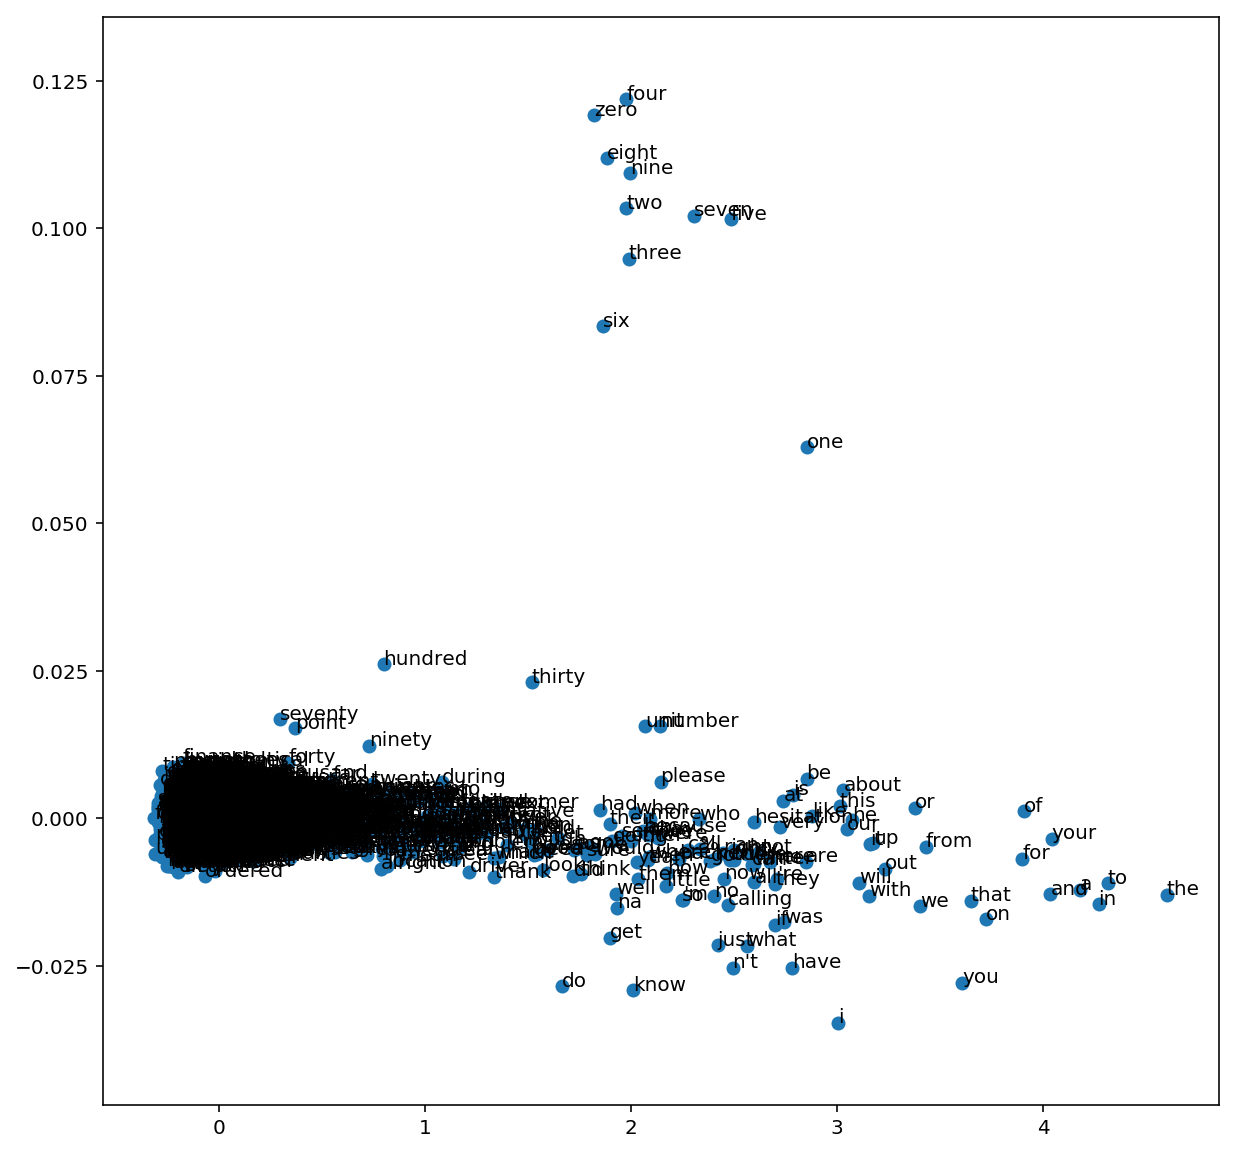

In [40]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# define training data
# sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# ['this', 'is', 'the', 'second', 'sentence'],
# ['yet', 'another', 'sentence'],
# ['one', 'more', 'sentence'],
# ['and', 'the', 'final', 'sentence']]

sentences = new_transcripts



# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Google speech API attempt

In [56]:
os.chdir('/Users/zacklarsen/Dropbox (Inference Analytics)/Inference Analytics Team Folder/Ryder/ryder_audio-1/38173140000')

In [57]:
pwd

'/Users/zacklarsen/Dropbox (Inference Analytics)/Inference Analytics Team Folder/Ryder/ryder_audio-1/38173140000'

In [58]:
ls

38173141507.wma* 38173148069.wma* 38173149321.wma* 38173149935.wma*
38173146763.wma* 38173149232.wma* 38173149732.wma*


In [59]:
speech_file_path = '/Users/zacklarsen/Dropbox (Inference Analytics)/Inference Analytics Team Folder/Ryder/ryder_audio-1/38173140000/38173141507.wma'